# Necessary Libraries

In [41]:
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# ECG Data

In [42]:
ecg_data1 = [7, 8, 8, 9, 8, 6, 8, 9, 6, 8, 6, 8, 7, 5, 7, 7, 8, 6, 8, 8, 9, 62, 156, 167, 122, 140, 205, 268, 266, 252, 298, 366, 423, 441, 426, 411, 432, 479, 505, 495, 538, 601, 651, 624, 599, 648, 713, 743, 749, 766, 800, 840, 841, 843, 908, 1000, 1040, 943, 908, 991, 1088, 1159, 1196, 1211, 1242, 1293, 1337, 1385, 1421, 1447, 1404, 1353, 1352, 1388, 1438, 1452, 1435, 1435, 1454, 1500, 1560, 1583, 1609, 1631, 1660, 1675, 1693, 1725, 1774, 1887, 2089, 2507, 3134, 3855, 4095, 4095, 3691, 1821, 670, 700, 1228, 1743, 2031, 2119, 2135, 2155, 2170, 2143, 2110, 2135, 2190, 2251, 2300, 2330, 2345, 2360, 2396, 2440, 2480, 2510, 2543, 2573, 2632, 2665, 2681, 2695, 2727, 2765, 2795, 2830, 2889, 2967, 3023, 3084, 3132, 3148, 3194, 3271, 3320, 3353, 3402, 3452, 3482, 3487, 3480, 3467, 3480, 3470, 3420, 3337, 3232, 3133, 3034, 2941, 2856, 2781, 2732, 2696, 2664, 2636, 2586, 2475, 2411, 2414, 2425, 2456, 2488, 2510, 2508, 2479, 2492, 2492, 2479, 2477, 2477, 2487, 2511, 2586, 2621, 2587, 2541, 2553, 2555, 2555, 2535, 2521, 2554, 2616, 2639, 2632, 2622, 2655, 2666, 2634, 2600, 2568, 2572, 2585, 2607, 2655, 2701, 2697, 2639, 2618, 2654, 2655, 2615, 2599, 2634, 2698, 2686, 2616, 2588, 2618, 2649, 2649, 2636, 2632, 2602, 2620, 2654, 2654, 2621, 2604, 2602, 2623, 2654, 2637, 2648, 2681, 2695, 2719, 2732, 2704, 2684, 2696, 2730, 2749, 2744, 2762, 2815, 2856, 2839, 2843, 2830, 2796, 2760, 2696, 2664, 2672, 2714, 2780, 2808, 2782, 2749, 2711, 2650, 2663, 2696, 2686, 2686, 2717, 2759, 2750, 2713, 2798, 3048, 3449, 4095, 4095, 4095, 4095, 4095, 2909, 1592, 1518, 1992, 2439, 2697, 2794, 2766, 2747, 2685, 2623, 2604, 2666, 2699, 2665, 2638, 2652, 2682, 2776, 2862, 2859, 2843, 2743, 2718, 2827, 2857, 2825, 2822, 2859, 2920, 2955, 2987, 3007, 3070, 3175, 3197, 3183, 3224, 3274, 3328, 3372, 3419, 3468, 3530, 3567, 3543, 3503, 3498, 3499, 3469, 3368, 3245, 3179, 3146, 3145, 3048, 2856, 2686, 2617, 2575, 2543, 2504, 2377, 2271, 2239, 2249, 2217, 2190, 2173, 2190, 2207, 2220, 2263, 2266, 2187, 2168, 2202, 2232, 2249, 2223, 2231, 2222, 2249, 2252, 2223, 2252, 2267, 2205, 2188, 2191, 2200, 2187, 2201, 2224, 2254, 2284, 2254, 2219, 2217, 2237, 2238, 2220, 2236, 2271, 2314, 2329, 2295, 2239, 2238, 2264, 2285, 2285, 2217, 2167, 2206, 2281, 2334, 2345, 2326, 2300, 2287, 2284, 2283, 2299, 2300, 2314, 2344, 2366, 2344, 2296, 2347, 2440, 2457, 2408, 2395, 2424, 2428, 2399, 2382, 2376, 2348, 2301, 2266, 2251, 2254, 2280, 2283, 2313, 2319, 2285, 2281, 2328, 2364, 2359, 2283, 2215, 2222, 2271, 2376, 2556, 2952, 3581, 4095, 4095, 4095, 4095, 3389, 1418, 840, 1257, 1879, 2234, 2408, 2431, 2381, 2335, 2359, 2376, 2379, 2368, 2349, 2379, 2411, 2431, 2429, 2411, 2458, 2505, 2537, 2536, 2540, 2552, 2588, 2620, 2652, 2682, 2695, 2715, 2781, 2872, 2908, 2894, 2815, 2845, 2952, 3032, 3053, 3050, 3065, 3103, 3167, 3226, 3246, 3198, 3115, 3081, 3088, 3056, 2942, 2781, 2671, 2635, 2591, 2477, 2283, 2144, 2090, 2023, 1965, 1902, 1832, 1815, 1833, 1819, 1768, 1736, 1739, 1770, 1784, 1784, 1755, 1743, 1768, 1786, 1832, 1847, 1787, 1710, 1694, 1721, 1712, 1689, 1659, 1647, 1642, 1646, 1663, 1658, 1643, 1662, 1695, 1694, 1662, 1640, 1643, 1644, 1641, 1657, 1663, 1678, 1704, 1724, 1739, 1756, 1803, 1849, 1901, 1931, 1946, 1949, 1978, 2026, 2025, 1979, 1963, 1993, 2025, 2061, 2093, 2108, 2110, 2122, 2154, 2190, 2221, 2221, 2220, 2270, 2348, 2376, 2344, 2328, 2345, 2362, 2347, 2296, 2264, 2264, 2301, 2319, 2332, 2314, 2284, 2297, 2316, 2347, 2383, 2383, 2333, 2302, 2318, 2318, 2318, 2364, 2522, 2861, 3436, 4095, 4095, 4095, 4095, 3598, 1672, 988, 1303, 1867, 2222, 2363, 2391, 2398, 2439, 2432, 2362, 2299, 2333, 2414, 2493, 2522, 2510, 2494, 2494, 2494, 2493, 2526, 2587, 2621, 2585, 2526, 2557, 2620, 2671, 2716, 2745, 2744, 2733, 2767, 2827, 2878, 2926, 2937, 2958, 3019, 3081, 3129, 3160, 3163, 3179, 3161, 3114, 3112, 3132, 3131, 3071, 2957, 2874, 2808, 2680, 2495, 2392, 2330, 2264, 2192, 2137, 2095, 2075, 2016, 1961, 1916, 1901, 1912, 1928, 1918, 1928, 1945, 1961, 1962, 1966, 1976, 1943, 1945, 1979, 2015, 2025, 1994, 1942, 1930, 1947, 1963, 1976, 1952, 1948, 1960, 1961, 1966, 1976, 1978, 1975, 1977, 1978, 1980, 1982, 1995, 1997, 1992, 1994, 2028, 2045, 2028, 2015, 2027, 2046, 2061, 2058, 2032, 2028, 2043, 2042, 2057, 2075, 2058, 2047, 2073, 2104, 2127, 2123, 2075, 2057, 2089, 2103, 2120, 2169, 2186, 2167, 2138, 2141, 2174, 2231, 2222, 2202, 2203, 2215, 2224, 2249, 2264, 2285, 2348, 2394, 2397, 2332, 2233, 2206, 2216, 2254, 2249, 2207, 2232, 2252, 2265, 2281, 2266, 2219, 2216, 2232, 2247, 2263, 2280, 2285, 2317, 2428, 2682, 3151, 3831, 4095, 4095, 4095, 3629, 1775, 1008, 1229, 1707, 2080, 2286, 2378, 2361, 2297, 2269, 2314, 2366, 2396, 2409, 2384, 2377, 2424, 2463, 2441, 2415, 2462, 2541, 2589, 2575, 2543, 2524, 2568, 2649, 2698, 2667, 2648, 2685, 2735, 2808, 2860, 2846, 2855, 2941, 3038, 3099, 3063, 3017, 3071, 3145, 3176, 3196, 3208, 3191, 3182, 3164, 3130, 3072, 3018, 2920, 2782, 2653, 2553, 2494, 2441, 2333, 2220, 2141, 2105, 2091, 2078, 2064, 2032, 2012, 2010, 2008, 2015, 2056, 2058, 2024, 2011, 2029, 2059, 2090, 2108, 2090, 2089, 2109, 2111, 2064, 2026, 2043, 2064, 2064, 2073, 2063, 2058, 2062, 2063, 2064, 2074, 2077, 2088, 2092, 2087, 2075, 2076, 2076, 2073, 2075, 2079, 2088, 2089, 2090, 2089, 2092, 2094, 2105, 2110, 2122, 2135, 2126, 2121, 2126, 2136, 2142, 2150, 2154, 2168, 2169, 2156, 2158, 2167, 2172, 2174, 2172, 2171, 2168, 2168, 2159, 2171, 2184, 2189, 2189, 2188, 2189, 2217, 2237, 2269, 2284, 2267, 2271, 2302, 2330, 2334, 2329, 2302, 2255, 2215, 2184, 2187, 2189, 2191, 2188, 2203, 2249, 2283, 2312, 2318, 2315, 2317, 2336, 2346, 2335, 2333, 2363, 2459, 2697, 3134, 3786, 4095, 4095, 4095, 4095, 2272, 1098, 1102, 1625, 2111, 2376, 2474, 2456, 2414, 2400, 2398, 2408, 2399, 2381, 2378, 2383, 2396, 2397, 2396, 2381, 2360, 2345, 2364, 2383, 2400, 2429, 2456, 2478, 2494, 2509, 2543, 2590, 2618, 2638, 2664, 2684, 2717, 2760, 2810, 2848, 2905, 2952, 2984, 3021, 3052, 3066, 3069, 3080, 3082, 3052, 3000, 2938, 2847, 2735, 2638, 2542, 2444, 2348, 2251, 2156, 2073, 1994, 1934, 1913, 1898, 1881, 1868, 1868, 1870, 1870, 1882, 1896, 1912, 1916, 1912, 1912, 1927, 1932, 1951, 1975, 1981, 1979, 1965, 1974, 1980, 1978, 1976, 1976, 1966, 1963, 1960, 1962, 1966, 1961, 1948, 1945, 1945, 1950, 1948, 1947, 1981, 2010, 2012, 2025, 2031, 2030, 2026, 2032, 2045, 2041, 2039, 2030, 2043, 2059, 2048, 2058, 2064, 2077, 2088, 2103, 2092, 2074, 2046, 2046, 2072, 2104, 2136, 2151, 2118, 2092, 2105, 2123, 2152, 2152, 2127, 2106, 2135, 2171, 2201, 2215, 2232, 2222, 2234, 2264, 2297, 2350, 2394, 2361, 2315, 2294, 2298, 2343, 2362, 2333, 2312, 2301, 2318, 2328, 2344, 2360, 2317, 2280, 2268, 2297, 2335, 2348, 2317, 2300, 2311, 2350, 2442, 2534, 2748, 3212, 3978, 4095, 4095, 4095, 4095, 2058, 1002, 1163, 1755, 2206, 2383, 2427, 2380, 2334, 2300, 2299, 2328, 2333, 2346, 2382, 2456, 2524, 2543, 2490, 2414, 2412, 2459, 2475, 2462, 2537, 2623, 2683, 2699, 2695, 2716, 2744, 2777, 2751, 2696, 2719, 2839, 2936, 2973, 2972, 2990, 3047, 3115, 3164, 3161, 3128, 3165, 3244, 3261, 3192, 3082, 3037, 2990, 2895, 2846, 2766, 2606, 2462, 2360, 2249, 2184, 2154, 2094, 2047, 2075, 2089, 1983, 1932, 1932, 1932, 1944, 1948, 1932, 1899, 1883, 1945, 2047, 2060, 2010, 1976, 1994, 2041, 2026, 1995, 1992, 1965, 1963, 1984, 2012, 2047, 2063, 2040, 1991, 1984, 2040, 2064, 2030, 1961, 1919, 1951, 2012, 2024, 2016, 2024, 2040, 2047, 2011, 1976, 1977, 1981, 2014, 2074, 2078, 2064, 2058, 2028, 2042, 2057, 2061, 2075, 2089, 2080, 2107, 2106, 2092, 2095, 2105, 2103, 2093, 2106, 2109, 2122, 2110, 2106, 2109, 2122, 2168, 2232, 2253, 2238, 2249, 2272, 2301, 2300, 2287, 2266, 2223, 2186, 2158, 2152, 2158, 2153, 2158, 2170, 2176, 2184, 2188, 2202, 2216, 2215, 2200, 2190, 2189, 2185, 2205, 2313, 2573, 3032, 3662, 4095, 4095, 4095, 3608, 1788, 910, 1040, 1577, 2012, 2238, 2328, 2297, 2266, 2252, 2265, 2267, 2265, 2286, 2316, 2334, 2351, 2376, 2382, 2409, 2431, 2457, 2459, 2471, 2490, 2507, 2526, 2552, 2575, 2602, 2621, 2651, 2683, 2711, 2748, 2797, 2856, 2906, 2941, 2973, 3017, 3064, 3097, 3127, 3148, 3166, 3167, 3161, 3178, 3181, 3150, 3072, 2984, 2875, 2765, 2666, 2558, 2462, 2360, 2266, 2188, 2126, 2079, 2047, 2030, 2013, 1992, 1979, 1993, 1993, 1993, 1998, 2024, 2042, 2038, 2043, 2046, 2059, 2059, 2057, 2058, 2074, 2078, 2093, 2095, 2103, 2091, 2080, 2075, 2075, 2089, 2096, 2123, 2168, 2183, 2184, 2189, 2202, 2207, 2204, 2218, 2248, 2264, 2270, 2297, 2297, 2297, 2313, 2327, 2335, 2345, 2348, 2359, 2366, 2381, 2392, 2396, 2398, 2396, 2411, 2430, 2446, 2456, 2456, 2461, 2473, 2462, 2473, 2479, 2491, 2491, 2503, 2509, 2503, 2508, 2520, 2537, 2535, 2526, 2535, 2527, 2535, 2540, 2557, 2603, 2635, 2621, 2615, 2636, 2668, 2686, 2684, 2680, 2638, 2599, 2554, 2524, 2523, 2537, 2539, 2526, 2524, 2524, 2521, 2525, 2525, 2522, 2523, 2525, 2528, 2524, 2519, 2552, 2665, 2921, 3389, 4090, 4095, 4095, 4095, 4079, 2203, 1276, 1405, 1944, 2348, 2541, 2602, 2585, 2552, 2539, 2538, 2552, 2569, 2584, 2587, 2599, 2616, 2618, 2636, 2648, 2666, 2681, 2686, 2710, 2731, 2747, 2760, 2778, 2809, 2828, 2856, 2879, 2907, 2935, 2969, 2992, 3031, 3066, 3117, 3162, 3207, 3242, 3274, 3303, 3325, 3337, 3338, 3342, 3336, 3292, 3229, 3160, 3065, 2960, 2859, 2760, 2652, 2554, 2459, 2366, 2283, 2222, 2187, 2156, 2120, 2090, 2064, 2047, 2030, 2030, 2026, 2024, 2013, 2009, 1998, 1996, 1999, 2009, 2009, 2011, 1999, 1997, 1996, 1998, 1999, 1995, 1978, 1964, 1977, 1968, 1965, 1964, 1961, 1946, 1945, 1946, 1946, 1935, 1944, 1948, 1951, 1947, 1946, 1961, 1980, 1992, 1996, 1993, 1979, 1976, 1965, 1977, 1976, 1963, 1950, 1964, 1978, 1983, 1980, 1991, 1996, 1999, 2008, 2010, 2011, 2014, 2014, 2030, 2041, 2031, 2041, 2046, 2057, 2057, 2059, 2060, 2062, 2072, 2075, 2088, 2105, 2106, 2121, 2138, 2153, 2168, 2199, 2217, 2223, 2239, 2263, 2281, 2298, 2298, 2281, 2232, 2182, 2138, 2127, 2143, 2158, 2168, 2168, 2172, 2171, 2182, 2187, 2200, 2204, 2203, 2204, 2203, 2199, 2203, 2280, 2461, 2862, 3469, 4095, 4095, 4095, 4095, 2716, 1176, 925, 1371, 1896, 2185, 2316, 2328, 2281, 2251, 2253, 2264, 2269, 2287, 2311, 2315, 2314, 2319, 2346, 2363, 2396, 2425, 2439, 2445, 2458, 2477, 2495, 2535, 2572, 2600, 2606, 2635, 2668, 2713, 2760, 2797, 2846, 2895, 2943, 2985, 3020, 3063, 3100, 3134, 3162, 3193, 3207, 3214, 3209, 3192, 3149, 3099, 3017, 2927, 2828, 2703, 2601, 2505, 2408, 2301, 2217, 2153, 2093, 2046, 2012, 1996, 1976, 1949, 1962, 1979, 1999, 2028, 2040, 2029, 2042, 2044, 2044, 2058, 2064, 2073, 2075, 2074, 2062, 2046, 2047, 2047, 2047, 2058, 2060, 2060, 2040, 2015, 2015, 2027, 2014, 2011, 1997, 1994, 2012, 2014, 2015, 2009, 2013, 2027, 2015, 2008, 2008, 2006, 2008, 2023, 2024, 2029, 2041, 2045, 2043, 2041, 2039, 2059, 2090, 2090, 2074, 2077, 2091, 2092, 2087, 2088, 2077, 2074, 2075, 2074, 2060, 2058, 2062, 2058, 2056, 2077, 2095, 2128, 2158, 2167, 2172, 2188, 2231, 2235, 2236, 2221, 2174, 2120, 2077, 2064, 2077, 2090, 2078, 2077, 2092, 2108, 2108, 2107, 2095, 2091, 2088, 2088, 2075, 2059, 2072, 2144, 2367, 2810, 3484, 4095, 4095, 4095, 4095, 2104, 760, 710, 1244, 1756, 2013, 2121, 2125, 2107, 2090, 2091, 2120, 2154, 2187, 2204, 2234, 2248, 2238, 2256, 2297, 2330, 2348, 2364, 2383, 2427, 2470, 2492, 2520, 2536, 2555, 2589, 2638, 2697, 2728, 2748, 2781, 2825, 2858, 2921, 2991, 3052, 3072, 3098, 3114, 3128, 3133, 3161, 3166, 3147, 3115, 3049, 2954, 2846, 2731, 2608, 2490, 2381, 2280, 2184, 2090, 2014, 1963, 1917, 1885, 1871, 1854, 1866, 1879, 1888, 2120, 2237, 2137, 2026, 1979, 1961, 1981, 1993, 1991, 1979, 1975, 2007, 2090, 2078, 2043, 2015, 2012, 2011, 2007, 2023, 2014, 1994, 1992, 1983, 1963, 1934, 1918, 1927, 1944, 1962, 1967, 1977, 1981, 1983, 1994, 1999, 1984, 1979, 1990, 2010, 2040, 2064, 2094, 2110, 2135, 2151, 2154, 2172, 2192, 2215, 2217, 2232, 2251, 2263, 2266, 2281, 2315, 2345, 2378, 2412, 2445, 2488, 2536, 2559, 2557, 2556, 2525, 2493, 2475, 2457, 2457, 2478, 2503, 2507, 2509, 2507, 2509, 2524, 2542, 2554, 2541, 2536, 2537, 2552, 2552, 2543, 2634, 2874, 3339, 4088, 4095, 4095, 4095, 4095, 3114, 1454, 1208, 1722, 2253, 2525, 2632, 2619, 2574, 2552, 2539, 2541, 2556, 2559, 2570, 2575, 2586, 2590, 2591, 2589, 2592, 2617, 2651, 2683, 2696, 2702, 2716, 2727, 2746, 2764, 2779, 2797, 2813, 2840, 2874, 2906, 2938, 2971, 3016, 3055, 3099, 3144, 3177, 3193, 3213, 3244, 3262, 3258, 3240, 3209, 3149, 3064, 2956, 2843, 2713, 2590, 2488, 2392, 2287, 2201, 2127, 2087, 2029, 1992, 1968, 1963, 1961, 2045, 2313, 2554, 2522, 2364, 2814, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3383, 2424, 2076, 1967, 1869, 1742, 1607, 1453, 1336, 1246, 1177, 1098, 1016, 939, 872, 813, 762, 716, 671, 635, 598, 572, 543, 524, 508, 491, 461, 444, 440, 430, 414, 397, 390, 398, 422, 443, 457, 441, 424, 429, 461, 490, 480, 454, 394, 348, 328, 316, 330, 347, 361, 363, 367, 382, 393, 380, 382, 408, 413, 411, 408, 413, 446, 555, 824, 1295, 1949, 2602, 3082, 3133, 2168, 317, 8, 6, 6, 8, 281, 633, 717, 683, 655, 679, 714, 747, 782, 840, 904, 952, 986, 1024, 1084, 1131, 1178, 1227, 1272, 1308, 1357, 1421, 1472, 1518, 1565, 1623, 1671, 1721, 1784, 1833, 1885, 1945, 1999, 2058, 2110, 2172, 2222, 2268, 2313, 2344, 2366, 2394, 2396, 2382, 2358, 2313, 2249, 2158, 2045, 1946, 1836, 1736, 1644, 1564, 1496, 1418, 1357, 1340, 1338, 1322, 1292, 1278, 1289, 1290, 1290, 1289, 1278, 1273, 1272, 1275, 1292, 1295, 1304, 1308, 1308, 1319, 1327, 1339, 1338, 1324, 1323, 1321, 1320, 1304, 1279, 1303, 1310, 1308, 1322, 1328, 1341, 1352, 1355, 1375, 1387, 1388, 1387, 1387, 1387, 1375, 1387, 1403, 1406, 1416, 1422, 1450, 1464, 1466, 1468, 1485, 1519, 1547, 1561, 1566, 1581, 1592, 1595, 1598, 1608, 1614, 1614, 1598, 1581, 1582, 1593, 1598, 1612, 1629, 1629, 1623, 1609, 1613, 1623, 1641, 1647, 1647, 1662, 1703, 1737, 1770, 1805, 1834, 1867, 1903, 1944, 1949, 1960, 1933, 1897, 1871, 1870, 1881, 1884, 1896, 1881, 1870, 1879, 1867, 1866, 1884, 1916, 1934, 1945, 1944, 1945, 1945, 1966, 2088, 2363, 2840, 3512, 4095, 4095, 4095, 3711, 1784, 811, 942, 1480, 1902, 2102, 2153, 2135, 2103, 2108, 2136, 2152, 2156, 2172, 2185, 2190, 2199, 2205, 2218, 2220, 2219, 2232, 2254, 2268, 2282, 2318, 2361, 2380, 2399, 2415, 2441, 2478, 2525, 2586, 2632, 2671, 2729, 2793, 2840, 2859, 2888, 2924, 2941, 2960, 2983, 2990, 2991, 3004, 3038, 3069, 3051, 2959, 2858, 2780, 2719, 2604, 2445, 2300, 2187, 2076, 1996, 1942, 1884, 1832, 1783, 1751, 1759, 1770, 1754, 1752, 1769, 1769, 1736, 1721, 1720, 1752, 1791, 1790, 1751, 1708, 1705, 1720, 1722, 1689, 1646, 1643, 1657, 1657, 1661, 1672, 1703, 1743, 1767, 1770, 1759, 1755, 1759, 1772, 1799, 1801, 1770, 1742, 1723, 1692, 1659, 1643, 1639, 1614, 1597, 1595, 1598, 1596, 1577, 1579, 1600, 1641, 1671, 1672, 1671, 1675, 1675, 1674, 1704, 1693, 1660, 1661, 1662, 1629, 1576, 1548, 1533, 1503, 1483, 1482, 1486, 1485, 1439, 1337, 1272, 1290, 1356, 1272, 938, 637, 364, 72, 8, 8, 8, 8, 8, 6, 8, 9, 7, 7, 7, 7, 9, 7, 6, 9, 7, 9, 8, 7, 6, 8, 8, 8, 6, 7, 7, 7, 7, 6, 7, 7, 8, 7, 7, 7, 8, 6, 8, 7, 16, 7, 7, 7, 6, 17, 7, 7, 7, 5, 7, 8, 7, 7, 8, 6, 6, 8, 6, 8, 8, 7, 8, 7, 7, 7, 8, 8, 6, 8, 8, 7, 8, 8, 6, 8, 16, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 8, 17, 8, 126, 349, 719, 782, 680, 592, 779, 903, 735, 539, 413, 343, 287, 251, 207, 174, 158, 160, 186, 204, 221, 268, 317, 362, 398, 445, 504, 952, 2119, 3432, 3772, 3437, 3978, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3799, 3128, 2862, 2767, 2695, 2599, 2494, 2414, 2359, 2314, 2266, 2223, 2188, 2156, 2125, 2102, 2064, 2055, 2046, 2043, 2039, 2025, 2011, 2008, 2011, 2025, 2031, 2044, 2048, 2048, 2062, 2075, 2073, 2062, 2074, 2090, 2094, 2094, 2118, 2122, 2140, 2156, 2157, 2155, 2171, 2188, 2206, 2232, 2248, 2248, 2269, 2680, 3158, 3004, 2760, 2698, 2697, 2664, 2632, 2621, 2647, 2682, 2906, 3336, 3912, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3593, 3423, 3480, 3544, 3480, 3337, 3225, 3176, 3305, 3406, 3400, 3421, 3726, 4095, 4095, 4095, 4095, 4095, 4095, 2440, 1624, 1852, 2367, 2684, 2809, 2796, 2730, 2684, 2671, 2681, 2697, 2714, 2746, 2762, 2763, 2764, 2763, 2747, 2733, 2744, 2775, 2808, 2814, 2825, 2830, 2846, 2863, 2880, 2905, 2923, 2942, 2972, 3006, 3049, 3068, 3115, 3182, 3245, 3305, 3352, 3389, 3421, 3437, 3452, 3469, 3484, 3481, 3455, 3416, 3343, 3262, 3182, 3070, 2951, 2826, 2715, 2607, 2505, 2411, 2328, 2251, 2199, 2160, 2137, 2110, 2090, 2064, 2044, 2040, 2041, 2027, 2026, 2041, 2061, 2048, 2062, 2075, 2078, 2075, 2077, 2075, 2064, 2046, 2029, 2012, 1995, 1989, 1980, 1976, 1962, 1949, 1950, 1948, 1949, 1948, 1933, 1932, 1961, 1990, 1995, 1996, 1980, 1975, 1964, 1961, 1949, 1948, 1946, 1944, 1943, 1933, 1934, 1934, 1934, 1948, 1960, 1961, 1947, 1943, 1947, 1949, 1950, 1976, 1994, 1998, 1995, 1980, 1977, 1992, 1992, 1992, 1994, 1992, 1991, 1993, 1978, 1967, 1962, 1965, 1984, 1996, 1995, 1992, 1998, 2011, 2014, 2007, 1996, 2008, 2039, 2043, 2029, 2030, 2056, 2089, 2091, 2077, 2042, 1995, 1951, 1931, 1914, 1918, 1929, 1928, 1914, 1903, 1901, 1914, 1915, 1902, 1900, 1912, 1919, 1917, 1916, 1918, 1975, 2136, 2496, 3080, 3791, 4095, 4095, 4095, 2544, 938, 574, 974, 1500, 1803, 1931, 1933, 1896, 1865, 1863, 1866, 1871, 1883, 1902, 1927, 1933, 1931, 1929, 1935, 1951, 1966, 1982, 2012, 2028, 2041, 2047, 2075, 2106, 2127, 2155, 2184, 2217, 2268, 2320, 2351, 2383, 2431, 2475, 2509, 2541, 2573, 2619, 2663, 2681, 2702, 2715, 2719, 2716, 2697, 2667, 2620, 2541, 2455, 2346, 2250, 2151, 2042, 1943, 1850, 1769, 1690, 1630, 1591, 1560, 1517, 1497, 1486, 1496, 1497, 1500, 1501, 1498, 1499, 1502, 1518, 1534, 1531, 1518, 1528, 1533, 1545, 1536, 1532, 1530, 1531, 1533, 1534, 1532, 1529, 1527, 1518, 1517, 1520, 1528, 1517, 1519, 1519, 1529, 1531, 1534, 1534, 1535, 1546, 1550, 1566, 1566, 1579, 1591, 1584, 1595, 1609, 1613, 1611, 1625, 1639, 1640, 1646, 1656, 1661, 1660, 1675, 1688, 1694, 1704, 1707, 1710, 1720, 1725, 1726, 1726, 1736, 1738, 1741, 1751, 1754, 1767, 1769, 1775, 1784, 1785, 1786, 1787, 1800, 1819, 1820, 1806, 1821, 1838, 1851, 1885, 1901, 1901, 1913, 1933, 1964, 1978, 1965, 1944, 1899, 1865, 1837, 1848, 1871, 1886, 1885, 1883, 1886, 1897, 1903, 1919, 1934, 1950, 1960, 1961, 1964, 1964, 1951, 2012, 2205, 2589, 3180, 3929, 4095, 4095, 4095, 2411, 939, 700, 1134, 1673, 1981, 2110, 2121, 2075, 2048, 2059, 2076, 2079, 2078, 2064, 2047, 2061, 2091, 2111, 2184, 2380, 2556, 2558, 2523, 2666, 2874, 2987, 3035, 3066, 3070, 3131, 3176, 3198, 3228, 3260, 3292, 3326, 3375, 3421, 3447, 3354, 3214, 3150, 3165, 3245, 3215, 3147, 3182, 3271, 3321, 3260, 3133, 3005, 2830, 2654, 2510, 2393, 2264, 2153, 2078, 2046, 2043, 2056, 2039, 2024, 2012, 1992, 1880, 1773, 1726, 1705, 1690, 1687, 1691, 1754, 1775, 1754, 1726, 1725, 1774, 1896, 1916, 1846, 1832, 1882, 1838, 1787, 1739, 1710, 1707, 1694, 1739, 1769, 1743, 1710, 1689, 1711, 1818, 1928, 2011, 2026, 1968, 1966, 2008, 2088, 2134, 2127, 2154, 2142, 2088, 2064, 2078, 2072, 2043, 1998, 1951, 1901, 1865, 1850, 1837, 1832, 1818, 1804, 1804, 1803, 1802, 1804, 1803, 1801, 1791, 1805, 1816, 1807, 1807, 1806, 1820, 1834, 1835, 1833, 1834, 1838, 1850, 1853, 1853, 1853, 1867, 1870, 1870, 1885, 1909, 1931, 1963, 1981, 1980, 2007, 2030, 2060, 2063, 2059, 2040, 2010, 1976, 1949, 1949, 1965, 1982, 1982, 1990, 1991, 1996, 2028, 2075, 2120, 2137, 2141, 2167, 2202, 2222, 2232, 2280, 2440, 2823, 3514, 4095, 4095, 4095, 4095, 3838, 1918, 1207, 1483, 2025, 2360, 2488, 2478, 2424, 2364, 2347, 2463, 2713, 2665, 2521, 2414, 2380, 2380, 2393, 2457, 2556, 2538, 2489, 2459, 2458, 2477, 2488, 2503, 2511, 2537, 2559, 2633, 2813, 2828, 2784, 2778, 2799, 2840, 2872, 2896, 2936, 2984, 3023, 3053, 3072, 3102, 3120, 3130, 3128, 3114, 3083, 3035, 2970, 2887, 2792, 2686, 2590, 2493, 2399, 2298, 2205, 2136, 2074, 2014, 1980, 1964, 1948, 1944, 1930, 1931, 1934, 1935, 1934, 1949, 1961, 1963, 1965, 1967, 1976, 1981, 1983, 1983, 1979, 1966, 1975, 1979, 1983, 1978, 1976, 1968, 1975, 1965, 1962, 1960, 1962, 1961, 1960, 1967, 1968, 1964, 1964, 1966, 1979, 1983, 1981, 1980, 1982, 1984, 1992, 1995, 2008, 2009, 1999, 2014, 2024, 2027, 2029, 2042, 2042, 2041, 2039, 2040, 2039, 2044, 2042, 2044, 2048, 2064, 2072, 2078, 2089, 2092, 2091, 2093, 2104, 2107, 2106, 2105, 2109, 2111, 2111, 2108, 2110, 2120, 2137, 2142, 2137, 2140, 2141, 2152, 2169, 2167, 2154, 2157, 2173, 2203, 2233, 2238, 2234, 2238, 2264, 2285, 2299, 2286, 2252, 2214, 2169, 2139, 2126, 2138, 2141, 2144, 2137, 2142, 2158, 2168, 2155, 2157, 2158, 2156, 2143, 2154, 2155, 2154, 2204, 2396, 2784, 3358, 4095, 4095, 4095, 4095, 2876, 1257, 892, 1279, 1791, 2090, 2203, 2200, 2151, 2123, 2121, 2137, 2153, 2168, 2175, 2187, 2200, 2217, 2234, 2252, 2254, 2267, 2285, 2302, 2319, 2345, 2364, 2380, 2392, 2411, 2442, 2474, 2503, 2521, 2553, 2589, 2623, 2664, 2702, 2746, 2793, 2842, 2878, 2909, 2936, 2942, 2970, 2975, 2974, 2968, 2943, 2892, 2816, 2731, 2638, 2528, 2426, 2316, 2218, 2120, 2024, 1948, 1885, 1832, 1790, 1766, 1742, 1727, 1722, 1722, 1737, 1737, 1739, 1739, 1741, 1743, 1753, 1767, 1770, 1767, 1768, 1770, 1771, 1771, 1771, 1773, 1775, 1774, 1782, 1783, 1785, 1772, 1768, 1768, 1769, 1771, 1771, 1771, 1771, 1769, 1768, 1759, 1769, 1774, 1773, 1769, 1769, 1758, 1769, 1784, 1785, 1785, 1790, 1801, 1800, 1802, 1804, 1805, 1816, 1818, 1817, 1822, 1834, 1836, 1837, 1849, 1853, 1864, 1867, 1868, 1869, 1870, 1880, 1881, 1898, 1897, 1896, 1899, 1898, 1895, 1896, 1885, 1886, 1883, 1884, 1896, 1902, 1899, 1897, 1898, 1913, 1915, 1913, 1918, 1943, 1951, 1978, 1992, 1992, 1997, 2024, 2043, 2063, 2060, 2030, 1981, 1933, 1918, 1925, 1931, 1933, 1936, 1948, 1949, 1959, 1950, 1959, 1964, 1977, 1977, 1976, 1980, 1982, 2031, 2091, 2264, 2621, 3179, 3930, 4095, 4095, 4095, 3209, 1504, 968, 1276, 1818, 2136, 2268, 2282, 2218, 2142, 2109, 2105, 2189, 2346, 2374, 2351, 2365, 2392, 2375, 2359, 2365, 2380, 2382, 2396, 2412, 2413, 2430, 2493, 2617, 2686, 2776, 3631, 4095, 4095, 4095, 4095, 4095, 4095, 3800, 3484, 3376, 3370, 3371, 3357, 3340, 3277, 3223, 3181, 3134, 3086, 3032, 2951, 2845, 2730, 2616, 2490, 2364, 2251, 2157, 2057, 1946, 1850, 1769, 1708, 1677, 1638, 1595, 1565, 1546, 1527, 1516, 1515, 1514, 1516, 1520, 1528, 1518, 1527, 1517, 1518, 1529, 1532, 1531, 1530, 1518, 1520, 1519, 1517, 1530, 1532, 1528, 1517, 1517, 1518, 1528, 1529, 1517, 1516, 1513, 1516, 1517, 1514, 1515, 1518, 1546, 1550, 1550, 1547, 1548, 1560, 1562, 1560, 1565, 1575, 1578, 1578, 1580, 1583, 1596, 1612, 1612, 1613, 1626, 1631, 1643, 1662, 1708, 1775, 1871, 1976, 2088, 2204, 2316, 2398, 2414, 2392, 2286, 2186, 2124, 2093, 2060, 2047, 2046, 2048, 2073, 2105, 2151, 2155, 2124, 2110, 2061, 2008, 1978, 1960, 1976, 1983, 1962, 1946, 1961, 1979, 1994, 1997, 2061, 2201, 2248, 2168, 2078, 2028, 1992, 1952, 1931, 1914, 1901, 1896, 1897, 1902, 1896, 1896, 1899, 1887, 1882, 1881, 1897, 1981, 2219, 2666, 3305, 4054, 4095, 4095, 3608, 1782, 748, 794, 1271, 1689, 1899, 1976, 1961, 1915, 1901, 1916, 1930, 1945, 1964, 1981, 1983, 1984, 1995, 2012, 2029, 2042, 2057, 2078, 2107, 2125, 2138, 2167, 2189, 2219, 2248, 2269, 2299, 2328, 2362, 2399, 2444, 2478, 2510, 2560, 2617, 2664, 2714, 2759, 2781, 2809, 2841, 2860, 2874, 2873, 2859, 2827, 2763, 2682, 2584, 2502, 2429, 2346, 2233, 2123, 2030, 1951, 1884, 1821, 1758, 1721, 1708, 1692, 1688, 1687, 1720, 1753, 1724, 1705, 1708, 1711, 1723, 1736, 1759, 1785, 1772, 1758, 1772, 1790, 1790, 1784, 1773, 1771, 1757, 1754, 1756, 1756, 1757, 1759, 1743, 1740, 1742, 1754, 1752, 1742, 1768, 1783, 1787, 1783, 1805, 1880, 1934, 1912, 1881, 1853, 1834, 1848, 1864, 1864, 1866, 1870, 1870, 1866, 1855, 1856, 1880, 1885, 1886, 1885, 1896, 1888, 1886, 1886, 1902, 1945, 1978, 1980, 1976, 1963, 1977, 1991, 1997, 1998, 1999, 2009, 2032, 2060, 2064, 2089, 2110, 2111, 2127, 2152, 2249, 2361, 2383, 2366, 2316, 2237, 2189, 2232, 2254, 2234, 2204, 2185, 2186, 2205, 2220, 2248, 2254, 2236, 2218, 2230, 2238, 2234, 2217, 2269, 2446, 2811, 3405, 4095, 4095, 4095, 4095, 3835, 2009, 1303, 1595, 2203, 2622, 2809, 2824, 2761, 2729, 2728, 2718, 2712, 2728, 2782, 2841, 2889, 2873, 2810, 2774, 2748, 2744, 2760, 2777, 2763, 2734, 2731, 2719, 2730, 2743, 2762, 2776, 2779, 2795, 2831, 2875, 2892, 2895, 2925, 2968, 3007, 3049, 3085, 3127, 3145, 3146, 3147, 3134, 3116, 3087, 3038, 2959, 2862, 2749, 2620, 2496, 2392, 2296, 2185, 2077, 1993, 1913, 1847, 1790, 1770, 1754, 1735, 1736, 1772, 1805, 1803, 1774, 1804, 1856, 1911, 1920, 1880, 1819, 1784, 1769, 1767, 1757, 1754, 1742, 1738, 1738, 1723, 1720, 1718, 1710, 1720, 1721, 1707, 1707, 1708, 1708, 1706, 1706, 1707, 1708, 1709, 1710, 1722, 1721, 1721, 1727, 1738, 1757, 1771, 1776, 1788, 1799, 1802, 1805, 1815, 1817, 1831, 1837, 1838, 1853, 1864, 1865, 1867, 1868, 1865, 1865, 1865, 1882, 1913, 1948, 1977, 1991, 2009, 2039, 2047, 2048, 2040, 1998, 1958, 1928, 1917, 1928, 1931, 1928, 1933, 1946, 1944, 1946, 1950, 1967, 1983, 1990, 1984, 1993, 1993, 1983, 1992, 2027, 2140, 2441, 2970, 3688, 4095, 4095, 4095, 3511, 1625, 752, 923, 1466, 1880, 2088, 2141, 2110, 2077, 2064, 2064, 2078, 2091, 2119, 2152, 2172, 2170, 2174, 2205, 2223, 2238, 2253, 2271, 2299, 2317, 2335, 2365, 2393, 2410, 2441, 2473, 2505, 2539, 2583, 2606, 2635, 2682, 2730, 2782, 2829, 2863, 2896, 2941, 2984, 3004, 3020, 3032, 3036, 3019, 2973, 2920, 2855, 2751, 2636, 2526, 2428, 2332, 2248, 2158, 2091, 2045, 2023, 1977, 1919, 1886, 1866, 1854, 1864, 1852, 1852, 1882, 1932, 1964, 1975, 1982, 1996, 2006, 1999, 1983, 1975, 1979, 1979, 1976, 1966, 1962, 1965, 1967, 1962, 1951, 1960, 1961, 1962, 1984, 2016, 2040, 2047, 2045, 2056, 2061, 2076, 2091, 2089, 2077, 2076, 2088, 2089, 2090, 2090, 2090, 2079, 2091, 2093, 2093, 2091, 2088, 2091, 2104, 2103, 2094, 2105, 2105, 2105, 2119, 2124, 2127, 2140, 2120, 2120, 2123, 2128, 2155, 2174, 2188, 2191, 2221, 2249, 2264, 2251, 2239, 2207, 2159, 2123, 2109, 2110, 2107, 2120, 2121, 2109, 2104, 2108, 2110, 2142, 2157, 2154, 2143, 2142, 2135, 2125, 2128, 2191, 2382, 2762, 3322, 4025, 4095, 4095, 4095, 2669, 1178, 889, 1289, 1806, 2109, 2248, 2248, 2203, 2184, 2185, 2189, 2233, 2280, 2300, 2328, 2344, 2347, 2347, 2360, 2367, 2361, 2364, 2377, 2365, 2365, 2376, 2395, 2408, 2410, 2425, 2458, 2491, 2507, 2527, 2571, 2607, 2649, 2687, 2744, 2781, 2826, 2872, 2907, 2926, 2951, 2954, 2952, 2936, 2895, 2857, 2824, 2778, 2698, 2590, 2493, 2409, 2318, 2221, 2136, 2063, 2010, 1959, 1914, 1887, 1881, 1869, 1862, 1856, 1866, 1871, 1885, 1896, 1898, 1910, 1966, 2008, 1999, 1976, 1963, 1964, 1965, 1965, 1951, 1959, 1945, 1934, 1947, 1947, 1944, 1943, 1945, 1947, 1947, 1947, 1946, 1947, 1934, 1932, 1946, 1963, 1949, 1949, 1963, 1968, 1977, 1979, 1982, 1992, 1993, 1992, 1994, 1992, 1996, 1999, 2009, 2011, 2009, 2014, 2026, 2029, 2042, 2044, 2043, 2045, 2057, 2045, 2046, 2060, 2073, 2078, 2088, 2093, 2103, 2095, 2104, 2107, 2111, 2135, 2172, 2199, 2191, 2190, 2217, 2248, 2267, 2255, 2248, 2205, 2159, 2125, 2121, 2123, 2135, 2139, 2185, 2185, 2154, 2140, 2153, 2168, 2160, 2160, 2170, 2173, 2172, 2168, 2170, 2247, 2457, 2860, 3439, 4095, 4095, 4095, 4078, 2312, 1069, 974, 1435, 1915, 2172, 2283, 2280, 2236, 2216, 2206, 2222, 2250, 2254, 2267, 2282, 2301, 2316, 2318, 2332, 2350, 2363, 2365, 2383, 2409, 2440, 2457, 2476, 2496, 2521, 2542, 2584, 2618, 2639, 2681, 2714, 2748, 2779, 2825, 2861, 2903, 2939, 2987, 3020, 3039, 3065, 3084, 3087, 3086, 3068, 3032, 2972, 2892, 2798, 2699, 2591, 2488, 2382, 2284, 2208, 2128, 2064, 2016, 1978, 1932, 1913, 1895, 1883, 1881, 1880, 1883, 1895, 1898, 1901, 1901, 1903, 1910, 1902, 1915, 1934, 1932, 1915, 1903, 1916, 1919, 1913, 1912, 1916, 1919, 1913, 1902, 1898, 1886, 1884, 1883, 1887, 1896, 1895, 1884, 1887, 1898, 1885, 1883, 1885, 1886, 1896, 1899, 1916, 1928, 1916, 1911, 1914, 1930, 1934, 1932, 1933, 1949, 1960, 1961, 1962, 1963, 1952, 1950, 1963, 1967, 1977, 1976, 1979, 1984, 1994, 1998, 2012, 2014, 2023, 2022, 2027, 2043, 2120, 2171, 2168, 2140, 2120, 2109, 2126, 2136, 2170, 2266, 2223, 2186, 2169, 2156, 2158, 2172, 2174, 2173, 2172, 2200, 2231, 2247, 2232, 2189, 2142, 2119, 2151, 2280, 3293, 4095, 4095, 4095, 3576, 3102, 2828, 2686, 2702, 2653, 2552, 2462, 2397, 2345, 2344, 2427, 2700, 3242, 4025, 4095, 4095, 4095, 3928, 1995, 1050, 1159, 1645, 2011, 2153, 2188, 2151, 2105, 2064, 2079, 2111, 2124, 2119, 2103, 2092, 2104, 2109, 2126, 2152, 2166, 2185, 2200, 2221, 2262, 2266, 2280, 2296, 2316, 2334, 2377, 2424, 2430, 2444, 2476, 2538, 2587, 2636, 2679, 2712, 2745, 2783, 2828, 2872, 2892, 2923, 2943, 2953, 2936, 2905, 2847, 2778, 2695, 2601, 2493, 2396, 2286, 2186, 2090, 2008, 1920, 1850, 1772, 1739, 1723, 1691, 1661, 1660, 1660, 1646, 1656, 1662, 1679, 1852, 2119, 2106, 1965, 1870, 1832, 1820, 1804, 1802, 1800, 1791, 1790, 1786, 1775, 1790, 1806, 1805, 1774, 1770, 1768, 1786, 1784, 1783, 1790, 1800, 1806, 1805, 1839, 1868, 1895, 1903, 1993, 2272, 2553, 2712, 2615, 2367, 2251, 2237, 2252, 2237, 2203, 2188, 2182, 2168, 2143, 2158, 2176, 2184, 2188, 2217, 2232, 2255, 2238, 2189, 2156, 2136, 2106, 2059, 2024, 2041, 2078, 2058, 2025, 2008, 2008, 1999, 1996, 1983, 1976, 1981, 2014, 2031, 2056, 2073, 2154, 2393, 2648, 2814, 3021, 3472, 4095, 4095, 4095, 4095, 3595, 1677, 973, 1214, 1710, 2040, 2205, 2296, 2319, 2347, 2333, 2335, 2441, 2816, 3003, 3534, 4095, 3870, 4095, 4095, 4095, 3863, 3580, 3341, 3198, 3144, 3148, 3099, 3014, 2952, 2972, 3070, 3097, 3082, 3071, 3068, 3049, 2984, 2904, 2860, 2856, 2872, 2878, 2872, 2855, 2827, 2812, 2799, 2766, 2717, 2649, 2558, 2445, 2318, 2184, 2047, 1934, 1831, 1722, 1629, 1552, 1500, 1451, 1416, 1373, 1354, 1341, 1341, 1341, 1352, 1339, 1328, 1343, 1399, 1431, 1451, 1467, 1485, 1502, 1545, 1581, 1593, 1594, 1579, 1599, 1632, 1628, 1583, 1518, 1482, 1463, 1447, 1435, 1422, 1422, 1422, 1420, 1416, 1405, 1405, 1417, 1421, 1623, 1724, 1657, 1576, 1528, 1512, 1518, 1530, 1531, 1514, 1512, 1516, 1531, 1528, 1528, 1529, 1544, 1530, 1517, 1530, 1550, 1582, 1614, 1648, 1688, 1706, 1724, 1754, 1775, 1769, 1723, 1663, 1632, 1629, 1656, 1677, 1677, 1675, 1688, 1703, 1695, 1693, 1691, 1703, 1709, 1721, 1723, 1727, 1737, 1738, 1800, 1981, 2378, 3020, 3768, 4095, 4095, 4095, 2413, 780, 446, 892, 1452, 1773, 1913, 1928, 1885, 1855, 1855, 1878, 1900, 1916, 1930, 1944, 1964, 1993, 2023, 2040, 2046, 2063, 2091, 2107, 2127, 2156, 2183, 2204, 2233, 2266, 2299, 2334, 2376, 2412, 2458, 2507, 2553, 2602, 2652, 2713, 2751, 2808, 2857, 2893, 2926, 2955, 2971, 2972, 2985, 2969, 2925, 2858, 2776, 2696, 2602, 2492, 2398, 2311, 2222, 2138, 2064, 2007, 1976, 1961, 1993, 1994, 1984, 1981, 1989, 1996, 1997, 1995, 1993, 2000, 2027, 2042, 2126, 2263, 2268, 2233, 2253, 2263, 2232, 2199, 2220, 2255, 2235, 2200, 2184, 2184, 2175, 2172, 2169, 2169, 2176, 2186, 2188, 2189, 2189, 2187, 2185, 2200, 2203, 2206, 2233, 2251, 2253, 2251, 2263, 2268, 2286, 2300, 2301, 2302, 2318, 2347, 2374, 2378, 2376, 2366, 2378, 2383, 2410, 2424, 2427, 2464, 2490, 2475, 2471, 2473, 2473, 2479, 2495, 2508, 2521, 2524, 2541, 2584, 2622, 2671, 2734, 2825, 2909, 3002, 3035, 3000, 2936, 2827, 2744, 2696, 2681, 2671, 2670, 2664, 2653, 2650, 2652, 2654, 2653, 2652, 2651, 2650, 2664, 2669, 2663, 2671, 2776, 3047, 3544, 4095, 4095, 4095, 4095, 4095, 3545, 1867, 1516, 1979, 2476, 2718, 2794, 2765, 2727, 2702, 2727, 2779, 2778, 2764, 2761, 2764, 2778, 2792, 2795, 2808, 2828, 2847, 2858, 2875, 2892, 2921, 2955, 2973, 2985, 3002, 3023, 3065, 3088, 3113, 3144, 3179, 3210, 3246, 3293, 3341, 3384, 3419, 3456, 3495, 3512, 3513, 3530, 3536, 3530, 3501, 3455, 3390, 3304, 3198, 3100, 3003, 2907, 2811, 2719, 2621, 2525, 2442, 2381, 2344, 2312, 2284, 2268, 2255, 2247, 2233, 2234, 2237, 2234, 2232, 2233, 2237, 2234, 2221, 2221, 2222, 2232, 2220, 2206, 2202, 2188, 2184, 2173, 2173, 2168, 2154, 2137, 2139, 2142, 2140, 2127, 2121, 2111, 2106, 2105, 2095, 2104, 2105, 2156, 2247, 2255, 2252, 2202, 2167, 2154, 2141, 2140, 2171, 2202, 2216, 2191, 2169, 2152, 2124, 2110, 2107, 2108, 2105, 2106, 2095, 2088, 2076, 2064, 2074, 2063, 2058, 2057, 2060, 2060, 2044, 2029, 2029, 2030, 2029, 2024, 2026, 2024, 2022, 2012, 2014, 2013, 2025, 2080, 2120, 2111, 2109, 2090, 2062, 2048, 2040, 2026, 2029, 2028, 2012, 1997, 2010, 2026, 2040, 2040, 2029, 2043, 2074, 2096, 2094, 2086, 2048, 2013, 1982, 1951, 1933, 1930, 1943, 1943, 1943, 1933, 1933, 1934, 1929, 1928, 1930, 1931, 1919, 1927, 1917, 1913, 1960, 2091, 2399, 2925, 3626, 4095, 4095, 4095, 3215, 1335, 670, 972, 1516, 1871, 2013, 2011, 1967, 1931, 1927, 1933, 1935, 1949, 1963, 1980, 1994, 2011, 2027, 2041, 2058, 2078, 2095, 2111, 2122, 2139, 2169, 2189, 2217, 2237, 2268, 2302, 2333, 2363, 2397, 2445, 2479, 2525, 2574, 2618, 2655, 2703, 2761, 2797, 2828, 2858, 2891, 2908, 2908, 2904, 2894, 2875, 2825, 2747, 2666, 2571, 2471, 2365, 2280, 2187, 2093, 2027, 1978, 1930, 1881, 1853, 1833, 1821, 1831, 1833, 1840, 1850, 1864, 1871, 1885, 1898, 1901, 1902, 1915, 1945, 1960, 1949, 1946, 1965, 1980, 1982, 1993, 1992, 1995, 1992, 1997, 2008, 2012, 2014, 2014, 2025, 2027, 2044, 2060, 2074, 2073, 2076, 2094, 2121, 2127, 2136, 2141, 2152, 2168, 2176, 2190, 2199, 2204, 2221, 2250, 2253, 2250, 2264, 2287, 2315, 2317, 2317, 2331, 2335, 2359, 2381, 2394, 2396, 2397, 2409, 2424, 2441, 2443, 2455, 2463, 2477, 2492, 2507, 2523, 2520, 2523, 2539, 2555, 2559, 2569, 2571, 2576, 2591, 2587, 2590, 2607, 2623, 2630, 2622, 2648, 2667, 2666, 2665, 2669, 2680, 2681, 2685, 2697, 2694, 2681, 2681, 2698, 2731, 2748, 2748, 2748, 2764, 2782, 2796, 2798, 2809, 2776, 2729, 2698, 2680, 2680, 2682, 2685, 2685, 2683, 2682, 2683, 2685, 2679, 2665, 2667, 2670, 2669, 2669, 2666, 2654, 2681, 2809, 3111, 3630, 4095, 4095, 4095, 4095, 4095, 2398, 1450, 1599, 2110, 2472, 2622, 2633, 2586, 2558, 2559, 2556, 2552, 2554, 2560, 2571, 2560, 2572, 2583, 2575, 2574, 2588, 2601, 2617, 2607, 2619, 2639, 2652, 2667, 2682, 2686, 2700, 2717, 2744, 2777, 2799, 2813, 2843, 2878, 2920, 2944, 2975, 3004, 3034, 3065, 3072, 3072, 3081, 3083, 3070, 3049, 3004, 2938, 2860, 2778, 2671, 2554, 2429, 2328, 2231, 2137, 2048, 1976, 1916, 1864, 1820, 1791, 1768, 1740, 1728, 1735, 1734, 1707, 1702, 1705, 1694, 1686, 1662, 1673, 1688, 1678, 1674, 1676, 1673, 1660, 1657, 1655, 1642, 1640, 1624, 1615, 1610, 1592, 1566, 1562, 1550, 1533, 1534, 1544, 1549, 1544, 1534, 1533, 1519, 1516, 1518, 1530, 1529, 1512, 1515, 1528, 1532, 1531, 1530, 1533, 1547, 1543, 1535, 1533, 1530, 1530, 1534, 1544, 1543, 1550, 1559, 1546, 1546, 1549, 1534, 1528, 1527, 1531, 1532, 1517, 1513, 1511, 1518, 1528, 1518, 1513, 1518, 1528, 1529, 1515, 1512, 1515, 1518, 1503, 1502, 1514, 1528, 1529, 1528, 1528, 1530, 1547, 1563, 1576, 1576, 1567, 1564, 1565, 1581, 1583, 1577, 1581, 1600, 1628, 1645, 1645, 1643, 1658, 1688, 1711, 1709, 1703, 1675, 1638, 1600, 1583, 1591, 1591, 1581, 1579, 1580, 1584, 1598, 1596, 1607, 1623, 1625, 1623, 1623, 1612, 1610, 1595, 1640, 1791, 2170, 2776, 3512, 4095, 4095, 4095, 2380, 745, 361, 747, 1277, 1593, 1708, 1705, 1660, 1627, 1629, 1656, 1670, 1677, 1691, 1710, 1736, 1753, 1769, 1789, 1816, 1847, 1854, 1868, 1871, 1883, 1912, 1946, 1976, 2010, 2040, 2056, 2087, 2138, 2359, 2605, 2621, 2505, 2438, 2439, 2473, 2527, 2571, 2586, 2616, 2648, 2654, 2654, 2651, 2653, 2652, 2616, 2555, 2478, 2382, 2271, 2173, 2062, 1961, 1866, 1774, 1674, 1598, 1559, 1517, 1486, 1480, 1469, 1454, 1450, 1453, 1470, 1485, 1497, 1500, 1515, 1515, 1517, 1501, 1497, 1500, 1531, 1565, 1561, 1546, 1530, 1530, 1546, 1549, 1543, 1533, 1545, 1551, 1558, 1551, 1551, 1562, 1567, 1593, 1596, 1595, 1596, 1600, 1608, 1607, 1613, 1622, 1626, 1625, 1640, 1660, 1675, 1721, 1754, 1741, 1725, 1720, 1719, 1723, 1735, 1738, 1758, 1771, 1806, 1850, 1824, 1801, 1803, 1836, 1867, 1869, 1868, 1881, 1885, 1899, 1918, 1933, 1950, 1976, 1990, 1998, 2008, 1993, 1959, 1914, 1885, 1882, 1897, 1902, 1918, 1928, 1918, 1917, 1928, 1934, 1948, 1963, 1978, 1994, 1996, 2000, 2011, 2061, 2199, 2430, 2860, 3497, 4095, 4095, 4095, 4095, 2493, 971, 768, 1227, 1712, 1995, 2140, 2176, 2158, 2142, 2136, 2122, 2121, 2153, 2204, 2264, 2285, 2299, 2359, 2394, 2379, 2368, 2424, 2491, 2539, 2558, 2569, 2603, 2671, 2764, 2812, 2809, 2796, 2830, 2894, 2952, 2968, 3004, 3063, 3069, 3049, 3084, 3133, 3182, 3207, 3195, 3226, 3230, 3255, 3271, 3242, 3166, 3032, 2878, 2746, 2638, 2555, 2411, 2312, 2254, 2175, 2094, 2031, 1961, 1884, 1896, 1913, 1935, 2331, 3118, 3520, 3161, 2715, 2464, 2701, 3310, 4014, 3943, 3385, 2936, 2666, 2503, 2425, 2382, 2333, 2286, 2253, 2237, 2190, 2140, 2093, 2090, 2159, 2203, 2171, 2120, 2063, 2041, 2061, 2118, 2252, 2317, 2302, 2247, 2110, 2022, 1996, 1952, 1962, 1960, 1963, 1950, 1915, 1880, 1864, 1864, 1822, 1798, 1784, 1742, 1788, 1863, 1839, 1837, 1855, 1838, 1834, 1839, 1851, 1848, 1848, 1840, 1838, 1837, 1838, 1851, 1899, 1966, 1994, 1967, 1944, 1914, 1899, 1849, 1784, 1767, 1775, 1807, 1848, 1851, 1850, 1866, 1896, 1963, 1999, 2031, 2056, 2029, 1980, 1948, 1976, 2063, 2343, 2815, 3453, 4095, 4095, 4095, 3485, 1568, 606, 697, 1246, 1711, 1944, 2014, 2008, 1981, 1977, 1999, 2009, 1997, 1993, 1994, 1980, 1979, 2009, 2040, 2028, 1996, 1996, 2030, 2042, 2062, 2062, 2119, 2205, 2251, 2249, 2221, 2232, 2246, 2235, 2298, 2398, 2456, 2510, 2553, 2558, 2586, 2600, 2587, 2632, 2684, 2727, 2729, 2666, 2616, 2605, 2623, 2630, 2558, 2447, 2344, 2239, 2157, 2063, 1982, 1919, 1869, 1799, 1691, 1627, 1609, 1607, 1641, 1661, 1675, 1679, 1660, 1640, 1673, 1675, 1662, 1705, 1708, 1680, 1676, 1723, 1773, 1753, 1711, 1710, 1742, 1770, 1768, 1742, 1739, 1756, 1773, 1833, 1883, 1866, 1847, 1836, 1834, 1839, 1850, 1865, 1895, 1902, 1912, 1917, 1927, 1918, 1917, 1928, 1959, 2009, 2026, 2009, 2008, 2014, 2030, 2025, 2027, 2045, 2079, 2089, 2093, 2088, 2089, 2090, 2089, 2094, 2120, 2158, 2222, 2218, 2222, 2248, 2268, 2286, 2284, 2263, 2249, 2266, 2298, 2282, 2222, 2189, 2188, 2204, 2239, 2282, 2272, 2248, 2205, 2186, 2170, 2215, 2286, 2360, 2349, 2299, 2251, 2271, 2379, 2601, 3035, 3711, 4095, 4095, 4095, 3579, 1899, 1088, 1213, 1706, 2157, 2427, 2520, 2507, 2489, 2480, 2478, 2463, 2480, 2503, 2519, 2524, 2553, 2600, 2617, 2620, 2621, 2632, 2640, 2682, 2712, 2733, 2744, 2764, 2777, 2800, 2844, 2872, 2871, 2875, 2922, 2985, 3007, 3021, 3064, 3116, 3178, 3208, 3215, 3239, 3247, 3262, 3279, 3289, 3290, 3260, 3214, 3147, 3070, 2991, 2903, 2795, 2687, 2585, 2506, 2430, 2335, 2267, 2205, 2185, 2176, 2155, 2139, 2125, 2120, 2122, 2123, 2136, 2139, 2126, 2120, 2110, 2122, 2135, 2137, 2139, 2152, 2138, 2120, 2106, 2106, 2105, 2108, 2106, 2092, 2078, 2073, 2088, 2106, 2104, 2092, 2092, 2091, 2077, 2075, 2075, 2075, 2073, 2076, 2095, 2118, 2094, 2092, 2094, 2104, 2095, 2088, 2079, 2078, 2088, 2094, 2108, 2108, 2104, 2090, 2079, 2079, 2078, 2090, 2086, 2090, 2103, 2136, 2168, 2189, 2199, 2199, 2204, 2219, 2233, 2236, 2233, 2205, 2172, 2126, 2093, 2090, 2092, 2104, 2105, 2107, 2120, 2124, 2137, 2123, 2104, 2103, 2104, 2104, 2106, 2119, 2120, 2111, 2186, 2361, 2712, 3272, 4013, 4095, 4095, 3996, 2280, 1023, 876, 1296, 1770, 2038, 2169, 2200, 2169, 2140, 2137, 2139, 2151, 2169, 2189, 2206, 2216, 2232, 2237, 2247, 2255, 2287, 2315, 2350, 2381, 2393, 2400, 2415, 2430, 2459, 2504, 2539, 2558, 2575, 2604, 2622, 2654, 2697, 2727, 2775, 2831, 2887, 2919, 2936, 2955, 2968, 2985, 3000, 3001, 2985, 2956, 2908, 2842, 2765, 2682, 2589, 2488, 2390, 2312, 2246, 2173, 2104, 2043, 2007, 1966, 1945, 1933, 1944, 1948, 1975, 1993, 2013, 2028, 2045, 2063, 2109, 2169, 2240, 2362, 2502, 2686, 2999, 3371, 3771, 4090, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3848, 3501, 3244, 3039, 2877, 2760, 2667, 2585, 2493, 2425, 2380, 2334, 2286, 2265, 2221, 2156, 2107, 2079, 2046, 2027, 2022, 1996, 1964, 1917, 1901, 1944, 1992, 1978, 1961, 1948, 1959, 1981, 1983, 1982, 2008, 2044, 2030, 1977, 1899, 1854, 1833, 1822, 1838, 1837, 1832, 1822, 1807, 1787, 1788, 1800, 1806, 1817, 1823, 1799, 1774, 1807, 1949, 2235, 2711, 3374, 4095, 4095, 4095, 3214, 1385, 586, 748, 1247, 1676, 1912, 2039, 2061, 2060, 2077, 2108, 2158, 2207, 2217, 2234, 2269, 2328, 2382, 2459, 2509, 2555, 2600, 2602, 2600, 2607, 2620, 2654, 2687, 2700, 2732, 2767, 2793, 2829, 2904, 3002, 3101, 3213, 3323, 3431, 3482, 3566, 3708, 3852, 3998, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4028, 3945, 3848, 3775, 3707, 3610, 3501, 3437, 3576, 3820, 4042, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4075, 4070, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3168, 2572, 2809, 3161, 3341, 3359, 3291, 3198, 3150, 3131, 3088, 3037, 3001, 2958, 2925, 2895, 2889, 2873, 2845, 2812, 2792, 2809, 2807, 2777, 2763, 2748, 2744, 2732, 2731, 2736, 2749, 2759, 2778, 2791, 2798, 2825, 2890, 2952, 2969, 2984, 3004, 3035, 3052, 3052, 3033, 2988, 2943, 2942, 2921, 2839, 2729, 2622, 2506, 2397, 2301, 2203, 2091, 1981, 1881, 1785, 1709, 1661, 1595, 1545, 1520, 1512, 1513, 1499, 1482, 1471, 1484, 1482, 1464, 1451, 1450, 1432, 1416, 1403, 1399, 1389, 1386, 1385, 1369, 1355, 1355, 1356, 1335, 1304, 1291, 1292, 1292, 1289, 1273, 1243, 1216, 1228, 1247, 1256, 1243, 1228, 1212, 1209, 1226, 1241, 1238, 1230, 1228, 1214, 1210, 1209, 1211, 1241, 1246, 1241, 1214, 1198, 1195, 1210, 1213, 1209, 1193, 1197, 1209, 1209, 1207, 1225, 1242, 1271, 1288, 1291, 1278, 1287, 1303, 1335, 1327, 1295, 1259, 1239, 1214, 1178, 1168, 1165, 1176, 1176, 1180, 1181, 1165, 1144, 1144, 1144, 1145, 1146, 1146, 1146, 1131, 1133, 1215, 1416, 1771, 2296, 2907, 3435, 3532, 2732, 991, 7, 9, 7, 7, 297, 602, 667, 604, 553, 551, 582, 600, 605, 614, 620, 634, 652, 670, 684, 699, 745, 799, 856, 919, 972, 973, 955, 957, 987, 1034, 1064, 1095, 1135, 1215, 1290, 1352, 1432, 1516, 1596, 1639, 1672, 1694, 1711, 1742, 1766, 1774, 1774, 1784, 1787, 1758, 1721, 1673, 1615, 1534, 1454, 1389, 1337, 1273, 1183, 1129, 1113, 1114, 1099, 1098, 1095, 1087, 1098, 1113, 1133, 1136, 1146, 1150, 1178, 1207, 1225, 1272, 1295, 1318, 1326, 1339, 1402, 1464, 1497, 1527, 1561, 1583, 1612, 1641, 1664, 1674, 1689, 1705, 1721, 1723, 1740, 1720, 1672, 1641, 1646, 1674, 1691, 1705, 1743, 1790, 1822, 1836, 1904, 2061, 2206, 2311, 2367, 2427, 2479, 2520, 2555, 2589, 2621, 2650, 2666, 2686, 2700, 2716, 2728, 2744, 2730, 2685, 2648, 2637, 2639, 2664, 2682, 2700, 2727, 2719, 2701, 2684, 2668, 2702, 2745, 2766, 2766, 2763, 2778, 2798, 2814, 2824, 2811, 2778, 2732, 2696, 2683, 2670, 2665, 2671, 2685, 2695, 2685, 2696, 2686, 2699, 2696, 2671, 2666, 2668, 2666, 2664, 2654, 2683, 2779, 3016, 3467, 4095, 4095, 4095, 4095, 4095, 2812, 1592, 1561, 2064, 2489, 2605, 2557, 2509, 2478, 2471, 2475, 2472, 2459, 2441, 2425, 2424, 2463, 2493, 2479, 2473, 2496, 2539, 2557, 2558, 2558, 2572, 2544, 2542, 2572, 2573, 2599, 2648, 2696, 2747, 2780, 2828, 2876, 2894, 2891, 2890, 2873, 2856, 2828, 2783, 2766, 2750, 2748, 2799, 2840, 2858, 2843, 2792, 2728, 2666, 2607, 2524, 2441, 2363, 2283, 2189, 2106, 2041, 1996, 1994, 1977, 1950, 1913, 1896, 1886, 1917, 1946, 1933, 1920, 1945, 1947, 1950, 1947, 1946, 1942, 1929, 1918, 1928, 1944, 1947, 1866, 1774, 1711, 1710, 1720, 1720, 1690, 1613, 1527, 1439, 1401, 1372, 1358, 1324, 1276, 1261, 1304, 1354, 1369, 1336, 1305, 1303, 1292, 1352, 1419, 1454, 1471, 1511, 1578, 1598, 1608, 1608, 1609, 1591, 1610, 1608, 1579, 1583, 1582, 1577, 1563, 1641, 1720, 1786, 1854, 1896, 1918, 1960, 1975, 1966, 1991, 2012, 2042, 2073, 2088, 2104, 2138, 2142, 2143, 2189, 2234, 2265, 2281, 2303, 2330, 2335, 2344, 2362, 2395, 2424, 2428, 2397, 2363, 2311, 2234, 2189, 2154, 2120, 2076, 2047, 2040, 1996, 1946, 1914, 1896, 1895, 1888, 1881, 1854, 1850, 1831, 1839, 1946, 2216, 2652, 3295, 4062, 4095, 4095, 3015, 1311, 623, 823, 1321, 1648, 1774, 1803, 1771, 1754, 1753, 1740, 1736, 1752, 1753, 1759, 1776, 1790, 1788, 1772, 1756, 1743, 1768, 1785, 1790, 1817, 1839, 1864, 1880, 1902, 1949, 1995, 2014, 2043, 2089, 2137, 2159, 2204, 2264, 2296, 2331, 2376, 2425, 2472, 2523, 2568, 2587, 2602, 2621, 2634, 2636, 2619, 2568, 2507, 2429, 2316, 2220, 2156, 2075, 1999, 1948, 1869, 1770, 1692, 1639, 1606, 1577, 1576, 1579, 1581, 1578, 1580, 1598, 1613, 1626, 1628, 1641, 1658, 1662, 1675, 1689, 1688, 1676, 1692, 1757, 1849, 1945, 2009, 2043, 2046, 2060, 2091, 2141, 2188, 2218, 2224, 2253, 2310, 2327, 2335, 2345, 2346, 2366, 2384, 2395, 2398, 2441, 2476, 2504, 2522, 2526, 2536, 2487, 2408, 2334, 2303, 2302, 2333, 2383, 2423, 2411, 2473, 2584, 2687, 2797, 2876, 2940, 3049, 3177, 3148, 2827, 2551, 2456, 2431, 2472, 2460, 2555, 2695, 2749, 2728, 2702, 2684, 2589, 2395, 2216, 2151, 2169, 2184, 2110, 2041, 2031, 2028, 1961, 1788, 1579, 1402, 1263, 1159, 1081, 1023, 1001, 991, 1019, 1098, 1181, 1310, 1576, 2077, 2795, 3421, 3872, 3997, 3226, 1484, 22, 8, 24, 429, 798, 974, 1006, 971, 937, 927, 951, 989, 1064, 1120, 1131, 1102, 1116, 1144, 1175, 1211, 1242, 1260, 1260, 1260, 1306, 1366, 1406, 1448, 1470, 1480, 1497, 1548, 1582, 1595, 1580, 1596, 1640, 1687, 1711, 1771, 1832, 1868, 1915, 1959, 2000, 2087, 2172, 2238, 2285, 2328, 2376, 2395, 2381, 2238, 2057, 1903, 1774, 1655, 1530, 1469, 1496, 1548, 1582, 1629, 1641, 1640, 1596, 1533, 1487, 1470, 1482, 1501, 1545, 1608, 1676, 1790, 1915, 2031, 2013, 1900, 1848, 1880, 1947, 2008, 2107, 2264, 2361, 2457, 2520, 2606, 2681, 2761, 2856, 2956, 3175, 3581, 4008, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 4095, 3706, 3163, 2859, 2671, 2537, 2411, 2286, 2170, 2077, 2015, 1948, 1882, 1832, 1787, 1753, 1708, 1678, 1658, 1630, 1610, 1576, 1545, 1519, 1467, 1405, 1355, 1322, 1307, 1303, 1291, 1278, 1258, 1248, 1248, 1243, 1229, 1211, 1177, 1144, 1145, 1145, 1119, 1095, 1097, 1182, 1482, 2032, 2767, 3500, 4031, 3737, 2327, 685, 167, 471, 991, 1340, 1516, 1575, 1559, 1516, 1529, 1610, 1688, 1739, 1775, 1835, 1914, 2011, 2126, 2251, 2375, 2447, 2544, 2747, 2968, 3195, 3355, 3464, 3550, 3657, 3850, 4095, 4095, 3626, 3129, 2856, 2734, 2681, 2631, 2588, 2573, 2574, 2574, 2571, 2553, 2538, 2538, 2525, 2463, 2383, 2303, 2200, 2103, 1983, 1885, 1789, 1695, 1607, 1499, 1416, 1357, 1320, 1288, 1246, 1229, 1212, 1225, 1226, 1229, 1231, 1243, 1258, 1260, 1272, 1288, 1294, 1309, 1336, 1340, 1353, 1353, 1355, 1367, 1372, 1384, 1388, 1405, 1422, 1433, 1435, 1449, 1452, 1466, 1485, 1495, 1487, 1497, 1503, 1546, 1565, 1547, 1532, 1545, 1576, 1597, 1595, 1594, 1600, 1609, 1612, 1646, 1660, 1658, 1656, 1658, 1662, 1686, 1692, 1708, 1725, 1726, 1711, 1709, 1735, 1754, 1753, 1759, 1774, 1805, 1819, 1803, 1800, 1815, 1849, 1869, 1870, 1866, 1866, 1864, 1895, 1916, 1933, 1946, 1944, 1944, 1949, 1965, 1996, 2024, 2041, 2044, 2056, 2075, 2110, 2152, 2153, 2152, 2122, 2104, 2093, 2073, 2059, 2058, 2064, 2092, 2092, 2088, 2077, 2078, 2104, 2143, 2167, 2155, 2141, 2139, 2143, 2144, 2200, 2346, 2685, 3243, 4015, 4095, 4095, 4095, 3088, 1423, 1020, 1389, 1884, 2159, 2267, 2251, 2204, 2203, 2205, 2204, 2203, 2223, 2251, 2272, 2285, 2303, 2328, 2333, 2349, 2377, 2395, 2411, 2430, 2473, 2491, 2511, 2552, 2586, 2601, 2623, 2665, 2700, 2730, 2760, 2796, 2830, 2888, 2926, 2957, 2992, 3023, 3039, 3050, 3068, 3101, 3146, 3149, 3129, 3088, 3036, 2971, 2895, 2827, 2744, 2619, 2520, 2426, 2350, 2269, 2202, 2143, 2105, 2076, 2041, 2008, 1999, 2009, 2016, 2014, 2010, 2012, 2015, 2028, 2042, 2058, 2062, 2077, 2087, 2091, 2077, 2064, 2074, 2078, 2092, 2079, 2073, 2077, 2076, 2089, 2090, 2106, 2094, 2079, 2075, 2064, 2079, 2104, 2091, 2077, 2094, 2120, 2110, 2090, 2089, 2104, 2121, 2123, 2122, 2121, 2111, 2110, 2141, 2173, 2170, 2152, 2144, 2141, 2154, 2171, 2185, 2175, 2174, 2201, 2206, 2190, 2185, 2189, 2186, 2184, 2187, 2191, 2204, 2207, 2219, 2222, 2224, 2221, 2231, 2240, 2248, 2235, 2231, 2222, 2231, 2220, 2220, 2250, 2281, 2282, 2267, 2264, 2266, 2263, 2271, 2281, 2284, 2286, 2296, 2312, 2364, 2395, 2393, 2384, 2396, 2423, 2426, 2415, 2395, 2349, 2302, 2279, 2287, 2303, 2315, 2319, 2319, 2318, 2313, 2313, 2315, 2316, 2314, 2327, 2316, 2313, 2302, 2286, 2302, 2429, 2698, 3147, 3821, 4095, 4095, 4095, 4095, 2171, 1178, 1278, 1784, 2168, 2333, 2350, 2313, 2272, 2279, 2280, 2285, 2285, 2298, 2314, 2330, 2348, 2350, 2365, 2395, 2410, 2428, 2439, 2457, 2477, 2491, 2508, 2522, 2536, 2551, 2574, 2605, 2636, 2651, 2701, 2751, 2781, 2798, 2823, 2855, 2890, 2936, 2969, 3000, 3016, 3036, 3064, 3100, 3112, 3082, 3036, 2985, 2922, 2841, 2744, 2637, 2542, 2447, 2349, 2266, 2206, 2154, 2094, 2038, 1994, 1977, 1960, 1935, 1920, 1918, 1927, 1932, 1946, 1933, 1930, 1933, 1949, 1977, 1978, 1965, 1952, 1959, 1960, 1962, 1960, 1949, 1949, 1960, 1948, 1944, 1946, 1947, 1961, 1950, 1948, 1960, 1960, 1950, 1950, 1962, 1950, 1950, 1961, 1963, 1963, 1961, 1964, 1967, 1996, 2012, 2010, 1998, 1996, 1992, 1997, 2014, 2023, 2012, 2013, 2014, 2010, 2013, 2028, 2041, 2041, 2044, 2047, 2061, 2064, 2073, 2064, 2073, 2062, 2076, 2088, 2075, 2077, 2103, 2103, 2106, 2109, 2104, 2105, 2120, 2121, 2125, 2153, 2170, 2157, 2155, 2159, 2185, 2206, 2218, 2215, 2219, 2248, 2287, 2301, 2284, 2267, 2223, 2186, 2184, 2191, 2200, 2220, 2217, 2204, 2200, 2188, 2187, 2185, 2205, 2222, 2221, 2236, 2246, 2235, 2233, 2252, 2364, 2648, 3088, 3771, 4095, 4095, 4095, 4074, 2138, 1149, 1246, 1741, 2109, 2271, 2313, 2280, 2247, 2222, 2233, 2249, 2266, 2282, 2304, 2332, 2346, 2344, 2332, 2348, 2380, 2397, 2424, 2457, 2471, 2476, 2491, 2504, 2507, 2539, 2588, 2619, 2651, 2684, 2730, 2768, 2799, 2827, 2858, 2904, 2939, 2988, 3033, 3050, 3065, 3097, 3113, 3132, 3130, 3101, 3067, 3031, 2958, 2871, 2766, 2664, 2551, 2458, 2382, 2300, 2205, 2136, 2087, 2047, 2010, 1994, 1979, 1966, 1962, 1966, 1968, 1979, 1965, 1993, 1997, 2024, 2059, 2064, 2075, 2060, 2043, 2046, 2061, 2044, 2030, 2043, 2046, 2048, 2044, 2046, 2047, 2042, 2028, 2030, 2032, 2039, 2042, 2061, 2063, 2057, 2043, 2047, 2077, 2080, 2078, 2091, 2107, 2106, 2111, 2106, 2108, 2120, 2107, 2103, 2091, 2093, 2104, 2109, 2120, 2124, 2137, 2153, 2156, 2156, 2153, 2155, 2155, 2154, 2158, 2170, 2168, 2173, 2191, 2203, 2204, 2232, 2255, 2271, 2280, 2286, 2297, 2329, 2363, 2365, 2315, 2252, 2203, 2203, 2205, 2200, 2191, 2217, 2232, 2219, 2220, 2234, 2236, 2221, 2216, 2221, 2223, 2234, 2231, 2220, 2236, 2335, 2601, 3055, 3769, 4095, 4095, 4095, 4095, 2283, 1081, 1070, 1597, 2040, 2231, 2283, 2269, 2253, 2236, 2222, 2216, 2219, 2237, 2251, 2270, 2296, 2333, 2346, 2344, 2345, 2360, 2364, 2378, 2408, 2430, 2459, 2463, 2489, 2510, 2523, 2539, 2571, 2603, 2638, 2670, 2702, 2745, 2782, 2831, 2873, 2905, 2938, 2960, 3001, 3022, 3033, 3038, 3031, 2999, 2942, 2876, 2792, 2700, 2590, 2479, 2392, 2314, 2233, 2141, 2046, 1978, 1929, 1899, 1879, 1839, 1815, 1807, 1823, 1852, 1854, 1847, 1834, 1832, 1848, 1867, 1886, 1897, 1885, 1870, 1881, 1901, 1919, 1928, 1916, 1904, 1901, 1912, 1901, 1897, 1901, 1897, 1896, 1887, 1886, 1884, 1900, 1931, 1945, 1919, 1912, 1929, 1934, 1916, 1912, 1916, 1914, 1917, 1934, 1952, 1963, 1975, 1963, 1962, 1966, 1976, 1982, 1992, 1983, 1991, 1993, 1981, 1991, 1994, 1996, 2009, 2025, 2039, 2039, 2026, 2012, 2025, 2028, 2031, 2048, 2061, 2088, 2107, 2109, 2119, 2140, 2184, 2206, 2207, 2198, 2172, 2142, 2106, 2077, 2073, 2078, 2094, 2108, 2108, 2106, 2104, 2111, 2122, 2124, 2125, 2125, 2124, 2125, 2123, 2126, 2141, 2197, 2365, 2728, 3293, 4079, 4095, 4095, 4095, 2856, 1259, 940, 1369, 1866, 2136, 2232, 2218, 2159, 2126, 2135, 2143, 2168, 2183, 2201, 2216, 2234, 2239, 2253, 2268, 2281, 2296, 2302, 2326, 2350, 2381, 2408, 2429, 2431, 2440, 2472, 2520, 2568, 2590, 2607, 2622, 2664, 2714, 2763, 2828, 2857, 2875, 2907, 2941, 2971, 3002, 3031, 3050, 3047, 3008, 2970, 2922, 2859, 2779, 2671, 2557, 2460, 2374, 2279, 2188, 2106, 2031, 1992, 1948, 1914, 1884, 1880, 1887, 1895, 1871, 1865, 1864, 1882, 1897, 1902, 1901, 1903, 1917, 1932, 1931, 1934, 1935, 1944, 1944, 1935, 1936, 1949, 1951, 1963, 1981, 1966, 1962, 1960, 1960, 1964, 1978, 1981, 1982, 1976, 1982, 1996, 2012, 2026, 2027, 2015, 2015, 2013, 2013, 2009, 2023, 2042, 2047, 2046, 2041, 2041, 2061, 2090, 2078, 2064, 2062, 2064, 2075, 2075, 2080, 2090, 2109, 2138, 2153, 2142, 2140, 2136, 2142, 2156, 2152, 2142, 2156, 2173, 2185, 2174, 2187, 2202, 2202, 2201, 2189, 2183, 2184, 2206, 2208, 2206, 2200, 2202, 2216, 2232, 2235, 2239, 2265, 2271, 2280, 2296, 2300, 2313, 2329, 2350, 2380, 2394, 2392, 2365, 2326, 2285, 2254, 2265, 2270, 2282, 2283, 2284, 2296, 2286, 2285, 2287, 2313, 2318, 2313, 2303, 2318, 2335, 2313, 2311, 2407, 2622, 3015, 3612, 4095, 4095, 4095, 4095, 2809, 1388, 1246, 1718, 2151, 2350, 2412, 2367, 2315, 2302, 2333, 2347, 2349, 2350, 2379, 2413, 2430, 2431, 2429, 2442, 2458, 2473, 2502, 2525, 2537, 2554, 2568, 2588, 2631, 2651, 2667, 2687, 2715, 2747, 2783, 2828, 2847, 2877, 2923, 2971, 3014, 3037, 3065, 3088, 3116, 3145, 3165, 3179, 3179, 3178, 3147, 3088, 3020, 2951, 2856, 2760, 2652, 2543, 2454, 2363, 2283, 2216, 2167, 2111, 2062, 2028, 2010, 1992, 1978, 1967, 1966, 1979, 1982, 1982, 1982, 1995, 1997, 1998, 1998, 2013, 2026, 2024, 2009, 1994, 2008, 2027, 2024, 2016, 2014, 1992, 1979, 1981, 2007, 2007, 1996, 1999, 1998, 1998, 2010, 2011, 2023, 2023, 1995, 1981, 1992, 1997, 2008, 2007, 2011, 2039, 2026, 2014, 2014, 2027, 2031, 2039, 2043, 2047, 2044, 2030, 2031, 2028, 2039, 2057, 2059, 2061, 2063, 2063, 2075, 2077, 2060, 2062, 2074, 2073, 2078, 2105, 2107, 2109, 2104, 2093, 2092, 2092, 2104, 2109, 2134, 2142, 2140, 2140, 2143, 2140, 2136, 2136, 2128, 2137, 2152, 2139, 2141, 2168, 2203, 2223, 2237, 2236, 2238, 2270, 2296, 2313, 2312, 2302, 2283, 2236, 2199, 2175, 2171, 2174, 2187, 2190, 2174, 2157, 2150, 2138, 2139, 2135, 2120, 2119, 2122, 2143, 2155, 2140, 2155, 2252, 2491, 2940, 3577, 4095, 4095, 4095, 3707, 1880, 1016, 1166, 1659, 2010, 2155, 2174, 2138, 2091, 2091, 2092, 2119, 2152, 2155, 2152, 2171, 2174, 2187, 2190, 2204, 2217, 2220, 2233, 2255, 2286, 2312, 2328, 2334, 2361, 2368, 2399, 2443, 2476, 2493, 2521, 2555, 2587, 2624, 2679, 2712, 2733, 2765, 2813, 2844, 2873, 2889, 2902, 2908, 2911, 2906, 2873, 2824, 2746, 2650, 2559, 2472, 2380, 2298, 2206, 2111, 2024, 1947, 1897, 1856, 1819, 1790, 1768, 1759, 1768, 1755, 1754, 1773, 1784, 1771, 1774, 1787, 1807, 1819, 1816, 1814, 1815, 1820, 1835, 1834, 1822, 1821, 1839, 1836, 1830, 1835, 1848, 1848, 1848, 1837, 1817, 1806, 1822, 1849, 1848, 1833, 1822, 1834, 1852, 1851, 1848, 1849, 1851, 1850, 1854, 1869, 1897, 1895, 1880, 1882, 1885, 1900, 1915, 1915, 1902, 1901, 1913, 1927, 1927, 1913, 1900, 1903, 1943, 1960, 1961, 1936, 1929, 1931, 1947, 1964, 1961, 1949, 1946, 1949, 1948, 1961, 1960, 1961, 1977, 1992, 1982, 1980, 1977, 1983, 1991, 1983, 1980, 1981, 1993, 1993, 2007, 2030, 2030, 2025, 2029, 2045, 2064, 2078, 2088, 2093, 2107, 2137, 2158, 2170, 2156, 2106, 2064, 2057, 2029, 2011, 2025, 2058, 2063, 2043, 2044, 2062, 2074, 2064, 2074, 2063, 2061, 2074, 2088, 2079, 2077, 2123, 2267, 2586, 3100, 3807, 4095, 4095, 4095, 3066, 1419, 957, 1278, 1759, 2042, 2169, 2169, 2120, 2092, 2106, 2112, 2107, 2120, 2124, 2138, 2157, 2173, 2202, 2222, 2222, 2231, 2249, 2285, 2303, 2328, 2346, 2362, 2380, 2395, 2423, 2445, 2473, 2507, 2542, 2586, 2604, 2623, 2665, 2718, 2765, 2811, 2845, 2863, 2903, 2955, 2986, 2992, 2985, 2974, 2957, 2936, 2879, 2808, 2715, 2632, 2536, 2440, 2332, 2224, 2143, 2088, 2026, 1977, 1929, 1881, 1853, 1854, 1863, 1866, 1870, 1865, 1850, 1850, 1863, 1866, 1865, 1879, 1896, 1904, 1915, 1915, 1917, 1929, 1916, 1919, 1918, 1915, 1913, 1929, 1948, 1951, 1949, 1934, 1931, 1947, 1964, 1960, 1948, 1947, 1962, 1981, 1977, 1965, 1965, 1993, 1993, 1983, 1991, 2011, 2025, 2023, 2011, 2009, 2011, 2022, 2029, 2026, 2014, 2028, 2046, 2056, 2055, 2058, 2060, 2062, 2087, 2091, 2078, 2077, 2080, 2089, 2104, 2109, 2110, 2123, 2121, 2127, 2141, 2135, 2126, 2123, 2124, 2136, 2140, 2154, 2168, 2173, 2160, 2157, 2167, 2171, 2172, 2185, 2206, 2249, 2266, 2254, 2248, 2248, 2264, 2284, 2330, 2330, 2313, 2298, 2254, 2217, 2206, 2221, 2221, 2219, 2218, 2221, 2232, 2231, 2222, 2221, 2233, 2249, 2249, 2254, 2264, 2254, 2235, 2252, 2366, 2663, 3148, 3881, 4095, 4095, 4095, 4062, 2092, 1135, 1272, 1789, 2141, 2279, 2313, 2285, 2269, 2248, 2232, 2239, 2279, 2296, 2299, 2302, 2312, 2314, 2329, 2345, 2359, 2378, 2394, 2397, 2410, 2439, 2462, 2491, 2524, 2542, 2541, 2572, 2617, 2654, 2694, 2712, 2735, 2776, 2811, 2842, 2878, 2938, 2975, 3004, 3022, 3055, 3082, 3087, 3087, 3068, 3022, 2972, 2905, 2815, 2704, 2600, 2506, 2416, 2316, 2232, 2168, 2090, 2013, 1966, 1961, 1963, 1947, 1928, 1899, 1885, 1885, 1898, 1930, 1945, 1932, 1930, 1930, 1932, 1932, 1934, 1950, 1974, 1967, 1964, 1967, 1978, 1976, 1964, 1962, 1964, 1968, 1978, 1975, 1965, 1977, 1978, 1979, 1981, 1981, 1998, 2007, 1998, 1993, 1979, 1984, 2007, 2011, 2012, 2026, 2030, 2031, 2043, 2056, 2060, 2060, 2060, 2076, 2093, 2095, 2089, 2086, 2075, 2089, 2105, 2104, 2091, 2106, 2109, 2107, 2108, 2123, 2142, 2142, 2126, 2124, 2140, 2157, 2152, 2142, 2152, 2171, 2176, 2184, 2172, 2183, 2186, 2186, 2190, 2218, 2221, 2219, 2220, 2236, 2236, 2219, 2232, 2254, 2271, 2285, 2300, 2302, 2319, 2361, 2367, 2378, 2360, 2348, 2317, 2281, 2254, 2264, 2270, 2282, 2285, 2281, 2270, 2280, 2283, 2281, 2283, 2299, 2302, 2298, 2296, 2287, 2288, 2297, 2329, 2439, 2712, 3163, 3848, 4095, 4095, 4095, 4095, 2219, 1196, 1294, 1806, 2199, 2344, 2364, 2334, 2317, 2300, 2297, 2299, 2317, 2330, 2330, 2344, 2364, 2364, 2377, 2408, 2413, 2413, 2428, 2459, 2479, 2503, 2509, 2519, 2525, 2553, 2600, 2632, 2655, 2697, 2734, 2776, 2793, 2796, 2815, 2863, 2920, 2975, 3031, 3064, 3087, 3101, 3112, 3130, 3145, 3130, 3104, 3053, 2967, 2857, 2744, 2664, 2572, 2472, 2381, 2297, 2207, 2128, 2077, 2031, 2010, 1982, 1963, 1948, 1946, 1945, 1933, 1932, 1935, 1959, 1964, 1967, 1977, 1966, 1979, 1994, 2012, 2010, 1990, 1980, 1992, 1999, 2011, 2008, 1982, 1979, 1993, 1997, 1995, 1995, 1997, 2011, 2013, 2009, 1992, 1997, 2026, 2040, 2023, 2009, 2008, 2008, 1997, 2008, 2040, 2042, 2028, 2039, 2041, 2029, 2026, 2042, 2064, 2064, 2046, 2042, 2042, 2062, 2090, 2094, 2094, 2094, 2093, 2094, 2107, 2110, 2093, 2079, 2092, 2110, 2124, 2126, 2124, 2127, 2139, 2135, 2151, 2168, 2154, 2137, 2139, 2151, 2153, 2173, 2173, 2170, 2159, 2157, 2151, 2142, 2143, 2167, 2172, 2173, 2173, 2185, 2190, 2185, 2186, 2207, 2233, 2268, 2287, 2253, 2248, 2270, 2302, 2319, 2314, 2312, 2287, 2239, 2200, 2192, 2218, 2223, 2218, 2203, 2187, 2185, 2189, 2201, 2199, 2190, 2186, 2184, 2199, 2218, 2217, 2219, 2247, 2345, 2605, 3035, 3693, 4095, 4095, 4095, 3934, 2047, 1101, 1230, 1724, 2090, 2235, 2267, 2220, 2183, 2158, 2153, 2158, 2185, 2204, 2216, 2219, 2251, 2280, 2270, 2270, 2297, 2330, 2343, 2344, 2351, 2363, 2378, 2409, 2430, 2458, 2478, 2493, 2527, 2585, 2620, 2647, 2655, 2684, 2728, 2767, 2824, 2858, 2892, 2936, 2960, 2974, 2983, 3001, 3021, 3022, 2984, 2922, 2856, 2793, 2684, 2558, 2455, 2362, 2283, 2205, 2123, 2029, 1977, 1931, 1899, 1881, 1868, 1837, 1818, 1818, 1819, 1816, 1837, 1853, 1851, 1848, 1838, 1854, 1880, 1881, 1896, 1912, 1901, 1879, 1869, 1886, 1898, 1900, 1897, 1898, 1902, 1896, 1883, 1899, 1911, 1901, 1896, 1898, 1914, 1913, 1898, 1915, 1931, 1930, 1928, 1944, 1951, 1944, 1944, 1961, 1976, 1983, 1992, 1993, 1990, 1982, 1992, 1999, 2009, 2011, 2013, 2011, 2010, 2039, 2073, 2088, 2077, 2060, 2057, 2064, 2076, 2088, 2078, 2092, 2096, 2106, 2104, 2108, 2111, 2135, 2139, 2156, 2167, 2169, 2174, 2167, 2167, 2171, 2190, 2202, 2204, 2220, 2233, 2223, 2221, 2236, 2251, 2264, 2268, 2279, 2284, 2295, 2300, 2301, 2316, 2316, 2329, 2318, 2329, 2363, 2409, 2456, 2473, 2461, 2475, 2490, 2504, 2538, 2573, 2574, 2552, 2507, 2472, 2459, 2488, 2526, 2543, 2535, 2527, 2543, 2556, 2558, 2558, 2572, 2560, 2556, 2560, 2599, 2617, 2603, 2614, 2715, 2986, 3454, 4095, 4095]


In [43]:
ecg_data2 = [2016, 2025, 2024, 2024, 2029, 2027, 2025, 2024, 2041, 2045, 2044, 2043, 2056, 2059, 2061, 2073, 2087, 2088, 2090, 2103, 2120, 2123, 2125, 2136, 2142, 2152, 2152, 2152, 2154, 2156, 2156, 2157, 2169, 2173, 2183, 2174, 2183, 2188, 2189, 2186, 2190, 2201, 2201, 2201, 2207, 2217, 2219, 2223, 2233, 2234, 2248, 2267, 2296, 2311, 2314, 2311, 2318, 2343, 2364, 2378, 2379, 2361, 2314, 2279, 2266, 2266, 2268, 2278, 2285, 2287, 2281, 2281, 2286, 2288, 2296, 2298, 2300, 2311, 2300, 2286, 2299, 2415, 2732, 3306, 4095, 4095, 4095, 4095, 4072, 1896, 1022, 1304, 1884, 2233, 2346, 2361, 2333, 2302, 2295, 2295, 2312, 2328, 2335, 2348, 2365, 2391, 2398, 2410, 2427, 2446, 2472, 2492, 2521, 2538, 2553, 2573, 2602, 2633, 2655, 2685, 2717, 2763, 2799, 2842, 2894, 2943, 2986, 3031, 3081, 3128, 3168, 3211, 3231, 3244, 3243, 3225, 3182, 3101, 2975, 2824, 2663, 2507, 2365, 2249, 2142, 2056, 1981, 1928, 1886, 1867, 1851, 1836, 1835, 1832, 1832, 1836, 1864, 1878, 1864, 1855, 1855, 1864, 1865, 1897, 1960, 1975, 1966, 1967, 1978, 1979, 1994, 1996, 1995, 1993, 1990, 1992, 1997, 1997, 1996, 1994, 1999, 2008, 2009, 2008, 2015, 2028, 2026, 2025, 2039, 2042, 2043, 2056, 2064, 2075, 2077, 2079, 2090, 2091, 2091, 2094, 2111, 2121, 2120, 2119, 2122, 2125, 2126, 2138, 2144, 2154, 2156, 2154, 2159, 2168, 2158, 2169, 2169, 2171, 2184, 2186, 2190, 2190, 2187, 2191, 2203, 2207, 2207, 2207, 2218, 2216, 2207, 2206, 2218, 2230, 2223, 2232, 2234, 2236, 2248, 2266, 2284, 2298, 2297, 2301, 2333, 2361, 2378, 2366, 2367, 2350, 2303, 2254, 2250, 2270, 2281, 2282, 2279, 2281, 2280, 2272, 2283, 2296, 2294, 2287, 2296, 2299, 2285, 2266, 2331, 2558, 3023, 3788, 4095, 4095, 4095, 4095, 2942, 1391, 1256, 1756, 2185, 2349, 2363, 2312, 2271, 2266, 2265, 2269, 2283, 2298, 2311, 2316, 2332, 2346, 2361, 2379, 2408, 2416, 2430, 2447, 2472, 2493, 2506, 2526, 2558, 2590, 2623, 2655, 2697, 2729, 2762, 2798, 2847, 2903, 2937, 2971, 3019, 3082, 3112, 3132, 3151, 3166, 3162, 3131, 3084, 3001, 2873, 2727, 2575, 2429, 2298, 2174, 2074, 1992, 1919, 1870, 1836, 1816, 1799, 1785, 1785, 1775, 1786, 1785, 1800, 1816, 1819, 1821, 1836, 1848, 1852, 1864, 1881, 1895, 1896, 1900, 1914, 1919, 1917, 1928, 1932, 1934, 1932, 1930, 1936, 1934, 1933, 1943, 1948, 1960, 1952, 1960, 1966, 1981, 1992, 1993, 1999, 2012, 2010, 2012, 2030, 2042, 2041, 2039, 2041, 2046, 2046, 2058, 2063, 2088, 2092, 2104, 2095, 2108, 2107, 2110, 2122, 2135, 2126, 2124, 2127, 2139, 2138, 2140, 2142, 2152, 2169, 2172, 2172, 2175, 2174, 2171, 2183, 2184, 2172, 2183, 2186, 2188, 2189, 2189, 2199, 2204, 2202, 2203, 2207, 2218, 2215, 2216, 2216, 2218, 2219, 2218, 2232, 2234, 2235, 2239, 2238, 2250, 2262, 2271, 2298, 2311, 2300, 2316, 2347, 2376, 2391, 2391, 2382, 2364, 2314, 2280, 2269, 2280, 2283, 2281, 2285, 2297, 2286, 2286, 2297, 2302, 2300, 2299, 2302, 2304, 2285, 2270, 2361, 2633, 3130, 3903, 4095, 4095, 4095, 4095, 2701, 1341, 1326, 1838, 2221, 2363, 2362, 2312, 2282, 2267, 2270, 2270, 2283, 2295, 2303, 2326, 2346, 2364, 2376, 2391, 2409, 2423, 2440, 2456, 2490, 2511, 2537, 2553, 2571, 2600, 2621, 2662, 2698, 2731, 2765, 2809, 2855, 2903, 2936, 2973, 3019, 3065, 3098, 3117, 3146, 3150, 3144, 3130, 3088, 3015, 2890, 2751, 2618, 2472, 2330, 2204, 2108, 2028, 1952, 1900, 1869, 1846, 1820, 1804, 1806, 1805, 1802, 1806, 1822, 1836, 1838, 1839, 1864, 1871, 1881, 1895, 1899, 1903, 1916, 1918, 1930, 1947, 1947, 1946, 1948, 1950, 1949, 1949, 1960, 1962, 1961, 1962, 1967, 1977, 1976, 1979, 1995, 1995, 1997, 1998, 2015, 2012, 2025, 2028, 2041, 2047, 2056, 2058, 2073, 2074, 2072, 2077, 2091, 2093, 2095, 2104, 2108, 2120, 2120, 2120, 2122, 2124, 2121, 2122, 2139, 2152, 2151, 2154, 2157, 2167, 2157, 2157, 2158, 2172, 2174, 2175, 2185, 2187, 2186, 2188, 2199, 2202, 2202, 2204, 2207, 2216, 2206, 2207, 2219, 2219, 2217, 2217, 2224, 2236, 2237, 2234, 2235, 2237, 2247, 2254, 2252, 2252, 2252, 2250, 2252, 2254, 2253, 2263, 2266, 2270, 2271, 2269, 2268, 2280, 2271, 2269, 2282, 2297, 2298, 2314, 2319, 2333, 2349, 2377, 2408, 2407, 2396, 2376, 2333, 2296, 2265, 2266, 2279, 2285, 2287, 2295, 2300, 2300, 2297, 2296, 2301, 2304, 2301, 2300, 2300, 2282, 2318, 2490, 2863, 3469, 4095, 4095, 4095, 4095, 3807, 1821, 1208, 1552, 2056, 2298, 2375, 2344, 2284, 2254, 2253, 2263, 2268, 2286, 2315, 2319, 2330, 2343, 2362, 2379, 2397, 2412, 2430, 2455, 2460, 2476, 2508, 2536, 2559, 2591, 2617, 2648, 2671, 2703, 2734, 2777, 2824, 2871, 2911, 2956, 3002, 3049, 3086, 3118, 3148, 3177, 3193, 3192, 3162, 3112, 3032, 2909, 2764, 2616, 2473, 2334, 2208, 2109, 2026, 1961, 1896, 1850, 1836, 1822, 1815, 1805, 1805, 1806, 1816, 1820, 1851, 1855, 1851, 1864, 1884, 1899, 1900, 1900, 1914, 1928, 1933, 1947, 1948, 1945, 1932, 1943, 1963, 1967, 1960, 1961, 1963, 1966, 1964, 1978, 2007, 2014, 1997, 1993, 2009, 2014, 2010, 1998, 2011, 2024, 2027, 2040, 2043, 2046, 2042, 2060, 2074, 2080, 2091, 2090, 2089, 2093, 2105, 2104, 2110, 2119, 2119, 2111, 2123, 2136, 2141, 2142, 2154, 2152, 2152, 2156, 2158, 2159, 2158, 2157, 2173, 2186, 2200, 2207, 2204, 2189, 2186, 2203, 2218, 2222, 2223, 2219, 2223, 2237, 2237, 2237, 2252, 2283, 2298, 2316, 2328, 2315, 2328, 2349, 2378, 2394, 2391, 2364, 2332, 2296, 2268, 2265, 2269, 2281, 2283, 2287, 2298, 2299, 2296, 2297, 2299, 2297, 2298, 2296, 2302, 2298, 2283, 2344, 2571, 3051, 3832, 4095, 4095, 4095, 4095, 2846, 1246, 1096, 1615, 2104, 2303, 2364, 2343, 2301, 2285, 2286, 2300, 2316, 2331, 2348, 2364, 2368, 2377, 2384, 2399, 2413, 2440, 2458, 2476, 2493, 2524, 2540, 2555, 2575, 2616, 2651, 2686, 2717, 2762, 2811, 2861, 2905, 2942, 2991, 3047, 3098, 3146, 3183, 3211, 3230, 3259, 3272, 3255, 3193, 3088, 2957, 2810, 2647, 2490, 2345, 2217, 2106, 2014, 1947, 1898, 1867, 1849, 1835, 1821, 1816, 1819, 1819, 1820, 1817, 1833, 1838, 1850, 1856, 1869, 1883, 1884, 1898, 1913, 1927, 1930, 1933, 1933, 1945, 1944, 1947, 1959, 1964, 1965, 1967, 1976, 1975, 1976, 1977, 1977, 1978, 1982, 1992, 1998, 2008, 2008, 2011, 2016, 2040, 2031, 2031, 2045, 2058, 2045, 2057, 2059, 2062, 2062, 2064, 2078, 2092, 2094, 2094, 2108, 2120, 2108, 2106, 2109, 2112, 2121, 2125, 2138, 2140, 2140, 2142, 2155, 2159, 2159, 2168, 2170, 2173, 2169, 2169, 2175, 2185, 2173, 2184, 2200, 2192, 2202, 2204, 2201, 2204, 2221, 2237, 2254, 2270, 2268, 2286, 2316, 2345, 2359, 2349, 2347, 2328, 2283, 2248, 2238, 2250, 2264, 2264, 2266, 2270, 2269, 2270, 2281, 2283, 2282, 2281, 2287, 2297, 2280, 2267, 2345, 2584, 3069, 3867, 4095, 4095, 4095, 4095, 2920, 1323, 1180, 1706, 2151, 2330, 2360, 2314, 2281, 2266, 2266, 2280, 2297, 2312, 2315, 2329, 2344, 2360, 2376, 2391, 2410, 2431, 2444, 2463, 2494, 2520, 2539, 2569, 2590, 2620, 2649, 2682, 2729, 2766, 2799, 2846, 2895, 2952, 3000, 3048, 3098, 3144, 3177, 3199, 3226, 3244, 3245, 3225, 3167, 3082, 2952, 2795, 2635, 2477, 2335, 2206, 2106, 2014, 1945, 1885, 1853, 1832, 1807, 1799, 1800, 1801, 1802, 1806, 1817, 1822, 1822, 1837, 1849, 1865, 1866, 1870, 1885, 1900, 1901, 1912, 1919, 1930, 1928, 1933, 1946, 1951, 1950, 1949, 1961, 1962, 1951, 1962, 1961, 1964, 1964, 1976, 1991, 1992, 1992, 1994, 1998, 2011, 2011, 2011, 2024, 2031, 2042, 2056, 2058, 2057, 2059, 2063, 2075, 2087, 2080, 2088, 2095, 2104, 2107, 2110, 2123, 2126, 2124, 2124, 2127, 2136, 2135, 2139, 2152, 2153, 2157, 2168, 2170, 2172, 2170, 2173, 2184, 2187, 2186, 2187, 2191, 2200, 2200, 2200, 2203, 2204, 2205, 2218, 2218, 2215, 2217, 2235, 2254, 2270, 2270, 2280, 2313, 2344, 2365, 2363, 2362, 2344, 2299, 2255, 2234, 2238, 2248, 2252, 2263, 2263, 2265, 2280, 2283, 2282, 2282, 2285, 2296, 2300, 2295, 2267, 2286, 2444, 2811, 3408, 4095, 4095, 4095, 4095, 4011, 1912, 1176, 1496, 2025, 2296, 2364, 2332, 2285, 2266, 2255, 2265, 2280, 2284, 2287, 2300, 2318, 2336, 2350, 2364, 2382, 2408, 2424, 2445, 2462, 2487, 2508, 2536, 2555, 2584, 2605, 2635, 2680, 2714, 2748, 2794, 2844, 2890, 2934, 2984, 3037, 3084, 3118, 3150, 3182, 3199, 3210, 3198, 3178, 3112, 3004, 2872, 2716, 2559, 2413, 2281, 2168, 2062, 1977, 1913, 1871, 1850, 1820, 1808, 1805, 1801, 1800, 1800, 1807, 1817, 1821, 1833, 1838, 1851, 1855, 1868, 1883, 1896, 1896, 1898, 1911, 1919, 1928, 1933, 1946, 1948, 1946, 1948, 1951, 1961, 1959, 1961, 1966, 1967, 1977, 1980, 1981, 1982, 1993, 1994, 2008, 2013, 2012, 2022, 2029, 2042, 2041, 2039, 2043, 2056, 2060, 2064, 2075, 2086, 2090, 2089, 2091, 2090, 2094, 2104, 2106, 2108, 2108, 2108, 2112, 2121, 2121, 2123, 2136, 2140, 2127, 2122, 2136, 2126, 2126, 2136, 2137, 2136, 2137, 2141, 2143, 2154, 2153, 2153, 2160, 2169, 2171, 2172, 2172, 2173, 2171, 2169, 2184, 2173, 2156, 2172, 2203, 2221, 2240, 2254, 2255, 2271, 2297, 2330, 2349, 2348, 2330, 2298, 2251, 2219, 2207, 2222, 2236, 2247, 2247, 2237, 2253, 2265, 2266, 2268, 2268, 2271, 2282, 2282, 2268, 2284, 2408, 2718, 3256, 4090, 4095, 4095, 4095, 4095, 2173, 1164, 1375, 1932, 2252, 2361, 2351, 2300, 2266, 2264, 2268, 2282, 2285, 2296, 2311, 2317, 2328, 2347, 2367, 2382, 2384, 2394, 2412, 2440, 2472, 2491, 2512, 2536, 2558, 2600, 2633, 2664, 2684, 2719, 2776, 2809, 2840, 2890, 2954, 3001, 3038, 3098, 3160, 3194, 3210, 3225, 3225, 3207, 3165, 3065, 2935, 2778, 2614, 2456, 2318, 2199, 2091, 2012, 1962, 1910, 1865, 1847, 1832, 1816, 1789, 1788, 1806, 1822, 1822, 1822, 1848, 1868, 1883, 1880, 1885, 1903, 1912, 1918, 1942, 1959, 1951, 1960, 1965, 1967, 1950, 1949, 1976, 1996, 1993, 1980, 1993, 2013, 2025, 2011, 2028, 2031, 2024, 2029, 2042, 2040, 2031, 2061, 2088, 2088, 2064, 2074, 2108, 2120, 2106, 2111, 2121, 2111, 2123, 2142, 2143, 2154, 2152, 2138, 2140, 2169, 2189, 2184, 2172, 2183, 2185, 2186, 2189, 2220, 2240, 2237, 2234, 2254, 2266, 2280, 2287, 2299, 2314, 2345, 2379, 2380, 2362, 2344, 2316, 2284, 2251, 2250, 2269, 2299, 2297, 2284, 2295, 2299, 2286, 2282, 2296, 2302, 2314, 2302, 2298, 2284, 2280, 2367, 2668, 3210, 4041, 4095, 4095, 4095, 4095, 2174, 938, 1062, 1673, 2121, 2301, 2359, 2345, 2319, 2315, 2318, 2319, 2327, 2333, 2361, 2377, 2393, 2413, 2425, 2426, 2445, 2472, 2489, 2494, 2523, 2544, 2584, 2615, 2633, 2663, 2687, 2714, 2750, 2807, 2858, 2894, 2943, 3007, 3070, 3129, 3178, 3225, 3261, 3294, 3336, 3344, 3340, 3294, 3214, 3088, 2923, 2749, 2587, 2430, 2286, 2157, 2058, 1990, 1929, 1883, 1853, 1839, 1822, 1815, 1807, 1820, 1822, 1821, 1831, 1836, 1851, 1854, 1869, 1884, 1898, 1901, 1915, 1933, 1946, 1949, 1960, 1964, 1967, 1975, 1977, 1978, 1978, 1977, 1977, 1980, 1992, 1993, 1997, 2008, 2007, 1997, 2007, 2013, 2022, 2014, 2012, 2024, 2031, 2041, 2040, 2045, 2056, 2058, 2059, 2060, 2062, 2064, 2087, 2089, 2092, 2092, 2095, 2108, 2109, 2107, 2106, 2124, 2123, 2109, 2125, 2157, 2174, 2190, 2202, 2216, 2235, 2255, 2284, 2295, 2281, 2263, 2219, 2184, 2159, 2158, 2174, 2188, 2188, 2185, 2186, 2190, 2201, 2201, 2205, 2218, 2218, 2218, 2218, 2203, 2222, 2363, 2744, 3400, 4095, 4095, 4095, 4095, 3935, 1756, 1033, 1387, 1944, 2216, 2300, 2287, 2250, 2218, 2215, 2220, 2232, 2247, 2254, 2279, 2285, 2298, 2303, 2332, 2349, 2365, 2381, 2407, 2430, 2460, 2478, 2504, 2524, 2554, 2590, 2634, 2669, 2701, 2746, 2798, 2859, 2909, 2971, 3033, 3086, 3135, 3181, 3231, 3261, 3288, 3288, 3262, 3207, 3088, 2940, 2768, 2603, 2440, 2296, 2171, 2064, 1977, 1904, 1866, 1821, 1800, 1789, 1788, 1786, 1784, 1785, 1798, 1803, 1805, 1818, 1833, 1838, 1848, 1854, 1869, 1885, 1897, 1900, 1913, 1917, 1928, 1943, 1948, 1959, 1959, 1962, 1974, 1976, 1976, 1976, 1981, 1980, 1978, 1980, 1993, 1996, 1996, 1996, 2008, 2012, 2014, 2026, 2040, 2042, 2044, 2047, 2059, 2064, 2063, 2073, 2078, 2091, 2091, 2104, 2109, 2108, 2119, 2120, 2124, 2138, 2141, 2142, 2154, 2155, 2157, 2157, 2172, 2173, 2173, 2171, 2184, 2185, 2189, 2202, 2204, 2206, 2206, 2216, 2221, 2223, 2232, 2223, 2234, 2237, 2236, 2236, 2249, 2252, 2250, 2251, 2254, 2263, 2264, 2263, 2263, 2264, 2266, 2266, 2268, 2278, 2270, 2267, 2272, 2284, 2286, 2297, 2296, 2286, 2283, 2295, 2319, 2346, 2347, 2361, 2395, 2411, 2427, 2430, 2430, 2415, 2376, 2318, 2303, 2304, 2303, 2312, 2316, 2319, 2312, 2316, 2317, 2317, 2318, 2318, 2330, 2328, 2328, 2313, 2296, 2361, 2600, 3071, 3868, 4095, 4095, 4095, 4095, 3416, 1630, 1310, 1771, 2200, 2363, 2376, 2317, 2270, 2248, 2249, 2263, 2270, 2280, 2284, 2301, 2316, 2329, 2345, 2362, 2377, 2393, 2408, 2427, 2446, 2460, 2479, 2519, 2542, 2559, 2588, 2631, 2664, 2696, 2731, 2778, 2826, 2874, 2923, 2984, 3033, 3081, 3116, 3162, 3196, 3213, 3225, 3225, 3196, 3118, 3006, 2872, 2714, 2541, 2384, 2255, 2140, 2040, 1959, 1898, 1853, 1818, 1800, 1787, 1784, 1773, 1773, 1786, 1791, 1801, 1806, 1820, 1831, 1831, 1832, 1850, 1864, 1866, 1880, 1897, 1900, 1898, 1900, 1914, 1919, 1930, 1928, 1928, 1930, 1931, 1931, 1934, 1944, 1935, 1945, 1959, 1961, 1965, 1967, 1979, 1982, 1983, 1996, 2010, 2015, 2026, 2028, 2039, 2043, 2044, 2048, 2063, 2063, 2062, 2064, 2078, 2088, 2079, 2088, 2091, 2107, 2110, 2120, 2123, 2136, 2137, 2140, 2143, 2152, 2152, 2153, 2156, 2168, 2169, 2171, 2173, 2174, 2176, 2187, 2199, 2201, 2190, 2200, 2203, 2215, 2207, 2205, 2216, 2219, 2219, 2219, 2223, 2232, 2233, 2234, 2239, 2248, 2237, 2237, 2249, 2250, 2248, 2250, 2262, 2256, 2263, 2255, 2264, 2265, 2265, 2266, 2272, 2281, 2280, 2272, 2281, 2284, 2282, 2283, 2296, 2297, 2296, 2285, 2295, 2296, 2295, 2286, 2287, 2286, 2284, 2283, 2286, 2285, 2283, 2284, 2285, 2288, 2285, 2287, 2299, 2296, 2285, 2283, 2286, 2285, 2280, 2280, 2284, 2285, 2280, 2280, 2281, 2284, 2295, 2284, 2282, 2296, 2316, 2329, 2330, 2319, 2334, 2367, 2409, 2423, 2408, 2398, 2377, 2332, 2286, 2279, 2297, 2311, 2311, 2302, 2312, 2318, 2313, 2311, 2312, 2311, 2312, 2327, 2331, 2316, 2314, 2430, 2748, 3278, 4095, 4095, 4095, 4095, 4095, 2523, 1339, 1453, 1981, 2296, 2383, 2360, 2297, 2253, 2249, 2253, 2253, 2267, 2298, 2318, 2332, 2334, 2346, 2365, 2393, 2411, 2424, 2439, 2446, 2473, 2490, 2509, 2526, 2558, 2589, 2617, 2637, 2668, 2715, 2759, 2795, 2842, 2895, 2953, 2988, 3039, 3101, 3145, 3179, 3210, 3240, 3257, 3247, 3243, 3199, 3114, 2972, 2823, 2664, 2518, 2378, 2253, 2142, 2057, 1975, 1917, 1882, 1855, 1836, 1818, 1820, 1835, 1822, 1819, 1836, 1850, 1865, 1869, 1887, 1898, 1883, 1883, 1902, 1904, 1911, 1916, 1934, 1948, 1963, 1964, 1948, 1947, 1934, 1964, 1983, 1981, 1966, 1976, 1978, 1989, 1995, 1997, 2008, 2007, 2007, 2012, 2028, 2045, 2030, 2024, 2024, 2024, 2028, 2043, 2063, 2089, 2110, 2122, 2105, 2074, 2057, 2075, 2109, 2124, 2125, 2111, 2111, 2124, 2134, 2140, 2136, 2127, 2137, 2155, 2172, 2187, 2187, 2175, 2172, 2174, 2188, 2215, 2232, 2216, 2191, 2187, 2220, 2238, 2222, 2220, 2224, 2233, 2265, 2281, 2297, 2302, 2327, 2317, 2318, 2319, 2350, 2366, 2365, 2360, 2334, 2296, 2250, 2222, 2249, 2265, 2267, 2280, 2269, 2268, 2280, 2266, 2255, 2265, 2282, 2270, 2264, 2266, 2267, 2317, 2511, 2982, 3753, 4095, 4095, 4095, 4095, 3272, 1352, 973, 1486, 2041, 2255, 2320, 2344, 2312, 2266, 2256, 2282, 2311, 2318, 2331, 2348, 2359, 2367, 2397, 2410, 2411, 2415, 2443, 2461, 2473, 2488, 2524, 2568, 2588, 2616, 2639, 2678, 2716, 2762, 2811, 2860, 2907, 2958, 3005, 3064, 3134, 3208, 3263, 3319, 3357, 3371, 3367, 3344, 3310, 3242, 3117, 2943, 2750, 2560, 2393, 2264, 2154, 2057, 1967, 1902, 1851, 1806, 1786, 1775, 1775, 1785, 1786, 1802, 1805, 1801, 1800, 1806, 1834, 1853, 1855, 1867, 1871, 1883, 1880, 1898, 1912, 1912, 1913, 1916, 1928, 1933, 1948, 1959, 1962, 1959, 1947, 1959, 1976, 1978, 1963, 1976, 1980, 1980, 1982, 1991, 1993, 1992, 1999, 2023, 2024, 2009, 2008, 2016, 2040, 2040, 2042, 2048, 2058, 2059, 2062, 2076, 2087, 2077, 2088, 2095, 2104, 2091, 2089, 2095, 2122, 2138, 2141, 2142, 2157, 2170, 2174, 2200, 2217, 2221, 2232, 2249, 2271, 2284, 2284, 2271, 2237, 2202, 2174, 2174, 2186, 2189, 2190, 2189, 2189, 2186, 2186, 2189, 2204, 2207, 2216, 2218, 2221, 2204, 2190, 2266, 2507, 3006, 3792, 4095, 4095, 4095, 4095, 2670, 1079, 971, 1519, 2015, 2232, 2282, 2253, 2216, 2202, 2201, 2207, 2222, 2238, 2249, 2265, 2284, 2302, 2317, 2331, 2351, 2376, 2383, 2397, 2427, 2446, 2472, 2502, 2525, 2556, 2587, 2608, 2654, 2712, 2760, 2797, 2846, 2904, 2958, 3022, 3088, 3147, 3180, 3223, 3256, 3277, 3277, 3256, 3194, 3084, 2941, 2776, 2603, 2432, 2282, 2151, 2046, 1962, 1894, 1839, 1802, 1783, 1760, 1743, 1758, 1768, 1757, 1770, 1784, 1788, 1790, 1802, 1821, 1848, 1854, 1866, 1871, 1883, 1886, 1897, 1913, 1917, 1918, 1929, 1933, 1943, 1947, 1948, 1960, 1966, 1965, 1966, 1977, 1979, 1979, 1977, 1980, 1992, 1993, 1996, 2010, 2015, 2015, 2024, 2029, 2040, 2044, 2048, 2058, 2062, 2064, 2074, 2089, 2091, 2092, 2095, 2109, 2122, 2120, 2120, 2125, 2136, 2137, 2136, 2139, 2140, 2143, 2144, 2167, 2170, 2170, 2170, 2172, 2173, 2171, 2174, 2184, 2186, 2186, 2189, 2206, 2200, 2188, 2190, 2219, 2249, 2266, 2265, 2269, 2296, 2317, 2342, 2349, 2344, 2318, 2284, 2249, 2221, 2218, 2232, 2239, 2248, 2248, 2239, 2250, 2253, 2255, 2256, 2264, 2264, 2266, 2264, 2250, 2279, 2414, 2779, 3416, 4095, 4095, 4095, 4095, 4095, 1967, 1129, 1435, 1991, 2281, 2349, 2319, 2267, 2237, 2238, 2251, 2266, 2265, 2270, 2296, 2315, 2330, 2344, 2361, 2377, 2382, 2410, 2430, 2456, 2474, 2490, 2520, 2542, 2569, 2599, 2633, 2667, 2700, 2735, 2782, 2841, 2877, 2925, 2985, 3038, 3098, 3145, 3178, 3212, 3239, 3245, 3256, 3230, 3167, 3070, 2941, 2783, 2619, 2457, 2314, 2187, 2078, 1990, 1927, 1870, 1832, 1803, 1790, 1788, 1786, 1784, 1788, 1789, 1803, 1817, 1832, 1838, 1849, 1854, 1865, 1870, 1882, 1886, 1900, 1914, 1916, 1916, 1930, 1933, 1932, 1931, 1933, 1933, 1933, 1935, 1949, 1950, 1951, 1960, 1964, 1976, 1976, 1979, 1990, 1996, 2007, 2010, 2024, 2028, 2029, 2031, 2046, 2060, 2063, 2075, 2087, 2091, 2091, 2093, 2107, 2108, 2109, 2121, 2126, 2124, 2122, 2136, 2140, 2139, 2140, 2153, 2169, 2173, 2159, 2155, 2152, 2156, 2189, 2216, 2235, 2237, 2234, 2220, 2221, 2221, 2222, 2222, 2222, 2231, 2224, 2224, 2236, 2239, 2237, 2235, 2240, 2250, 2252, 2254, 2264, 2264, 2265, 2263, 2267, 2269, 2267, 2269, 2280, 2287, 2287, 2286, 2295, 2297, 2287, 2296, 2301, 2297, 2294, 2301, 2320, 2346, 2350, 2349, 2368, 2397, 2415, 2439, 2440, 2432, 2411, 2362, 2327, 2314, 2316, 2319, 2329, 2333, 2333, 2333, 2334, 2345, 2347, 2349, 2349, 2352, 2350, 2344, 2327, 2380, 2602, 3052, 3775, 4095, 4095, 4095, 4095, 3451, 1640, 1287, 1742, 2203, 2393, 2411, 2363, 2317, 2298, 2299, 2304, 2326, 2330, 2345, 2348, 2365, 2379, 2394, 2410, 2431, 2446, 2463, 2489, 2506, 2523, 2540, 2571, 2590, 2618, 2638, 2671, 2714, 2743, 2775, 2811, 2848, 2894, 2941, 2999, 3038, 3083, 3120, 3163, 3198, 3215, 3227, 3229, 3224, 3177, 3099, 2986, 2842, 2684, 2527, 2392, 2255, 2142, 2044, 1977, 1919, 1881, 1849, 1833, 1818, 1804, 1816, 1821, 1832, 1833, 1834, 1850, 1866, 1868, 1881, 1884, 1899, 1910, 1916, 1931, 1933, 1933, 1936, 1946, 1952, 1950, 1948, 1952, 1952, 1952, 1951, 1964, 1978, 1976, 1967, 1979, 1991, 1994, 1995, 2008, 2012, 2013, 2024, 2031, 2044, 2046, 2047, 2059, 2064, 2075, 2088, 2090, 2103, 2096, 2095, 2109, 2119, 2122, 2124, 2127, 2138, 2140, 2152, 2153, 2156, 2155, 2156, 2167, 2168, 2170, 2170, 2172, 2176, 2185, 2189, 2200, 2202, 2202, 2202, 2204, 2206, 2216, 2207, 2217, 2221, 2219, 2220, 2231, 2234, 2233, 2232, 2235, 2238, 2248, 2237, 2248, 2251, 2248, 2250, 2254, 2266, 2267, 2270, 2269, 2266, 2267, 2284, 2313, 2328, 2328, 2330, 2362, 2384, 2409, 2409, 2400, 2382, 2343, 2297, 2280, 2282, 2294, 2300, 2312, 2312, 2312, 2314, 2317, 2318, 2319, 2318, 2328, 2332, 2331, 2314, 2312, 2409, 2695, 3196, 3996, 4095, 4095, 4095, 4095, 2647, 1311, 1327, 1870, 2249, 2382, 2375, 2318, 2283, 2270, 2282, 2297, 2300, 2312, 2315, 2331, 2345, 2359, 2366, 2382, 2411, 2427, 2441, 2458, 2474, 2487, 2505, 2527, 2544, 2572, 2604, 2634, 2664, 2685, 2718, 2764, 2811, 2848, 2894, 2952, 3000, 3034, 3068, 3104, 3146, 3159, 3150, 3148, 3119, 3053, 2968, 2847, 2699, 2539, 2396, 2269, 2155, 2045, 1961, 1901, 1865, 1823, 1800, 1775, 1783, 1787, 1786, 1789, 1800, 1801, 1806, 1830, 1838, 1852, 1866, 1881, 1883, 1885, 1898, 1911, 1902, 1898, 1912, 1927, 1935, 1943, 1945, 1948, 1959, 1963, 1965, 1978, 1982, 1966, 1967, 1981, 1992, 1994, 1996, 2007, 2013, 2016, 2024, 2025, 2025, 2038, 2039, 2041, 2056, 2062, 2074, 2077, 2089, 2088, 2077, 2092, 2108, 2108, 2109, 2120, 2126, 2137, 2141, 2142, 2143, 2143, 2152, 2158, 2173, 2172, 2171, 2173, 2187, 2188, 2187, 2189, 2200, 2189, 2192, 2205, 2221, 2233, 2223, 2219, 2222, 2224, 2233, 2234, 2249, 2255, 2268, 2265, 2264, 2270, 2298, 2316, 2317, 2317, 2328, 2334, 2363, 2405, 2410, 2399, 2383, 2349, 2312, 2284, 2285, 2286, 2298, 2315, 2319, 2317, 2313, 2314, 2327, 2332, 2333, 2328, 2315, 2329, 2327, 2330, 2424, 2680, 3164, 3961, 4095, 4095, 4095, 4095, 2762, 1254, 1168, 1712, 2171, 2375, 2410, 2365, 2317, 2300, 2301, 2328, 2346, 2348, 2362, 2380, 2393, 2395, 2411, 2431, 2462, 2477, 2472, 2488, 2522, 2538, 2542, 2584, 2620, 2637, 2669, 2701, 2748, 2781, 2815, 2872, 2919, 2943, 2987, 3052, 3129, 3176, 3197, 3242, 3290, 3322, 3340, 3340, 3304, 3240, 3145, 3007, 2843, 2667, 2492, 2360, 2235, 2142, 2064, 1995, 1948, 1898, 1887, 1884, 1868, 1848, 1839, 1854, 1867, 1886, 1902, 1912, 1919, 1932, 1931, 1930, 1948, 1951, 1961, 1977, 1979, 1978, 1978, 1983, 1997, 1991, 1978, 1981, 1996, 1999, 2007, 2013, 2024, 2024, 2013, 2040, 2040, 2028, 2039, 2044, 2058, 2055, 2041, 2040, 2047, 2064, 2075, 2078, 2080, 2075, 2080, 2109, 2110, 2107, 2124, 2136, 2135, 2120, 2120, 2138, 2157, 2143, 2126, 2140, 2169, 2191, 2219, 2232, 2235, 2254, 2280, 2299, 2304, 2303, 2284, 2234, 2186, 2170, 2175, 2205, 2218, 2205, 2190, 2190, 2203, 2206, 2203, 2217, 2217, 2206, 2205, 2217, 2220, 2216, 2298, 2572, 3088, 3901, 4095, 4095, 4095, 4095, 2328, 926, 958, 1549, 2039, 2248, 2312, 2286, 2254, 2249, 2252, 2265, 2279, 2298, 2314, 2318, 2330, 2349, 2365, 2380, 2394, 2410, 2428, 2447, 2472, 2491, 2508, 2536, 2560, 2607, 2640, 2664, 2686, 2732, 2783, 2842, 2891, 2953, 3007, 3055, 3112, 3162, 3209, 3243, 3272, 3290, 3294, 3259, 3193, 3098, 2957, 2791, 2616, 2457, 2317, 2188, 2073, 1992, 1928, 1881, 1838, 1831, 1805, 1790, 1789, 1801, 1801, 1801, 1806, 1823, 1836, 1849, 1855, 1868, 1885, 1886, 1896, 1899, 1914, 1918, 1919, 1931, 1935, 1943, 1947, 1950, 1959, 1948, 1949, 1959, 1966, 1966, 1968, 1976, 1978, 1979, 1981, 1994, 1995, 1995, 1997, 2012, 2024, 2024, 2026, 2030, 2040, 2041, 2043, 2058, 2061, 2064, 2074, 2089, 2104, 2106, 2105, 2110, 2122, 2122, 2122, 2127, 2137, 2136, 2137, 2140, 2153, 2152, 2156, 2168, 2158, 2152, 2170, 2201, 2230, 2235, 2232, 2252, 2283, 2311, 2330, 2331, 2319, 2295, 2248, 2218, 2205, 2218, 2232, 2237, 2235, 2222, 2220, 2231, 2237, 2237, 2246, 2248, 2249, 2251, 2235, 2222, 2294, 2520, 2976, 3737, 4095, 4095, 4095, 4095, 3196, 1421, 1162, 1663, 2125, 2302, 2332, 2286, 2237, 2221, 2230, 2237, 2250, 2264, 2279, 2287, 2302, 2316, 2331, 2352, 2379, 2383, 2399, 2427, 2444, 2460, 2478, 2520, 2553, 2575, 2604, 2640, 2683, 2717, 2750, 2807, 2855, 2894, 2943, 3000, 3051, 3101, 3144, 3179, 3211, 3231, 3242, 3231, 3197, 3113, 2987, 2842, 2681, 2520, 2376, 2249, 2128, 2039, 1963, 1903, 1865, 1832, 1815, 1815, 1816, 1816, 1815, 1819, 1832, 1837, 1848, 1855, 1867, 1870, 1883, 1897, 1913, 1917, 1927, 1933, 1944, 1943, 1944, 1959, 1963, 1966, 1975, 1979, 1980, 1991, 1982, 1980, 1991, 1993, 1997, 2010, 2013, 2013, 2015, 2028, 2042, 2045, 2059, 2062, 2073, 2076, 2088, 2092, 2094, 2091, 2090, 2107, 2123, 2124, 2127, 2138, 2150, 2153, 2152, 2157, 2158, 2168, 2171, 2175, 2184, 2185, 2187, 2191, 2200, 2192, 2200, 2204, 2217, 2216, 2207, 2217, 2220, 2220, 2219, 2221, 2224, 2224, 2221, 2222, 2234, 2236, 2237, 2236, 2248, 2239, 2236, 2238, 2248, 2247, 2252, 2264, 2254, 2248, 2251, 2279, 2303, 2315, 2312, 2334, 2376, 2395, 2410, 2411, 2408, 2378, 2332, 2287, 2281, 2280, 2285, 2296, 2300, 2300, 2300, 2312, 2303, 2301, 2301, 2315, 2317, 2320, 2304, 2296, 2349, 2571, 3031, 3768, 4095, 4095, 4095, 4095, 3402, 1583, 1230, 1690, 2154, 2346, 2366, 2320, 2283, 2263, 2256, 2268, 2279, 2284, 2297, 2316, 2332, 2346, 2361, 2376, 2392, 2399, 2415, 2441, 2459, 2476, 2503, 2524, 2552, 2572, 2600, 2635, 2670, 2696, 2728, 2767, 2810, 2858, 2904, 2952, 3003, 3037, 3082, 3118, 3160, 3175, 3192, 3194, 3176, 3119, 3034, 2911, 2766, 2606, 2456, 2316, 2190, 2088, 1995, 1928, 1872, 1835, 1807, 1801, 1799, 1789, 1786, 1789, 1802, 1807, 1807, 1822, 1836, 1837, 1839, 1853, 1866, 1866, 1881, 1896, 1898, 1896, 1899, 1911, 1914, 1915, 1913, 1916, 1929, 1931, 1931, 1933, 1935, 1943, 1945, 1951, 1960, 1960, 1960, 1967, 1980, 1981, 1991, 1996, 2008, 2011, 2012, 2025, 2030, 2039, 2040, 2043, 2057, 2058, 2059, 2062, 2064, 2073, 2077, 2087, 2093, 2095, 2105, 2110, 2120, 2121, 2124, 2137, 2137, 2128, 2139, 2152, 2154, 2154, 2155, 2155, 2159, 2167, 2170, 2171, 2172, 2173, 2175, 2186, 2188, 2189, 2191, 2202, 2207, 2205, 2201, 2206, 2219, 2208, 2204, 2222, 2248, 2263, 2271, 2281, 2297, 2329, 2346, 2364, 2364, 2359, 2320, 2284, 2249, 2231, 2234, 2239, 2249, 2250, 2252, 2264, 2263, 2254, 2256, 2268, 2270, 2268, 2269, 2266, 2251, 2300, 2508, 2952, 3655, 4095, 4095, 4095, 4095, 3150, 1435, 1181, 1661, 2120, 2312, 2345, 2299, 2253, 2234, 2238, 2252, 2253, 2253, 2266, 2280, 2295, 2311, 2331, 2348, 2360, 2365, 2380, 2393, 2408, 2426, 2460, 2494, 2519, 2537, 2555, 2584, 2604, 2635, 2683, 2731, 2776, 2814, 2863, 2920, 2960, 3005, 3049, 3082, 3111, 3128, 3133, 3134, 3114, 3065, 2974, 2859, 2716, 2559, 2414, 2281, 2155, 2046, 1962, 1900, 1863, 1833, 1819, 1804, 1790, 1786, 1784, 1786, 1787, 1801, 1820, 1838, 1850, 1853, 1864, 1868, 1870, 1880, 1885, 1903, 1919, 1919, 1932, 1945, 1947, 1943, 1947, 1950, 1960, 1963, 1967, 1975, 1975, 1980, 1993, 1998, 1991, 1993, 1998, 2009, 2011, 2012, 2024, 2030, 2024, 2014, 2030, 2047, 2064, 2073, 2078, 2076, 2077, 2087, 2093, 2108, 2109, 2109, 2108, 2121, 2123, 2124, 2135, 2143, 2157, 2155, 2156, 2158, 2158, 2171, 2186, 2184, 2174, 2171, 2186, 2200, 2201, 2190, 2200, 2202, 2215, 2216, 2220, 2231, 2222, 2232, 2232, 2220, 2232, 2234, 2238, 2239, 2253, 2267, 2272, 2283, 2281, 2283, 2302, 2329, 2333, 2335, 2361, 2382, 2394, 2392, 2379, 2345, 2287, 2252, 2266, 2285, 2284, 2269, 2283, 2287, 2288, 2301, 2312, 2312, 2301, 2300, 2299, 2313, 2299, 2282, 2328, 2536, 2985, 3703, 4095, 4095, 4095, 4095, 3163, 1370, 1069, 1563, 2064, 2285, 2344, 2318, 2282, 2263, 2252, 2268, 2303, 2319, 2327, 2330, 2345, 2360, 2378, 2393, 2396, 2411, 2429, 2446, 2462, 2479, 2494, 2524, 2559, 2589, 2604, 2632, 2667, 2700, 2731, 2774, 2826, 2877, 2939, 3000, 3049, 3085, 3118, 3152, 3210, 3241, 3257, 3260, 3240, 3184, 3085, 2954, 2796, 2634, 2479, 2349, 2235, 2122, 2013, 1945, 1898, 1869, 1848, 1820, 1805, 1787, 1782, 1789, 1805, 1821, 1835, 1833, 1847, 1850, 1855, 1880, 1915, 1944, 1948, 1949, 1963, 1976, 1976, 1978, 1982, 1991, 1994, 1995, 2008, 2013, 2012, 2012, 2012, 2024, 2025, 2023, 2027, 2031, 2042, 2046, 2060, 2072, 2064, 2074, 2087, 2093, 2094, 2094, 2104, 2119, 2119, 2119, 2124, 2135, 2127, 2136, 2143, 2152, 2153, 2154, 2159, 2172, 2175, 2174, 2183, 2187, 2188, 2189, 2188, 2185, 2187, 2186, 2189, 2203, 2201, 2202, 2216, 2218, 2220, 2222, 2220, 2221, 2234, 2251, 2269, 2283, 2282, 2284, 2312, 2344, 2365, 2360, 2350, 2330, 2284, 2238, 2233, 2237, 2247, 2249, 2249, 2252, 2252, 2252, 2253, 2264, 2253, 2254, 2266, 2270, 2271, 2264, 2264, 2363, 2651, 3190, 4057, 4095, 4095, 4095, 4095, 2396, 1112, 1182, 1770, 2172, 2313, 2329, 2295, 2266, 2254, 2255, 2269, 2281, 2295, 2299, 2313, 2329, 2334, 2348, 2365, 2380, 2399, 2415, 2440, 2459, 2478, 2505, 2537, 2571, 2588, 2616, 2650, 2685, 2717, 2761, 2809, 2858, 2906, 2951, 3004, 3055, 3113, 3152, 3192, 3214, 3240, 3242, 3227, 3192, 3111, 2984, 2841, 2670, 2503, 2349, 2222, 2109, 2011, 1929, 1883, 1849, 1818, 1800, 1789, 1785, 1784, 1783, 1789, 1801, 1804, 1807, 1822, 1839, 1854, 1864, 1870, 1883, 1887, 1897, 1914, 1916, 1918, 1928, 1929, 1932, 1933, 1935, 1945, 1949, 1960, 1960, 1964, 1966, 1965, 1966, 1976, 1980, 1979, 1979, 1993, 1998, 2008, 2010, 2015, 2028, 2028, 2038, 2042, 2059, 2061, 2064, 2077, 2078, 2079, 2088, 2091, 2095, 2105, 2103, 2107, 2119, 2122, 2123, 2124, 2136, 2136, 2139, 2143, 2152, 2152, 2152, 2156, 2157, 2156, 2156, 2171, 2175, 2172, 2174, 2173, 2184, 2188, 2189, 2190, 2200, 2202, 2203, 2205, 2205, 2205, 2215, 2222, 2223, 2234, 2236, 2236, 2249, 2250, 2249, 2248, 2251, 2254, 2254, 2266, 2282, 2272, 2264, 2266, 2285, 2299, 2318, 2329, 2334, 2359, 2382, 2412, 2426, 2414, 2397, 2365, 2329, 2295, 2286, 2299, 2313, 2315, 2317, 2317, 2318, 2318, 2316, 2319, 2327, 2317, 2319, 2330, 2316, 2302, 2380, 2650, 3162, 3962, 4095, 4095, 4095, 4095, 2941, 1416, 1320, 1833, 2232, 2381, 2381, 2319, 2270, 2266, 2267, 2279, 2283, 2298, 2313, 2319, 2331, 2347, 2363, 2379, 2397, 2415, 2431, 2455, 2473, 2495, 2521, 2540, 2569, 2599, 2623, 2650, 2681, 2727, 2763, 2796, 2841, 2891, 2939, 2975, 3022, 3070, 3128, 3163, 3193, 3213, 3226, 3215, 3196, 3152, 3069, 2942, 2795, 2637, 2492, 2350, 2223, 2123, 2029, 1958, 1900, 1865, 1834, 1806, 1801, 1801, 1803, 1802, 1803, 1817, 1832, 1837, 1848, 1851, 1864, 1872, 1884, 1897, 1901, 1912, 1914, 1918, 1927, 1929, 1929, 1942, 1950, 1949, 1946, 1946, 1948, 1949, 1962, 1967, 1974, 1967, 1979, 1992, 1996, 1997, 1997, 2012, 2024, 2027, 2026, 2030, 2044, 2047, 2058, 2064, 2077, 2078, 2087, 2091, 2095, 2104, 2110, 2122, 2124, 2121, 2122, 2123, 2136, 2138, 2137, 2152, 2168, 2160, 2159, 2159, 2167, 2169, 2169, 2172, 2185, 2186, 2183, 2184, 2184, 2175, 2176, 2186, 2190, 2190, 2191, 2203, 2200, 2202, 2201, 2201, 2201, 2202, 2206, 2206, 2215, 2215, 2214, 2219, 2219, 2216, 2230, 2236, 2223, 2222, 2237, 2255, 2281, 2280, 2282, 2312, 2334, 2350, 2361, 2364, 2362, 2318, 2271, 2248, 2249, 2254, 2255, 2254, 2264, 2264, 2268, 2278, 2281, 2282, 2280, 2282, 2286, 2285, 2279, 2271, 2366, 2649, 3148, 3945, 4095, 4095, 4095, 4095, 2618, 1278, 1304, 1838, 2219, 2350, 2347, 2297, 2253, 2239, 2246, 2254, 2270, 2281, 2296, 2313, 2331, 2335, 2347, 2365, 2382, 2400, 2414, 2432, 2458, 2475, 2492, 2510, 2538, 2557, 2584, 2617, 2655, 2696, 2728, 2764, 2809, 2857, 2905, 2954, 3003, 3048, 3084, 3118, 3148, 3167, 3177, 3180, 3162, 3113, 3022, 2908, 2763, 2603, 2444, 2312, 2188, 2079, 1995, 1927, 1880, 1839, 1816, 1800, 1789, 1786, 1785, 1786, 1791, 1801, 1808, 1822, 1835, 1839, 1854, 1867, 1872, 1879, 1880, 1887, 1901, 1901, 1912, 1918, 1929, 1930, 1929, 1930, 1935, 1943, 1944, 1946, 1948, 1960, 1961, 1964, 1966, 1966, 1975, 1991, 1999, 1999, 1999, 2010, 2015, 2028, 2029, 2040, 2044, 2042, 2042, 2057, 2075, 2089, 2088, 2092, 2095, 2094, 2095, 2111, 2123, 2135, 2134, 2137, 2140, 2143, 2144, 2154, 2158, 2167, 2167, 2169, 2170, 2171, 2175, 2185, 2191, 2201, 2202, 2207, 2208, 2208, 2204, 2217, 2220, 2219, 2221, 2222, 2221, 2221, 2221, 2224, 2247, 2234, 2221, 2236, 2266, 2296, 2313, 2300, 2313, 2343, 2366, 2395, 2395, 2382, 2350, 2316, 2281, 2255, 2264, 2282, 2298, 2296, 2284, 2285, 2296, 2296, 2296, 2302, 2312, 2304, 2303, 2311, 2296, 2316, 2464, 2841, 3450, 4095, 4095, 4095, 4095, 3742, 1757, 1176, 1550, 2073, 2328, 2398, 2365, 2316, 2295, 2284, 2297, 2301, 2302, 2314, 2331, 2349, 2375, 2391, 2398, 2409, 2422, 2440, 2459, 2473, 2489, 2519, 2550, 2559, 2585, 2607, 2648, 2680, 2702, 2747, 2779, 2813, 2857, 2907, 2956, 3003, 3039, 3083, 3119, 3149, 3164, 3182, 3195, 3179, 3134, 3067, 2968, 2831, 2681, 2524, 2395, 2268, 2154, 2059, 1980, 1917, 1879, 1849, 1833, 1816, 1804, 1804, 1806, 1807, 1817, 1832, 1848, 1852, 1854, 1867, 1880, 1882, 1895, 1903, 1915, 1915, 1918, 1930, 1943, 1944, 1933, 1935, 1946, 1959, 1960, 1960, 1961, 1960, 1959, 1964, 1978, 1980, 1981, 1982, 1997, 2000, 2008, 2013, 2025, 2026, 2039, 2041, 2042, 2045, 2056, 2063, 2077, 2078, 2078, 2088, 2094, 2104, 2106, 2112, 2122, 2123, 2122, 2126, 2139, 2141, 2141, 2155, 2154, 2155, 2153, 2157, 2168, 2169, 2175, 2184, 2187, 2187, 2187, 2186, 2189, 2200, 2203, 2203, 2203, 2202, 2202, 2206, 2220, 2219, 2216, 2232, 2247, 2254, 2270, 2271, 2281, 2304, 2330, 2347, 2350, 2336, 2327, 2286, 2249, 2221, 2219, 2232, 2231, 2224, 2235, 2246, 2248, 2247, 2246, 2249, 2251, 2251, 2247, 2236, 2221, 2263, 2414, 2779, 3369, 4095, 4095, 4095, 4095, 3310, 1497, 1112, 1550, 2044, 2281, 2346, 2319, 2270, 2236, 2231, 2236, 2247, 2265, 2285, 2300, 2303, 2314, 2331, 2351, 2374, 2383, 2397, 2412, 2430, 2456, 2477, 2508, 2537, 2558, 2585, 2603, 2634, 2666, 2712, 2748, 2776, 2823, 2864, 2925, 2958, 3001, 3038, 3087, 3116, 3144, 3162, 3175, 3148, 3114, 3037, 2936, 2809, 2666, 2511, 2377, 2239, 2139, 2046, 1980, 1917, 1879, 1865, 1849, 1823, 1819, 1819, 1832, 1834, 1851, 1869, 1885, 1884, 1883, 1902, 1916, 1927, 1917, 1928, 1933, 1934, 1946, 1959, 1965, 1966, 1966, 1967, 1981, 1992, 1984, 1991, 1997, 2007, 2009, 1998, 1996, 1997, 1997, 2013, 2027, 2028, 2028, 2040, 2045, 2045, 2042, 2046, 2075, 2079, 2079, 2087, 2090, 2092, 2092, 2109, 2124, 2123, 2122, 2120, 2124, 2140, 2140, 2152, 2153, 2153, 2143, 2156, 2172, 2183, 2171, 2175, 2184, 2187, 2200, 2207, 2200, 2188, 2214, 2239, 2266, 2270, 2270, 2284, 2299, 2313, 2334, 2350, 2350, 2334, 2283, 2233, 2224, 2233, 2234, 2236, 2239, 2253, 2253, 2250, 2248, 2251, 2252, 2254, 2269, 2280, 2268, 2264, 2283, 2394, 2697, 3243, 4095, 4095, 4095, 4095, 3911, 1752, 905, 1178, 1770, 2151, 2295, 2335, 2318, 2296, 2281, 2282, 2296, 2314, 2316, 2327, 2333, 2350, 2378, 2407, 2424, 2439, 2454, 2458, 2473, 2492, 2522, 2543, 2569, 2584, 2607, 2652, 2685, 2715, 2749, 2795, 2843, 2888, 2919, 2969, 3031, 3072, 3129, 3181, 3230, 3257, 3257, 3260, 3257, 3223, 3134, 3022, 2888, 2717, 2560, 2429, 2299, 2172, 2073, 2007, 1950, 1898, 1867, 1850, 1836, 1831, 1818, 1831, 1832, 1846, 1855, 1871, 1882, 1883, 1897, 1914, 1931, 1935, 1934, 1933, 1944, 1948, 1949, 1961, 1975, 1980, 1978, 1968, 1978, 1977, 1978, 1979, 1992, 1991, 1993, 1996, 2000, 2011, 2015, 2024, 2028, 2028, 2028, 2030, 2042, 2046, 2063, 2064, 2076, 2076, 2073, 2088, 2090, 2094, 2104, 2109, 2110, 2120, 2122, 2136, 2127, 2121, 2136, 2158, 2183, 2200, 2207, 2233, 2254, 2269, 2298, 2311, 2302, 2280, 2230, 2184, 2172, 2172, 2185, 2200, 2207, 2207, 2200, 2203, 2216, 2217, 2208, 2216, 2218, 2222, 2233, 2220, 2222, 2329, 2637, 3210, 4095, 4095, 4095, 4095, 4095, 1960, 973, 1199, 1790, 2154, 2282, 2295, 2255, 2231, 2221, 2232, 2237, 2249, 2264, 2280, 2286, 2299, 2312, 2328, 2346, 2360, 2380, 2406, 2425, 2445, 2462, 2488, 2509, 2537, 2560, 2603, 2636, 2664, 2700, 2748, 2794, 2842, 2891, 2942, 2999, 3038, 3086, 3132, 3176, 3193, 3199, 3199, 3182, 3128, 3019, 2887, 2730, 2560, 2409, 2268, 2155, 2056, 1962, 1895, 1849, 1816, 1789, 1785, 1785, 1774, 1774, 1783, 1787, 1800, 1803, 1821, 1846, 1850, 1855, 1868, 1881, 1884, 1896, 1901, 1911, 1913, 1918, 1942, 1948, 1944, 1945, 1951, 1960, 1959, 1961, 1961, 1966, 1976, 1977, 1980, 1992, 1992, 1995, 2007, 2013, 2014, 2024, 2030, 2043, 2055, 2059, 2062, 2074, 2073, 2078, 2092, 2104, 2108, 2109, 2118, 2121, 2121, 2123, 2137, 2141, 2141, 2152, 2158, 2168, 2168, 2168, 2169, 2174, 2184, 2183, 2185, 2190, 2200, 2200, 2207, 2206, 2202, 2203, 2231, 2248, 2265, 2268, 2284, 2313, 2335, 2362, 2366, 2361, 2331, 2286, 2251, 2233, 2233, 2237, 2248, 2251, 2250, 2249, 2253, 2264, 2266, 2265, 2268, 2279, 2281, 2270, 2251, 2281, 2447, 2855, 3512, 4095, 4095, 4095, 4095, 3707, 1711, 1159, 1562, 2076, 2316, 2367, 2333, 2285, 2264, 2264, 2268, 2283, 2294, 2299, 2315, 2331, 2347, 2362, 2376, 2390, 2407, 2424, 2445, 2461, 2476, 2494, 2523, 2554, 2573, 2603, 2636, 2670, 2702, 2734, 2777, 2824, 2872, 2922, 2974, 3021, 3067, 3103, 3145, 3177, 3194, 3213, 3212, 3191, 3134, 3053, 2951, 2812, 2649, 2489, 2349, 2232, 2122, 2028, 1966, 1913, 1869, 1848, 1836, 1822, 1821, 1817, 1822, 1835, 1836, 1838, 1853, 1870, 1884, 1886, 1900, 1915, 1918, 1919, 1928, 1933, 1933, 1933, 1943, 1948, 1958, 1960, 1964, 1966, 1974, 1965, 1975, 1978, 1979, 1979, 1992, 1998, 1999, 1995, 2000, 2011, 2014, 2024, 2039, 2045, 2048, 2057, 2061, 2064, 2073, 2078, 2091, 2094, 2096, 2096, 2110, 2123, 2123, 2122, 2126, 2140, 2143, 2142, 2153, 2153, 2157, 2158, 2168, 2172, 2170, 2172, 2184, 2190, 2200, 2200, 2199, 2191, 2202, 2202, 2204, 2207, 2214, 2215, 2216, 2219, 2233, 2217, 2207, 2221, 2247, 2266, 2283, 2287, 2299, 2319, 2350, 2381, 2379, 2363, 2333, 2287, 2252, 2235, 2238, 2252, 2254, 2254, 2267, 2268, 2267, 2267, 2270, 2280, 2279, 2279, 2280, 2281, 2266, 2280, 2411, 2750, 3320, 4095, 4095, 4095, 4095, 4095, 2042, 1176, 1434, 1966, 2271, 2367, 2344, 2287, 2267, 2263, 2265, 2268, 2282, 2297, 2302, 2317, 2333, 2348, 2352, 2366, 2382, 2410, 2428, 2447, 2472, 2491, 2519, 2538, 2567, 2591, 2616, 2636, 2666, 2700, 2733, 2778, 2827, 2863, 2908, 2952, 3000, 3048, 3084, 3116, 3144, 3162, 3164, 3160, 3131, 3069, 2969, 2828, 2671, 2525, 2381, 2254, 2141, 2056, 1976, 1910, 1865, 1835, 1806, 1799, 1800, 1803, 1805, 1816, 1821, 1832, 1833, 1836, 1850, 1868, 1885, 1885, 1887, 1911, 1916, 1915, 1916, 1918, 1915, 1916, 1929, 1944, 1943, 1934, 1944, 1950, 1949, 1951, 1959, 1964, 1962, 1962, 1975, 1980, 1981, 1990, 1997, 1995, 1998, 2008, 2013, 2024, 2024, 2026, 2030, 2042, 2044, 2046, 2058, 2061, 2064, 2073, 2076, 2080, 2089, 2093, 2095, 2106, 2106, 2110, 2124, 2127, 2111, 2120, 2134, 2140, 2140, 2138, 2143, 2154, 2157, 2156, 2156, 2167, 2167, 2158, 2170, 2172, 2173, 2174, 2185, 2187, 2187, 2191, 2204, 2206, 2215, 2202, 2200, 2219, 2250, 2264, 2271, 2267, 2279, 2301, 2335, 2378, 2380, 2368, 2351, 2314, 2254, 2236, 2249, 2266, 2271, 2269, 2271, 2271, 2284, 2296, 2300, 2300, 2302, 2301, 2311, 2312, 2294, 2303, 2440, 2776, 3309, 4095, 4095, 4095, 4095, 4095, 2059, 1159, 1403, 1959, 2284, 2382, 2365, 2328, 2304, 2313, 2313, 2313, 2328, 2345, 2349, 2359, 2382, 2408, 2423, 2431, 2445, 2472, 2480, 2491, 2506, 2536, 2568, 2588, 2605, 2631, 2655, 2683, 2719, 2763, 2807, 2842, 2892, 2939, 2968, 2999, 3039, 3099, 3142, 3164, 3198, 3216, 3242, 3245, 3230, 3177, 3070, 2940, 2795, 2636, 2492, 2363, 2235, 2122, 2039, 1979, 1946, 1911, 1880, 1864, 1848, 1850, 1849, 1853, 1865, 1881, 1881, 1900, 1929, 1945, 1943, 1944, 1945, 1944, 1947, 1959, 1963, 1963, 1962, 1976, 1982, 1991, 1992, 1996, 1999, 1998, 1992, 1978, 1990, 1994, 2008, 2009, 2025, 2042, 2030, 2025, 2030, 2042, 2045, 2045, 2048, 2078, 2091, 2080, 2072, 2064, 2075, 2092, 2123, 2139, 2123, 2107, 2110, 2137, 2154, 2150, 2152, 2167, 2172, 2168, 2169, 2175, 2173, 2172, 2187, 2192, 2188, 2186, 2187, 2190, 2201, 2204, 2205, 2215, 2216, 2217, 2221, 2217, 2231, 2255, 2279, 2286, 2299, 2298, 2311, 2329, 2350, 2378, 2377, 2364, 2333, 2295, 2265, 2254, 2254, 2248, 2254, 2265, 2255, 2255, 2265, 2269, 2279, 2271, 2270, 2280, 2282, 2284, 2279, 2269, 2359, 2617, 3135, 3966, 4095, 4095, 4095, 4095, 2248, 1034, 1143, 1726, 2137, 2296, 2344, 2316, 2283, 2268, 2280, 2295, 2301, 2314, 2328, 2333, 2344, 2363, 2380, 2397, 2408, 2415, 2442, 2461, 2478, 2503, 2526, 2555, 2575, 2589, 2619, 2663, 2687, 2717, 2750, 2795, 2840, 2889, 2939, 2990, 3048, 3088, 3130, 3165, 3192, 3208, 3227, 3226, 3194, 3132, 3033, 2905, 2744, 2583, 2430, 2299, 2184, 2077, 1983, 1928, 1878, 1838, 1817, 1805, 1804, 1804, 1806, 1819, 1819, 1824, 1836, 1853, 1856, 1864, 1879, 1887, 1898, 1900, 1912, 1918, 1916, 1918, 1930, 1934, 1933, 1932, 1944, 1950, 1948, 1949, 1950, 1959, 1961, 1960, 1963, 1966, 1966, 1977, 1978, 1981, 1990, 1993, 1997, 2009, 2013, 2024, 2029, 2041, 2040, 2031, 2046, 2058, 2059, 2059, 2073, 2077, 2088, 2088, 2090, 2094, 2104, 2105, 2109, 2119, 2112, 2121, 2123, 2126, 2125, 2126, 2140, 2143, 2152, 2153, 2154, 2156, 2156, 2158, 2171, 2175, 2184, 2175, 2186, 2186, 2190, 2201, 2198, 2200, 2215, 2223, 2251, 2266, 2264, 2270, 2302, 2343, 2352, 2347, 2333, 2314, 2271, 2237, 2222, 2235, 2249, 2250, 2252, 2254, 2253, 2264, 2266, 2267, 2267, 2267, 2268, 2281, 2279, 2254, 2302, 2492, 2920, 3598, 4095, 4095, 4095, 4095, 3526, 1610, 1149, 1579, 2078, 2303, 2348, 2312, 2267, 2249, 2238, 2248, 2263, 2270, 2285, 2299, 2314, 2329, 2336, 2351, 2363, 2380, 2397, 2423, 2447, 2478, 2504, 2520, 2540, 2571, 2590, 2619, 2651, 2686, 2729, 2762, 2809, 2857, 2904, 2942, 2991, 3038, 3083, 3119, 3150, 3179, 3192, 3192, 3181, 3146, 3064, 2943, 2798, 2639, 2479, 2344, 2218, 2109, 2024, 1945, 1895, 1853, 1821, 1802, 1789, 1786, 1790, 1791, 1803, 1806, 1819, 1831, 1837, 1848, 1853, 1864, 1870, 1886, 1896, 1903, 1915, 1919, 1928, 1928, 1933, 1946, 1959, 1950, 1952, 1964, 1961, 1962, 1965, 1976, 1976, 1977, 1992, 1996, 1998, 2007, 2011, 2025, 2029, 2031, 2041, 2047, 2048, 2058, 2061, 2074, 2075, 2077, 2088, 2092, 2092, 2104, 2108, 2123, 2123, 2121, 2124, 2135, 2127, 2139, 2143, 2153, 2155, 2155, 2159, 2170, 2175, 2176, 2188, 2190, 2202, 2201, 2202, 2204, 2206, 2207, 2206, 2217, 2217, 2220, 2232, 2233, 2223, 2221, 2232, 2237, 2248, 2248, 2237, 2249, 2256, 2254, 2255, 2264, 2255, 2265, 2280, 2286, 2270, 2263, 2269, 2298, 2317, 2331, 2331, 2345, 2365, 2392, 2413, 2413, 2410, 2394, 2362, 2315, 2297, 2298, 2315, 2318, 2315, 2317, 2327, 2319, 2318, 2317, 2317, 2328, 2331, 2332, 2333, 2326, 2318, 2430, 2749, 3291, 4095, 4095, 4095, 4095, 4095, 2489, 1310, 1424, 1959, 2286, 2408, 2392, 2334, 2300, 2287, 2296, 2287, 2299, 2315, 2332, 2347, 2351, 2365, 2383, 2398, 2412, 2429, 2454, 2470, 2487, 2505, 2536, 2557, 2575, 2605, 2632, 2664, 2686, 2717, 2760, 2792, 2827, 2871, 2920, 2954, 3000, 3048, 3084, 3115, 3145, 3175, 3183, 3180, 3163, 3128, 3051, 2934, 2780, 2631, 2477, 2331, 2206, 2107, 2027, 1959, 1897, 1864, 1839, 1821, 1814, 1815, 1815, 1816, 1820, 1822, 1836, 1850, 1853, 1867, 1880, 1885, 1888, 1903, 1915, 1914, 1918, 1932, 1946, 1950, 1946, 1959, 1961, 1964, 1962, 1964, 1976, 1980, 1975, 1980, 1991, 1992, 1995, 1998, 2012, 2012, 2013, 2026, 2028, 2030, 2040, 2044, 2057, 2062, 2062, 2076, 2089, 2088, 2090, 2095, 2108, 2108, 2110, 2121, 2127, 2135, 2136, 2137, 2140, 2141, 2143, 2152, 2154, 2154, 2158, 2170, 2173, 2175, 2175, 2184, 2190, 2188, 2187, 2186, 2191, 2200, 2200, 2202, 2202, 2203, 2204, 2215, 2217, 2220, 2222, 2231, 2233, 2233, 2232, 2235, 2247, 2248, 2238, 2252, 2254, 2263, 2264, 2263, 2263, 2280, 2300, 2328, 2330, 2328, 2346, 2377, 2408, 2416, 2411, 2399, 2365, 2315, 2272, 2281, 2285, 2287, 2298, 2301, 2312, 2313, 2312, 2314, 2315, 2314, 2315, 2316, 2318, 2311, 2297, 2359, 2585, 3017, 3718, 4095, 4095, 4095, 4095, 3214, 1530, 1260, 1736, 2184, 2368, 2395, 2332, 2285, 2270, 2280, 2284, 2300, 2312, 2317, 2327, 2333, 2350, 2366, 2376, 2396, 2411, 2427, 2444, 2472, 2490, 2507, 2525, 2552, 2584, 2604, 2631, 2655, 2683, 2716, 2759, 2795, 2829, 2873, 2911, 2957, 3006, 3038, 3067, 3087, 3113, 3118, 3129, 3127, 3088, 3020, 2911, 2783, 2648, 2488, 2335, 2216, 2109, 2012, 1936, 1883, 1835, 1801, 1775, 1768, 1768, 1768, 1757, 1774, 1785, 1787, 1803, 1821, 1832, 1837, 1850, 1863, 1870, 1867, 1865, 1867, 1882, 1899, 1902, 1912, 1914, 1913, 1903, 1914, 1931, 1933, 1945, 1951, 1951, 1952, 1960, 1961, 1964, 1962, 1978, 1993, 2007, 1997, 1996, 2011, 2015, 2025, 2026, 2043, 2046, 2046, 2063, 2077, 2078, 2088, 2088, 2093, 2104, 2110, 2119, 2123, 2137, 2127, 2125, 2125, 2134, 2138, 2140, 2159, 2186, 2200, 2199, 2190, 2189, 2190, 2187, 2203, 2215, 2203, 2201, 2206, 2221, 2223, 2221, 2221, 2234, 2237, 2232, 2238, 2252, 2264, 2266, 2281, 2285, 2280, 2269, 2281, 2297, 2316, 2334, 2351, 2344, 2344, 2364, 2400, 2427, 2428, 2411, 2394, 2363, 2319, 2312, 2315, 2315, 2314, 2316, 2333, 2344, 2335, 2345, 2344, 2344, 2346, 2359, 2364, 2362, 2334, 2367, 2538, 2927, 3548, 4095, 4095, 4095, 4095, 3514, 1581, 1085, 1501, 2041, 2314, 2410, 2393, 2347, 2330, 2336, 2344, 2344, 2360, 2375, 2380, 2383, 2392, 2413, 2440, 2441, 2446, 2461, 2487, 2507, 2537, 2555, 2569, 2589, 2619, 2639, 2665, 2695, 2727, 2762, 2798, 2846, 2892, 2937, 2984, 3034, 3072, 3132, 3182, 3224, 3240, 3244, 3261, 3263, 3245, 3195, 3103, 2985, 2812, 2652, 2504, 2366, 2266, 2153, 2046, 1975, 1932, 1927, 1912, 1885, 1869, 1855, 1854, 1867, 1897, 1914, 1918, 1930, 1932, 1932, 1946, 1963, 1965, 1965, 1965, 1976, 1979, 1992, 1999, 1999, 1991, 1982, 1993, 2000, 2015, 2030, 2029, 2015, 2010, 2009, 2010, 2025, 2039, 2043, 2045, 2057, 2058, 2048, 2046, 2047, 2062, 2074, 2093, 2108, 2120, 2108, 2095, 2108, 2110, 2105, 2108, 2110, 2124, 2138, 2142, 2137, 2139, 2140, 2139, 2138, 2151, 2156, 2168, 2153, 2155, 2190, 2216, 2220, 2248, 2252, 2252, 2268, 2296, 2335, 2332, 2316, 2285, 2239, 2204, 2199, 2204, 2207, 2204, 2205, 2219, 2223, 2232, 2222, 2231, 2235, 2236, 2231, 2235, 2239, 2232, 2239, 2378, 2717, 3310, 4095, 4095, 4095, 4095, 3784, 1629, 861, 1176, 1756, 2124, 2268, 2301, 2284, 2265, 2254, 2267, 2269, 2286, 2297, 2303, 2316, 2335, 2360, 2367, 2382, 2398, 2423, 2431, 2457, 2476, 2504, 2525, 2543, 2570, 2601, 2635, 2669, 2702, 2746, 2781, 2825, 2872, 2920, 2971, 3024, 3082, 3128, 3162, 3194, 3214, 3226, 3231, 3225, 3180, 3087, 2959, 2809, 2651, 2503, 2348, 2217, 2108, 2025, 1949, 1897, 1852, 1831, 1808, 1800, 1791, 1802, 1816, 1816, 1832, 1839, 1848, 1853, 1866, 1881, 1886, 1899, 1914, 1930, 1933, 1933, 1935, 1945, 1945, 1944, 1948, 1960, 1959, 1961, 1974, 1966, 1975, 1976, 1979, 1978, 1979, 1991, 1995, 1998, 1998, 2008, 2011, 2014, 2013, 2024, 2032, 2044, 2046, 2059, 2062, 2063, 2064, 2077, 2088, 2089, 2093, 2095, 2106, 2110, 2120, 2111, 2120, 2125, 2126, 2139, 2140, 2144, 2154, 2158, 2158, 2167, 2160, 2171, 2184, 2183, 2175, 2199, 2218, 2235, 2237, 2251, 2286, 2318, 2345, 2349, 2346, 2330, 2286, 2248, 2222, 2220, 2221, 2231, 2235, 2237, 2235, 2233, 2236, 2238, 2239, 2248, 2251, 2255, 2253, 2239, 2239, 2329, 2602, 3101, 3897, 4095, 4095, 4095, 4095, 2575, 1216, 1257, 1819, 2215, 2342, 2331, 2282, 2251, 2247, 2252, 2264, 2269, 2280, 2283, 2299, 2318, 2332, 2345, 2364, 2381, 2395, 2410, 2440, 2462, 2488, 2502, 2522, 2551, 2573, 2602, 2633, 2665, 2697, 2736, 2784, 2830, 2875, 2921, 2968, 3015, 3051, 3097, 3133, 3165, 3181, 3192, 3194, 3163, 3100, 3001, 2872, 2718, 2555, 2412, 2280, 2156, 2059, 1979, 1929, 1883, 1850, 1831, 1817, 1807, 1806, 1819, 1835, 1851, 1854, 1866, 1870, 1883, 1897, 1902, 1914, 1917, 1917, 1930, 1934, 1942, 1943, 1945, 1963, 1975, 1976, 1978, 1976, 1977, 1977, 1980, 1983, 1990, 1983, 1992, 1995, 2008, 2008, 2009, 2011, 2014, 2024, 2027, 2040, 2044, 2045, 2060, 2059, 2063, 2063, 2064, 2078, 2092, 2093, 2094, 2107, 2119, 2120, 2125, 2136, 2137, 2137, 2141, 2152, 2153, 2155, 2154, 2168, 2169, 2168, 2172, 2174, 2186, 2187, 2190, 2200, 2200, 2191, 2190, 2200, 2206, 2216, 2217, 2220, 2224, 2234, 2220, 2220, 2234, 2248, 2271, 2297, 2296, 2302, 2331, 2360, 2381, 2379, 2363, 2345, 2311, 2264, 2248, 2252, 2254, 2265, 2269, 2269, 2279, 2281, 2281, 2284, 2285, 2285, 2295, 2297, 2284, 2266, 2330, 2553, 2989, 3692, 4095, 4095, 4095, 4095, 3102, 1454, 1258, 1755, 2190, 2378, 2393, 2335, 2287, 2280, 2279, 2280, 2287, 2311, 2315, 2320, 2332, 2347, 2360, 2378, 2409, 2430, 2446, 2460, 2473, 2488, 2506, 2536, 2555, 2587, 2608, 2624, 2664, 2712, 2747, 2780, 2815, 2857, 2891, 2928, 2973, 3022, 3066, 3099, 3128, 3148, 3167, 3166, 3150, 3114, 3039, 2937, 2809, 2654, 2506, 2362, 2236, 2139, 2045, 1979, 1918, 1881, 1852, 1831, 1815, 1807, 1816, 1819, 1818, 1835, 1851, 1862, 1865, 1879, 1880, 1882, 1888, 1903, 1915, 1918, 1928, 1934, 1933, 1933, 1934, 1945, 1944, 1935, 1932, 1935, 1945, 1947, 1949, 1960, 1965, 1977, 1981, 1992, 1990, 1980, 1983, 2007, 2012, 2014, 2023, 2028, 2039, 2039, 2042, 2047, 2058, 2061, 2064, 2075, 2078, 2088, 2091, 2104, 2105, 2106, 2107, 2109, 2120, 2122, 2124, 2137, 2138, 2140, 2150, 2153, 2155, 2157, 2158, 2169, 2173, 2175, 2173, 2186, 2188, 2189, 2190, 2192, 2205, 2202, 2188, 2201, 2220, 2249, 2268, 2271, 2271, 2299, 2328, 2351, 2375, 2350, 2335, 2303, 2266, 2234, 2231, 2239, 2251, 2252, 2253, 2265, 2264, 2254, 2254, 2265, 2267, 2270, 2279, 2280, 2256, 2265, 2379, 2688, 3222, 4027, 4095, 4095, 4095, 4095, 2008, 1134, 1403, 1948, 2266, 2379, 2363, 2300, 2266, 2265, 2270, 2267, 2267, 2253, 2295, 2298, 2312, 2328, 2345, 2350, 2367, 2393, 2408, 2411, 2431, 2454, 2475, 2504, 2523, 2555, 2576, 2590, 2621, 2654, 2701, 2734, 2777, 2811, 2857, 2891, 2920, 2956, 2999, 3023, 3053, 3072, 3087, 3069, 3048, 3001, 2923, 2815, 2682, 2539, 2396, 2267, 2155, 2060, 1983, 1929, 1882, 1849, 1819, 1800, 1787, 1799, 1818, 1822, 1833, 1847, 1851, 1851, 1853, 1870, 1898, 1912, 1914, 1911, 1914, 1918, 1918, 1931, 1947, 1945, 1934, 1943, 1945, 1947, 1950, 1962, 1963, 1960, 1965, 1976, 1978, 1979, 1980, 1991, 1996, 1995, 1993, 1998, 2013, 2025, 2040, 2056, 2045, 2046, 2058, 2064, 2075, 2064, 2073, 2090, 2096, 2107, 2110, 2112, 2125, 2138, 2142, 2156, 2158, 2154, 2143, 2139, 2140, 2157, 2172, 2185, 2182, 2168, 2169, 2187, 2201, 2217, 2221, 2222, 2220, 2222, 2219, 2218, 2248, 2265, 2280, 2283, 2297, 2286, 2287, 2316, 2347, 2378, 2381, 2383, 2363, 2313, 2263, 2250, 2252, 2267, 2283, 2280, 2281, 2283, 2272, 2286, 2300, 2301, 2301, 2301, 2300, 2313, 2300, 2326, 2479, 2847, 3431, 4095, 4095, 4095, 4095, 3486, 1530, 998, 1399, 1962, 2256, 2363, 2364, 2331, 2300, 2301, 2315, 2333, 2351, 2360, 2377, 2395, 2410, 2398, 2410, 2423, 2444, 2475, 2495, 2503, 2494, 2509, 2538, 2588, 2637, 2666, 2679, 2685, 2727, 2781, 2815, 2843, 2878, 2920, 2968, 3017, 3068, 3115, 3150, 3194, 3228, 3244, 3256, 3247, 3227, 3161, 3051, 2934, 2781, 2623, 2479, 2348, 2235, 2140, 2064, 2010, 1946, 1910, 1883, 1881, 1881, 1886, 1886, 1885, 1903, 1914, 1918, 1931, 1945, 1951, 1961, 1962, 1975, 1977, 1977, 1966, 1959, 1966, 1994, 2010, 2012, 2009, 2008, 1996, 1995, 1995, 1996, 2009, 2014, 2012, 1994, 1996, 2011, 2026, 2040, 2042, 2047, 2032, 2040, 2048, 2061, 2059, 2046, 2058, 2061, 2062, 2076, 2077, 2092, 2095, 2091, 2102, 2105, 2119, 2122, 2110, 2110, 2110, 2124, 2139, 2159, 2185, 2201, 2205, 2216, 2220, 2248, 2283, 2298, 2297, 2269, 2235, 2190, 2167, 2158, 2173, 2185, 2175, 2172, 2185, 2199, 2202, 2205, 2216, 2207, 2207, 2206, 2205, 2201, 2191, 2282, 2538, 3022, 3785, 4095, 4095, 4095, 4095, 2313, 957, 983, 1549, 2026, 2235, 2296, 2267, 2235, 2221, 2231, 2235, 2251, 2280, 2286, 2299, 2313, 2329, 2335, 2361, 2381, 2395, 2409, 2424, 2443, 2472, 2493, 2511, 2537, 2568, 2600, 2621, 2653, 2698, 2742, 2777, 2824, 2872, 2922, 2970, 3007, 3053, 3087, 3118, 3152, 3183, 3198, 3183, 3148, 3080, 2969, 2827, 2667, 2521, 2379, 2238, 2122, 2027, 1959, 1884, 1854, 1838, 1820, 1804, 1804, 1813, 1819, 1822, 1821, 1836, 1852, 1855, 1866, 1884, 1897, 1901, 1913, 1928, 1929, 1928, 1934, 1949, 1961, 1961, 1959, 1963, 1964, 1964, 1964, 1965, 1966, 1967, 1966, 1967, 1977, 1981, 1994, 2012, 2022, 2014, 2014, 2016, 2026, 2029, 2044, 2057, 2057, 2058, 2062, 2073, 2077, 2088, 2094, 2106, 2108, 2108, 2118, 2120, 2124, 2125, 2127, 2139, 2142, 2140, 2140, 2151, 2155, 2156, 2152, 2153, 2159, 2187, 2206, 2220, 2223, 2250, 2269, 2301, 2319, 2318, 2317, 2296, 2251, 2204, 2199, 2206, 2219, 2221, 2222, 2233, 2233, 2234, 2238, 2251, 2252, 2250, 2253, 2267, 2254, 2232, 2271, 2475, 2910, 3598, 4095, 4095, 4095, 4095, 3402, 1532, 1165, 1642, 2125, 2329, 2348, 2296, 2248, 2233, 2232, 2238, 2253, 2269, 2282, 2295, 2299, 2315, 2328, 2331, 2347, 2378, 2393, 2408, 2427, 2458, 2476, 2495, 2521, 2541, 2572, 2600, 2631, 2666, 2703, 2735, 2779, 2840, 2890, 2927, 2972, 3020, 3066, 3101, 3128, 3150, 3164, 3161, 3133, 3086, 3004, 2878, 2731, 2584, 2440, 2298, 2174, 2077, 1993, 1918, 1883, 1855, 1835, 1814, 1803, 1805, 1815, 1818, 1823, 1836, 1850, 1855, 1868, 1883, 1886, 1896, 1903, 1916, 1928, 1927, 1931, 1945, 1947, 1944, 1949, 1960, 1962, 1964, 1963, 1967, 1976, 1966, 1977, 1982, 1992, 1993, 1994, 2007, 2010, 2009, 2012, 2024, 2026, 2029, 2040, 2048, 2061, 2061, 2062, 2076, 2079, 2088, 2088, 2094, 2107, 2107, 2109, 2121, 2121, 2125, 2136, 2143, 2153, 2152, 2153, 2159, 2170, 2154, 2154, 2185, 2207, 2219, 2232, 2237, 2271, 2300, 2328, 2344, 2331, 2315, 2270, 2234, 2204, 2190, 2204, 2218, 2216, 2206, 2203, 2216, 2205, 2218, 2222, 2235, 2223, 2232, 2238, 2233, 2223, 2314, 2605, 3131, 3912, 4095, 4095, 4095, 4095, 2264, 1160, 1339, 1900, 2249, 2359, 2329, 2270, 2236, 2235, 2238, 2250, 2264, 2268, 2284, 2296, 2303, 2318, 2335, 2350, 2361, 2378, 2408, 2429, 2444, 2460, 2478, 2509, 2534, 2558, 2592, 2622, 2652, 2685, 2732, 2775, 2812, 2860, 2907, 2954, 2990, 3036, 3072, 3112, 3128, 3146, 3151, 3134, 3100, 3032, 2926, 2794, 2636, 2478, 2343, 2216, 2107, 2026, 1963, 1902, 1854, 1832, 1819, 1816, 1816, 1807, 1816, 1821, 1824, 1836, 1852, 1865, 1866, 1879, 1885, 1887, 1895, 1901, 1916, 1926, 1928, 1930, 1933, 1943, 1943, 1949, 1959, 1961, 1965, 1974, 1979, 1982, 1980, 1992, 1997, 2008, 2009, 2011, 2013, 2029, 2042, 2044, 2047, 2059, 2048, 2058, 2072, 2077, 2089, 2103, 2105, 2107, 2107, 2109, 2110, 2109, 2119, 2139, 2172, 2201, 2214, 2248, 2270, 2287, 2313, 2318, 2312, 2270, 2216, 2186, 2185, 2191, 2189, 2191, 2202, 2203, 2190, 2200, 2200, 2202, 2201, 2200, 2201, 2205, 2204, 2190, 2190, 2330, 2671, 3246, 4092, 4095, 4095, 4095, 3852, 1755, 1052, 1408, 1965, 2267, 2348, 2314, 2255, 2232, 2222, 2236, 2252, 2266, 2271, 2285, 2300, 2316, 2331, 2346, 2366, 2381, 2394, 2414, 2442, 2460, 2479, 2503, 2527, 2557, 2587, 2616, 2651, 2683, 2714, 2749, 2797, 2843, 2875, 2909, 2955, 3000, 3034, 3069, 3099, 3117, 3127, 3115, 3098, 3047, 2952, 2828, 2698, 2543, 2407, 2279, 2169, 2074, 1994, 1931, 1886, 1855, 1836, 1822, 1820, 1820, 1818, 1831, 1836, 1849, 1851, 1855, 1869, 1871, 1885, 1900, 1914, 1917, 1928, 1930, 1934, 1933, 1934, 1944, 1947, 1951, 1951, 1950, 1961, 1965, 1964, 1967, 1981, 1981, 1982, 1994, 1996, 1999, 2008, 2009, 2024, 2026, 2026, 2031, 2045, 2059, 2061, 2072, 2073, 2073, 2075, 2088, 2094, 2095, 2105, 2107, 2091, 2093, 2111, 2139, 2168, 2175, 2189, 2218, 2239, 2267, 2285, 2280, 2265, 2220, 2158, 2135, 2136, 2137, 2138, 2139, 2151, 2142, 2138, 2139, 2143, 2153, 2151, 2152, 2153, 2153, 2142, 2143, 2218, 2440, 2858, 3496, 4095, 4095, 4095, 4095, 2395, 1085, 1113, 1674, 2109, 2283, 2303, 2255, 2221, 2207, 2217, 2224, 2237, 2248, 2252, 2264, 2271, 2294, 2316, 2343, 2362, 2379, 2392, 2407, 2430, 2456, 2472, 2490, 2510, 2537, 2569, 2591, 2635, 2681, 2713, 2745, 2768, 2810, 2847, 2895, 2940, 2983, 3014, 3032, 3051, 3064, 3064, 3064, 3049, 2984, 2887, 2763, 2619, 2475, 2349, 2238, 2138, 2047, 1977, 1916, 1870, 1849, 1832, 1822, 1823, 1832, 1836, 1850, 1869, 1882, 1880, 1884, 1900, 1911, 1928, 1933, 1945, 1949, 1961, 1976, 1979, 1977, 1965, 1967, 1978, 1980, 1991, 1996, 1994, 1995, 2009, 2010, 2014, 2023, 2014, 2015, 2025, 2013, 2025, 2043, 2047, 2043, 2044, 2061, 2073, 2089, 2095, 2103, 2094, 2095, 2104, 2104, 2120, 2139, 2152, 2140, 2126, 2137, 2151, 2156, 2167, 2158, 2154, 2166, 2183, 2190, 2202, 2223, 2234, 2238, 2253, 2256, 2271, 2298, 2329, 2348, 2333, 2296, 2250, 2205, 2201, 2215, 2221, 2236, 2248, 2238, 2234, 2238, 2248, 2235, 2235, 2248, 2264, 2254, 2249, 2238, 2268, 2423, 2779, 3373, 4095, 4095, 4095, 4095, 3343, 1390, 857, 1255, 1822, 2153, 2282, 2328, 2301, 2280, 2269, 2280, 2297, 2316, 2329, 2345, 2362, 2366, 2366, 2383, 2397, 2427, 2457, 2477, 2494, 2520, 2527, 2556, 2599, 2632, 2647, 2650, 2670, 2713, 2750, 2796, 2855, 2890, 2910, 2953, 3005, 3064, 3098, 3130, 3151, 3179, 3192, 3209, 3208, 3162, 3084, 2984, 2844, 2686, 2538, 2407, 2286, 2183, 2088, 2031, 1980, 1934, 1915, 1911, 1901, 1886, 1885, 1899, 1916, 1915, 1919, 1944, 1950, 1950, 1944, 1946, 1963, 1965, 1968, 1967, 1981, 1979, 1979, 1976, 1982, 1992, 1983, 1992, 1996, 1995, 1982, 1977, 1979, 1991, 1983, 1995, 2008, 2012, 2010, 2010, 2013, 2012, 2025, 2040, 2045, 2045, 2046, 2047, 2059, 2061, 2060, 2060, 2060, 2074, 2088, 2096, 2119, 2111, 2095, 2093, 2121, 2152, 2173, 2188, 2200, 2204, 2222, 2254, 2282, 2270, 2264, 2237, 2203, 2167, 2153, 2157, 2169, 2169, 2169, 2173, 2183, 2185, 2188, 2202, 2206, 2204, 2203, 2203, 2207, 2191, 2203, 2329, 2664, 3244, 4095, 4095, 4095, 4095, 3784, 1646, 919, 1240, 1806, 2142, 2267, 2282, 2250, 2218, 2219, 2220, 2232, 2249, 2282, 2286, 2297, 2299, 2316, 2335, 2350, 2376, 2392, 2408, 2427, 2446, 2475, 2503, 2523, 2542, 2573, 2602, 2635, 2665, 2702, 2733, 2766, 2814, 2861, 2910, 2956, 3000, 3034, 3067, 3088, 3113, 3129, 3117, 3099, 3048, 2966, 2843, 2701, 2555, 2423, 2296, 2174, 2090, 2009, 1943, 1896, 1864, 1847, 1834, 1832, 1833, 1839, 1852, 1852, 1866, 1883, 1884, 1895, 1901, 1918, 1929, 1934, 1945, 1948, 1949, 1948, 1950, 1951, 1948, 1950, 1961, 1966, 1964, 1962, 1966, 1975, 1981, 1981, 1983, 1994, 1998, 2009, 2010, 2011, 2024, 2029, 2041, 2044, 2046, 2048, 2061, 2074, 2075, 2075, 2077, 2090, 2103, 2103, 2103, 2111, 2111, 2121, 2123, 2135, 2137, 2136, 2141, 2154, 2153, 2151, 2155, 2168, 2160, 2168, 2173, 2185, 2188, 2189, 2176, 2185, 2201, 2217, 2239, 2252, 2267, 2298, 2330, 2361, 2363, 2347, 2333, 2299, 2254, 2221, 2222, 2237, 2247, 2247, 2252, 2263, 2254, 2254, 2263, 2269, 2271, 2270, 2280, 2285, 2279, 2268, 2344, 2583, 3049, 3785, 4095, 4095, 4095, 4095, 2974, 1386, 1256, 1782, 2207, 2375, 2376, 2315, 2271, 2254, 2253, 2253, 2268, 2286, 2299, 2315, 2329, 2344, 2349, 2363, 2383, 2413, 2429, 2442, 2462, 2488, 2505, 2523, 2552, 2587, 2619, 2647, 2680, 2714, 2745, 2767, 2810, 2848, 2892, 2936, 2974, 3016, 3050, 3072, 3101, 3116, 3118, 3113, 3088, 3038, 2957, 2844, 2701, 2555, 2424, 2297, 2187, 2092, 2009, 1948, 1911, 1882, 1853, 1839, 1836, 1838, 1848, 1850, 1856, 1868, 1871, 1884, 1887, 1899, 1902, 1914, 1919, 1930, 1932, 1932, 1934, 1952, 1961, 1961, 1965, 1977, 1978, 1978, 1982, 1991, 1990, 1980, 1980, 1992, 1996, 1996, 2008, 2014, 2025, 2024, 2028, 2039, 2041, 2045, 2046, 2048, 2061, 2072, 2075, 2079, 2080, 2090, 2094, 2109, 2121, 2121, 2122, 2127, 2136, 2136, 2138, 2142, 2152, 2152, 2156, 2158, 2158, 2159, 2170, 2172, 2174, 2171, 2173, 2185, 2186, 2186, 2187, 2191, 2200, 2201, 2187, 2189, 2205, 2222, 2252, 2265, 2272, 2299, 2328, 2352, 2367, 2359, 2335, 2299, 2254, 2232, 2232, 2238, 2247, 2247, 2251, 2253, 2250, 2252, 2264, 2268, 2264, 2265, 2271, 2281, 2279, 2254, 2302, 2503, 2907, 3550, 4095, 4095, 4095, 4095, 3176, 1453, 1179, 1660, 2137, 2345, 2376, 2316, 2267, 2253, 2256, 2269, 2280, 2286, 2299, 2303, 2318, 2343, 2361, 2376, 2393, 2413, 2439, 2447, 2462, 2488, 2508, 2525, 2551, 2572, 2600, 2622, 2653, 2688, 2713, 2735, 2767, 2812, 2855, 2888, 2924, 2968, 3001, 3021, 3048, 3066, 3071, 3071, 3053, 3019, 2952, 2844, 2715, 2574, 2431, 2302, 2190, 2103, 2014, 1947, 1888, 1864, 1838, 1819, 1807, 1806, 1806, 1818, 1832, 1847, 1850, 1852, 1854, 1870, 1883, 1887, 1900, 1911, 1913, 1917, 1918, 1928, 1931, 1935, 1934, 1947, 1948, 1945, 1947, 1950, 1950, 1960, 1964, 1963, 1962, 1964, 1976, 1992, 1997, 1999, 2008, 2013, 2024, 2026, 2031, 2041, 2041, 2043, 2047, 2058, 2062, 2072, 2075, 2077, 2089, 2090, 2103, 2109, 2119, 2120, 2121, 2135, 2136, 2136, 2142, 2143, 2152, 2152, 2153, 2155, 2158, 2167, 2171, 2185, 2183, 2175, 2173, 2174, 2184, 2187, 2182, 2185, 2201, 2219, 2237, 2251, 2254, 2283, 2318, 2345, 2358, 2343, 2327, 2296, 2248, 2207, 2206, 2221, 2222, 2232, 2231, 2232, 2235, 2232, 2237, 2250, 2251, 2251, 2253, 2267, 2252, 2248, 2346, 2624, 3114, 3855, 4095, 4095, 4095, 4095, 2061, 1119, 1353, 1902, 2251, 2375, 2350, 2286, 2265, 2263, 2266, 2269, 2282, 2296, 2300, 2313, 2334, 2350, 2365, 2377, 2394, 2410, 2425, 2443, 2459, 2478, 2502, 2520, 2542, 2576, 2600, 2619, 2647, 2668, 2699, 2732, 2766, 2797, 2826, 2855, 2892, 2926, 2954, 2971, 2989, 3003, 3004, 2986, 2968, 2922, 2843, 2731, 2605, 2476, 2344, 2219, 2121, 2024, 1946, 1884, 1852, 1838, 1820, 1800, 1789, 1790, 1790, 1790, 1804, 1820, 1835, 1838, 1852, 1868, 1879, 1871, 1881, 1886, 1897, 1900, 1917, 1929, 1932, 1931, 1930, 1932, 1933, 1936, 1948, 1948, 1945, 1947, 1960, 1964, 1975, 1978, 1977, 1990, 1993, 1995, 1997, 2007, 2009, 2024, 2029, 2032, 2040, 2045, 2063, 2074, 2064, 2064, 2079, 2092, 2092, 2094, 2107, 2122, 2121, 2121, 2135, 2143, 2152, 2142, 2151, 2158, 2158, 2157, 2158, 2169, 2184, 2188, 2199, 2203, 2191, 2189, 2205, 2232, 2233, 2222, 2234, 2263, 2279, 2286, 2298, 2299, 2313, 2332, 2366, 2393, 2381, 2359, 2318, 2283, 2256, 2267, 2284, 2298, 2304, 2300, 2284, 2281, 2282, 2286, 2286, 2295, 2298, 2297, 2300, 2287, 2300, 2413, 2730, 3247, 4043, 4095, 4095, 4095, 3899, 1840, 1052, 1334, 1879, 2220, 2359, 2378, 2344, 2313, 2302, 2317, 2336, 2351, 2360, 2359, 2350, 2364, 2393, 2425, 2430, 2446, 2462, 2479, 2491, 2505, 2536, 2571, 2605, 2620, 2624, 2651, 2680, 2713, 2750, 2780, 2808, 2843, 2888, 2935, 2967, 2990, 3020, 3068, 3088, 3112, 3119, 3136, 3134, 3113, 3067, 2987, 2862, 2715, 2569, 2428, 2316, 2220, 2140, 2060, 1984, 1934, 1916, 1911, 1896, 1871, 1867, 1884, 1902, 1914, 1928, 1932, 1928, 1929, 1946, 1963, 1963, 1963, 1966, 1975, 1976, 1984, 1995, 1995, 1992, 1980, 1981, 1991, 1980, 1983, 2009, 2014, 2012, 2010, 2009, 2011, 2013, 2015, 2028, 2040, 2040, 2043, 2046, 2057, 2059, 2061, 2062, 2064, 2072, 2075, 2093, 2109, 2110, 2119, 2121, 2124, 2123, 2122, 2122, 2123, 2126, 2135, 2140, 2154, 2153, 2141, 2154, 2185, 2205, 2231, 2248, 2248, 2262, 2281, 2311, 2329, 2317, 2299, 2265, 2220, 2189, 2187, 2201, 2215, 2218, 2215, 2205, 2206, 2216, 2221, 2232, 2233, 2223, 2223, 2238, 2234, 2237, 2351, 2681, 3231, 4075, 4095, 4095, 4095, 3671, 1610, 921, 1247, 1823, 2169, 2296, 2319, 2286, 2251, 2248, 2264, 2269, 2281, 2300, 2314, 2328, 2333, 2348, 2362, 2381, 2392, 2411, 2430, 2443, 2460, 2490, 2518, 2541, 2569, 2589, 2619, 2649, 2679, 2715, 2748, 2793, 2840, 2879, 2924, 2957, 2991, 3035, 3071, 3097, 3103, 3117, 3116, 3100, 3050, 2971, 2863, 2727, 2560, 2424, 2297, 2187, 2088, 2000, 1944, 1887, 1850, 1834, 1821, 1816, 1806, 1817, 1822, 1832, 1837, 1850, 1863, 1869, 1881, 1896, 1901, 1902, 1901, 1917, 1932, 1936, 1932, 1943, 1932, 1933, 1935, 1947, 1951, 1949, 1949, 1948, 1951, 1959, 1961, 1965, 1968, 1978, 1979, 1990, 1995, 1997, 2010, 2009, 2013, 2016, 2026, 2029, 2046, 2048, 2058, 2064, 2074, 2076, 2076, 2089, 2096, 2106, 2106, 2111, 2120, 2119, 2124, 2136, 2138, 2137, 2136, 2139, 2155, 2155, 2140, 2152, 2173, 2199, 2218, 2231, 2248, 2268, 2296, 2319, 2332, 2329, 2302, 2263, 2218, 2192, 2201, 2206, 2218, 2215, 2216, 2220, 2232, 2223, 2223, 2234, 2237, 2237, 2238, 2239, 2223, 2264, 2427, 2823, 3452, 4095, 4095, 4095, 4095, 3343, 1502, 1120, 1576, 2072, 2299, 2350, 2317, 2271, 2250, 2249, 2253, 2266, 2279, 2296, 2303, 2328, 2334, 2349, 2366, 2383, 2397, 2415, 2440, 2455, 2475, 2494, 2522, 2543, 2560, 2601, 2633, 2664, 2696, 2729, 2765, 2807, 2842, 2888, 2923, 2957, 2989, 3022, 3066, 3088, 3112, 3115, 3115, 3087, 3034, 2955, 2843, 2702, 2556, 2426, 2300, 2187, 2089, 2009, 1948, 1896, 1864, 1847, 1836, 1822, 1819, 1831, 1834, 1836, 1837, 1851, 1863, 1870, 1879, 1887, 1896, 1902, 1914, 1918, 1928, 1929, 1930, 1943, 1945, 1948, 1948, 1949, 1950, 1951, 1951, 1962, 1964, 1963, 1964, 1977, 1982, 1982, 1992, 1998, 2011, 2013, 2013, 2015, 2040, 2043, 2047, 2060, 2064, 2074, 2073, 2087, 2093, 2103, 2104, 2110, 2122, 2122, 2121, 2125, 2136, 2142, 2142, 2143, 2155, 2158, 2168, 2171, 2171, 2173, 2173, 2183, 2185, 2184, 2175, 2184, 2188, 2190, 2200, 2216, 2215, 2190, 2189, 2218, 2236, 2264, 2270, 2280, 2303, 2334, 2363, 2364, 2360, 2344, 2300, 2264, 2236, 2233, 2237, 2249, 2250, 2250, 2250, 2249, 2253, 2263, 2265, 2268, 2279, 2279, 2269, 2255, 2269, 2395, 2717, 3260, 4094, 4095, 4095, 4095, 4071, 1964, 1164, 1466, 2010, 2301, 2394, 2363, 2313, 2283, 2271, 2282, 2295, 2298, 2301, 2327, 2334, 2349, 2364, 2378, 2396, 2413, 2440, 2457, 2474, 2492, 2509, 2527, 2554, 2576, 2603, 2634, 2664, 2683, 2712, 2746, 2777, 2809, 2843, 2890, 2938, 2971, 3003, 3037, 3066, 3083, 3088, 3098, 3086, 3054, 3000, 2908, 2783, 2649, 2505, 2377, 2255, 2144, 2048, 1982, 1933, 1896, 1864, 1839, 1835, 1832, 1831, 1838, 1849, 1850, 1854, 1870, 1882, 1887, 1897, 1912, 1915, 1915, 1917, 1929, 1943, 1946, 1948, 1961, 1962, 1965, 1965, 1974, 1979, 1979, 1979, 1982, 1993, 1997, 1995, 1998, 2012, 2014, 2022, 2027, 2041, 2045, 2047, 2057, 2063, 2075, 2075, 2087, 2094, 2104, 2107, 2120, 2125, 2136, 2135, 2136, 2143, 2151, 2152, 2157, 2166, 2168, 2172, 2182, 2184, 2186, 2191, 2199, 2204, 2205, 2203, 2216, 2218, 2216, 2216, 2219, 2223, 2221, 2231, 2235, 2232, 2222, 2250, 2271, 2298, 2302, 2303, 2331, 2361, 2384, 2393, 2381, 2368, 2329, 2272, 2248, 2249, 2255, 2265, 2267, 2269, 2267, 2269, 2282, 2285, 2286, 2285, 2284, 2296, 2299, 2283, 2280, 2364, 2637, 3119, 3880, 4095, 4095, 4095, 4095, 2159, 1166, 1368, 1918, 2270, 2392, 2380, 2320, 2286, 2280, 2283, 2287, 2301, 2304, 2314, 2318, 2343, 2351, 2363, 2380, 2397, 2411, 2425, 2443, 2463, 2476, 2490, 2505, 2523, 2552, 2572, 2603, 2631, 2649, 2683, 2727, 2762, 2783, 2813, 2860, 2895, 2925, 2953, 2974, 3000, 3007, 3005, 3001, 2975, 2921, 2832, 2729, 2603, 2472, 2334, 2218, 2122, 2025, 1947, 1897, 1864, 1836, 1816, 1799, 1786, 1791, 1808, 1831, 1832, 1836, 1847, 1852, 1864, 1880, 1886, 1912, 1927, 1929, 1915, 1920, 1932, 1934, 1945, 1960, 1965, 1963, 1964, 1979, 1991, 1995, 2009, 2009, 1997, 1994, 1997, 2013, 2027, 2040, 2041, 2041, 2044, 2045, 2059, 2062, 2076, 2089, 2091, 2089, 2095, 2109, 2108, 2110, 2119, 2111, 2121, 2139, 2153, 2155, 2156, 2156, 2154, 2158, 2170, 2170, 2173, 2184, 2185, 2201, 2206, 2205, 2201, 2204, 2204, 2202, 2188, 2205, 2250, 2279, 2296, 2315, 2314, 2300, 2318, 2348, 2376, 2379, 2380, 2361, 2317, 2285, 2268, 2279, 2287, 2281, 2270, 2281, 2295, 2288, 2303, 2318, 2328, 2316, 2312, 2315, 2315, 2300, 2329, 2473, 2781, 3306, 4095, 4095, 4095, 4095, 3673, 1662, 1000, 1326, 1898, 2234, 2360, 2391, 2349, 2343, 2351, 2345, 2331, 2345, 2365, 2380, 2382, 2398, 2413, 2430, 2445, 2475, 2493, 2509, 2525, 2536, 2542, 2556, 2575, 2604, 2639, 2669, 2711, 2732, 2765, 2809, 2844, 2889, 2935, 2959, 3006, 3066, 3116, 3147, 3180, 3192, 3208, 3213, 3198, 3164, 3084, 2988, 2872, 2734, 2588, 2444, 2312, 2200, 2108, 2041, 1968, 1917, 1903, 1887, 1888, 1896, 1898, 1901, 1897, 1902, 1916, 1914, 1929, 1944, 1949, 1962, 1961, 1980, 1978, 1976, 1977, 1993, 2015, 2014, 2011, 2009, 1996, 1996, 2008, 2008, 2014, 2029, 2027, 2012, 2030, 2042, 2043, 2064, 2087, 2058, 2030, 2047, 2064, 2078, 2091, 2091, 2093, 2105, 2120, 2123, 2121, 2119, 2120, 2138, 2169, 2155, 2137, 2141, 2170, 2199, 2219, 2236, 2253, 2267, 2284, 2313, 2315, 2298, 2263, 2231, 2204, 2186, 2174, 2188, 2205, 2207, 2215, 2207, 2214, 2205, 2206, 2219, 2231, 2224, 2231, 2235, 2223, 2207, 2268, 2478, 2952, 3693, 4095, 4095, 4095, 4095, 2539, 1020, 935, 1479, 1976, 2201, 2295, 2298, 2269, 2250, 2255, 2266, 2270, 2295, 2317, 2327, 2333, 2348, 2361, 2375, 2392, 2399, 2424, 2443, 2459, 2488, 2509, 2527, 2557, 2587, 2616, 2647, 2671, 2704, 2746, 2792, 2829, 2878, 2936, 2975, 3019, 3054, 3097, 3129, 3145, 3165, 3181, 3162, 3112, 3032, 2906, 2751, 2600, 2447, 2304, 2184, 2076, 1996, 1930, 1879, 1847, 1820, 1808, 1800, 1789, 1791, 1805, 1806, 1817, 1832, 1838, 1850, 1866, 1884, 1897, 1901, 1915, 1917, 1929, 1933, 1934, 1945, 1949, 1948, 1948, 1952, 1962, 1962, 1960, 1961, 1965, 1967, 1981, 1992, 1992, 1995, 1991, 1992, 1999, 2008, 2009, 2015, 2028, 2028, 2030, 2042, 2046, 2058, 2062, 2073, 2078, 2080, 2088, 2094, 2105, 2105, 2106, 2120, 2124, 2108, 2107, 2128, 2156, 2183, 2191, 2216, 2238, 2265, 2287, 2302, 2296, 2269, 2223, 2185, 2158, 2167, 2172, 2185, 2189, 2187, 2184, 2188, 2201, 2203, 2202, 2207, 2216, 2220, 2218, 2200, 2220, 2365, 2744, 3369, 4095, 4095, 4095, 4095, 3947, 1803, 1112, 1486, 2029, 2280, 2330, 2298, 2248, 2217, 2217, 2222, 2234, 2248, 2250, 2267, 2286, 2299, 2314, 2331, 2351, 2363, 2383, 2409, 2431, 2456, 2474, 2495, 2536, 2553, 2584, 2617, 2651, 2683, 2714, 2750, 2809, 2845, 2894, 2943, 3002, 3039, 3085, 3118, 3148, 3167, 3178, 3167, 3147, 3086, 2984, 2845, 2696, 2538, 2393, 2268, 2158, 2059, 1979, 1928, 1886, 1854, 1837, 1832, 1820, 1823, 1835, 1849, 1850, 1852, 1855, 1871, 1886, 1900, 1904, 1917, 1929, 1933, 1944, 1949, 1961, 1964, 1964, 1976, 1981, 1982, 1980, 1991, 1996, 1996, 1995, 1997, 2008, 2008, 2011, 2022, 2025, 2025, 2028, 2042, 2046, 2046, 2046, 2061, 2074, 2077, 2077, 2088, 2093, 2104, 2106, 2111, 2122, 2125, 2125, 2141, 2156, 2157, 2157, 2158, 2168, 2169, 2168, 2171, 2184, 2184, 2185, 2190, 2190, 2190, 2190, 2200, 2189, 2200, 2220, 2248, 2265, 2269, 2282, 2313, 2334, 2359, 2351, 2349, 2332, 2287, 2250, 2234, 2232, 2233, 2234, 2248, 2247, 2239, 2249, 2253, 2264, 2264, 2262, 2265, 2267, 2267, 2250, 2287, 2478, 2890, 3550, 4095, 4095, 4095, 4095, 3243, 1467, 1182, 1676, 2152, 2346, 2364, 2313, 2267, 2252, 2253, 2256, 2269, 2283, 2296, 2302, 2319, 2335, 2349, 2362, 2382, 2399, 2423, 2442, 2463, 2479, 2504, 2520, 2540, 2571, 2601, 2632, 2666, 2696, 2728, 2763, 2809, 2846, 2889, 2937, 2986, 3023, 3052, 3072, 3103, 3131, 3144, 3132, 3103, 3052, 2960, 2841, 2698, 2543, 2407, 2266, 2154, 2060, 1979, 1915, 1870, 1838, 1817, 1808, 1816, 1806, 1805, 1817, 1821, 1833, 1836, 1840, 1854, 1868, 1880, 1882, 1887, 1911, 1914, 1916, 1929, 1933, 1931, 1933, 1935, 1947, 1947, 1948, 1951, 1961, 1960, 1950, 1963, 1976, 1978, 1977, 1977, 1992, 1996, 2008, 2012, 2024, 2027, 2026, 2028, 2040, 2039, 2042, 2062, 2075, 2075, 2078, 2088, 2094, 2107, 2110, 2119, 2122, 2125, 2126, 2136, 2139, 2139, 2140, 2152, 2154, 2155, 2157, 2158, 2158, 2158, 2170, 2171, 2172, 2172, 2174, 2186, 2189, 2185, 2186, 2190, 2200, 2200, 2203, 2205, 2217, 2215, 2206, 2216, 2220, 2230, 2220, 2218, 2221, 2235, 2265, 2297, 2311, 2314, 2335, 2366, 2397, 2396, 2377, 2348, 2311, 2268, 2251, 2255, 2268, 2267, 2270, 2282, 2283, 2281, 2284, 2296, 2299, 2299, 2299, 2312, 2313, 2286, 2285, 2380, 2666, 3163, 3960, 4095, 4095, 4095, 4095, 2427, 1260, 1374, 1913, 2263, 2381, 2363, 2313, 2280, 2268, 2269, 2281, 2296, 2303, 2315, 2330, 2346, 2362, 2377, 2393, 2411, 2428, 2446, 2472, 2492, 2505, 2520, 2542, 2573, 2599, 2615, 2638, 2669, 2712, 2734, 2764, 2797, 2844, 2888, 2925, 2973, 3005, 3036, 3066, 3097, 3113, 3117, 3114, 3100, 3053, 2970, 2857, 2715, 2568, 2423, 2285, 2174, 2075, 1997, 1934, 1884, 1850, 1820, 1803, 1805, 1806, 1806, 1817, 1832, 1846, 1851, 1853, 1864, 1867, 1883, 1886, 1901, 1915, 1917, 1917, 1931, 1935, 1944, 1943, 1947, 1948, 1959, 1959, 1965, 1967, 1977, 1975, 1979, 1978, 1980, 1981, 1993, 1998, 1999, 2009, 2016, 2026, 2028, 2027, 2043, 2057, 2062, 2072, 2078, 2087, 2089, 2092, 2104, 2109, 2109, 2119, 2122, 2124, 2122, 2127, 2138, 2140, 2142, 2150, 2153, 2154, 2157, 2168, 2172, 2173, 2173, 2184, 2189, 2199, 2200, 2191, 2203, 2204, 2204, 2205, 2207, 2218, 2217, 2218, 2221, 2222, 2232, 2224, 2232, 2233, 2239, 2238, 2249, 2253, 2253, 2250, 2253, 2256, 2254, 2263, 2268, 2269, 2268, 2265, 2279, 2282, 2281, 2283, 2288, 2296, 2285, 2286, 2295, 2311, 2299, 2287, 2299, 2314, 2331, 2350, 2360, 2378, 2400, 2426, 2443, 2447, 2443, 2410, 2366, 2332, 2313, 2314, 2328, 2333, 2334, 2331, 2331, 2331, 2335, 2344, 2346, 2344, 2334, 2333, 2335, 2332, 2318, 2408, 2669, 3149, 3917, 4095, 4095, 4095, 4095, 2668, 1339, 1354, 1886, 2266, 2408, 2409, 2348, 2316, 2302, 2302, 2312, 2318, 2332, 2344, 2349, 2362, 2376, 2394, 2407, 2413, 2430, 2456, 2473, 2488, 2504, 2527, 2552, 2571, 2600, 2622, 2649, 2669, 2703, 2734, 2762, 2792, 2830, 2877, 2921, 2956, 3001, 3034, 3054, 3083, 3113, 3129, 3128, 3112, 3082, 3019, 2921, 2792, 2652, 2511, 2377, 2252, 2144, 2048, 1981, 1927, 1881, 1852, 1833, 1822, 1819, 1818, 1816, 1823, 1837, 1850, 1850, 1855, 1870, 1884, 1886, 1897, 1911, 1914, 1917, 1916, 1919, 1934, 1943, 1944, 1949, 1961, 1962, 1963, 1962, 1964, 1964, 1976, 1977, 1980, 1980, 1981, 1981, 1995, 1998, 2008, 2013, 2025, 2027, 2029, 2041, 2056, 2062, 2064, 2076, 2077, 2078, 2079, 2091, 2105, 2118, 2120, 2126, 2136, 2139, 2139, 2141, 2152, 2151, 2154, 2157, 2169, 2159, 2158, 2170, 2182, 2183, 2185, 2187, 2199, 2201, 2201, 2205, 2204, 2202, 2202, 2206, 2218, 2215, 2216, 2219, 2220, 2218, 2218, 2222, 2236, 2247, 2248, 2235, 2239, 2266, 2283, 2301, 2302, 2302, 2330, 2359, 2377, 2380, 2376, 2366, 2330, 2280, 2250, 2254, 2270, 2272, 2279, 2282, 2285, 2282, 2280, 2287, 2296, 2298, 2300, 2301, 2300, 2282, 2283, 2397, 2704, 3216, 4027, 4095, 4095, 4095, 4095, 2041, 1164, 1406, 1950, 2271, 2383, 2376, 2318, 2287, 2286, 2295, 2302, 2317, 2329, 2334, 2348, 2375, 2382, 2395, 2408, 2425, 2440, 2447, 2472, 2491, 2511, 2539, 2559, 2590, 2618, 2636, 2665, 2699, 2730, 2759, 2791, 2829, 2875, 2920, 2957, 3002, 3032, 3054, 3085, 3117, 3133, 3132, 3128, 3099, 3039, 2957, 2839, 2698, 2542, 2398, 2280, 2159, 2064, 1983, 1931, 1884, 1851, 1832, 1819, 1806, 1802, 1805, 1807, 1816, 1819, 1820, 1834, 1849, 1864, 1868, 1870, 1886, 1897, 1901, 1912, 1917, 1928, 1918, 1928, 1931, 1943, 1944, 1943, 1948, 1960, 1950, 1949, 1951, 1962, 1962, 1965, 1976, 1980, 1979, 1982, 1995, 1998, 1998, 2008, 2014, 2024, 2028, 2040, 2046, 2061, 2061, 2063, 2074, 2076, 2076, 2078, 2091, 2092, 2094, 2096, 2107, 2107, 2110, 2118, 2125, 2135, 2135, 2136, 2138, 2141, 2139, 2135, 2137, 2152, 2152, 2151, 2155, 2158, 2142, 2144, 2170, 2188, 2206, 2216, 2231, 2263, 2285, 2312, 2317, 2298, 2269, 2223, 2185, 2168, 2159, 2173, 2192, 2201, 2199, 2190, 2191, 2200, 2202, 2205, 2207, 2215, 2219, 2217, 2204, 2254, 2413, 2777, 3353, 4095, 4095, 4095, 4095, 3006, 1339, 1056, 1519, 2025, 2269, 2348, 2331, 2286, 2266, 2268, 2280, 2283, 2282, 2298, 2315, 2330, 2345, 2359, 2376, 2397, 2424, 2440, 2456, 2473, 2489, 2520, 2540, 2560, 2584, 2607, 2650, 2695, 2729, 2748, 2782, 2814, 2847, 2905, 2953, 3005, 3038, 3070, 3103, 3131, 3148, 3163, 3177, 3163, 3132, 3069, 2959, 2807, 2655, 2525, 2410, 2285, 2176, 2087, 2012, 1962, 1916, 1898, 1900, 1895, 1867, 1851, 1853, 1879, 1896, 1911, 1916, 1930, 1934, 1933, 1931, 1947, 1968, 1979, 1980, 1977, 1980, 1991, 1982, 2008, 2011, 2009, 1997, 1994, 1997, 2010, 2010, 2009, 2010, 2024, 2026, 2028, 2047, 2047, 2041, 2044, 2059, 2062, 2061, 2064, 2078, 2078, 2075, 2078, 2075, 2088, 2103, 2121, 2124, 2111, 2110, 2122, 2127, 2127, 2151, 2167, 2170, 2186, 2204, 2223, 2237, 2248, 2255, 2285, 2294, 2283, 2248, 2186, 2168, 2169, 2175, 2187, 2184, 2186, 2204, 2205, 2191, 2202, 2216, 2238, 2232, 2208, 2204, 2231, 2219, 2220, 2348, 2639, 3176, 3999, 4095, 4095, 4095, 3720, 1595, 795, 1100, 1695, 2079, 2251, 2316, 2314, 2272, 2263, 2264, 2300, 2329, 2329, 2318, 2335, 2363, 2382, 2410, 2414, 2424, 2429, 2445, 2463, 2505, 2528, 2552, 2571, 2606, 2649, 2669, 2696, 2719, 2761, 2799, 2845, 2894, 2957, 3004, 3053, 3088, 3130, 3162, 3206, 3231, 3246, 3241, 3214, 3178, 3100, 2975, 2824, 2650, 2490, 2347, 2221, 2112, 2027, 1965, 1916, 1888, 1880, 1851, 1823, 1833, 1838, 1848, 1850, 1855, 1855, 1867, 1881, 1897, 1914, 1914, 1913, 1928, 1932, 1934, 1935, 1946, 1960, 1961, 1959, 1961, 1965, 1966, 1966, 1980, 1991, 1981, 1978, 1978, 1978, 1983, 1991, 1993, 1997, 2008, 2011, 2015, 2026, 2026, 2015, 2026, 2030, 2042, 2046, 2059, 2064, 2063, 2060, 2062, 2063, 2079, 2124, 2157, 2188, 2207, 2221, 2252, 2266, 2265, 2238, 2199, 2155, 2138, 2139, 2153, 2156, 2156, 2155, 2156, 2159, 2159, 2168, 2172, 2183, 2184, 2183, 2184, 2173, 2167, 2217, 2423, 2878, 3625, 4095, 4095, 4095, 4095, 2583, 1050, 1000, 1576, 2043, 2234, 2283, 2251, 2217, 2205, 2204, 2215, 2220, 2236, 2253, 2267, 2280, 2297, 2311, 2317, 2332, 2361, 2381, 2396, 2413, 2442, 2463, 2488, 2508, 2538, 2560, 2600, 2632, 2678, 2716, 2761, 2808, 2858, 2905, 2954, 3001, 3051, 3100, 3130, 3150, 3164, 3165, 3146, 3088, 3016, 2907, 2749, 2590, 2441, 2301, 2184, 2078, 1996, 1930, 1879, 1837, 1833, 1819, 1804, 1801, 1804, 1818, 1831, 1834, 1847, 1855, 1866, 1869, 1881, 1885, 1898, 1911, 1918, 1929, 1932, 1934, 1946, 1949, 1951, 1961, 1961, 1964, 1963, 1965, 1977, 1979, 1981, 1980, 1982, 1992, 1995, 1999, 2011, 2015, 2024, 2026, 2029, 2041, 2042, 2047, 2064, 2077, 2075, 2076, 2087, 2090, 2094, 2095, 2109, 2121, 2122, 2125, 2137, 2127, 2123, 2140, 2171, 2200, 2206, 2220, 2249, 2268, 2298, 2311, 2304, 2287, 2238, 2189, 2169, 2170, 2172, 2182, 2187, 2199, 2186, 2175, 2186, 2188, 2184, 2184, 2192, 2202, 2191, 2172, 2188, 2318, 2667, 3248, 4095, 4095, 4095, 4095, 3818, 1687, 1001, 1385, 1949, 2248, 2317, 2282, 2231, 2203, 2201, 2205, 2220, 2233, 2237, 2253, 2280, 2297, 2301, 2318, 2335, 2359, 2376, 2397, 2427, 2442, 2458, 2479, 2509, 2540, 2572, 2601, 2632, 2664, 2699, 2736, 2783, 2829, 2874, 2922, 2971, 3017, 3054, 3084, 3112, 3132, 3144, 3134, 3114, 3064, 2972, 2857, 2717, 2572, 2424, 2284, 2171, 2076, 1992, 1929, 1884, 1852, 1832, 1820, 1817, 1819, 1820, 1822, 1834, 1848, 1848, 1853, 1866, 1879, 1881, 1884, 1898, 1902, 1911, 1904, 1915, 1928, 1929, 1933, 1948, 1959, 1959, 1951, 1963, 1963, 1962, 1965, 1977, 1980, 1980, 1984, 1992, 1998, 2007, 2011, 2024, 2026, 2031, 2044, 2057, 2062, 2061, 2064, 2087, 2095, 2094, 2105, 2108, 2122, 2127, 2138, 2141, 2152, 2140, 2141, 2153, 2155, 2157, 2158, 2182, 2171, 2168, 2184, 2205, 2222, 2238, 2254, 2283, 2311, 2329, 2344, 2343, 2327, 2281, 2232, 2203, 2203, 2203, 2214, 2217, 2218, 2220, 2218, 2232, 2234, 2231, 2221, 2233, 2237, 2236, 2222, 2222, 2332, 2621, 3130, 3915, 4095, 4095, 4095, 4095, 2000, 1086, 1354, 1929, 2255, 2361, 2333, 2285, 2266, 2252, 2253, 2266, 2283, 2296, 2298, 2315, 2333, 2346, 2360, 2379, 2395, 2411, 2431, 2457, 2473, 2492, 2510, 2538, 2569, 2600, 2623, 2653, 2683, 2713, 2746, 2791, 2829, 2872, 2921, 2968, 3005, 3036, 3068, 3096, 3116, 3129, 3129, 3119, 3083, 3006, 2891, 2762, 2620, 2472, 2333, 2218, 2111, 2025, 1960, 1902, 1871, 1848, 1835, 1823, 1820, 1816, 1816, 1823, 1834, 1839, 1851, 1867, 1879, 1884, 1895, 1900, 1914, 1917, 1928, 1936, 1945, 1945, 1946, 1949, 1959, 1959, 1961, 1964, 1967, 1965, 1967, 1981, 1983, 1992, 1992, 1995, 1999, 2009, 2012, 2026, 2040, 2043, 2045, 2056, 2061, 2062, 2073, 2078, 2089, 2090, 2093, 2103, 2109, 2120, 2123, 2137, 2141, 2140, 2141, 2154, 2158, 2160, 2171, 2172, 2172, 2171, 2173, 2183, 2184, 2189, 2187, 2190, 2191, 2192, 2205, 2204, 2199, 2202, 2221, 2250, 2266, 2269, 2284, 2317, 2347, 2364, 2361, 2347, 2319, 2270, 2232, 2219, 2231, 2235, 2235, 2237, 2239, 2238, 2237, 2250, 2251, 2250, 2249, 2253, 2264, 2252, 2233, 2282, 2476, 2871, 3502, 4095, 4095, 4095, 4095, 2871, 1305, 1175, 1692, 2156, 2347, 2375, 2327, 2282, 2266, 2267, 2270, 2285, 2301, 2314, 2328, 2343, 2360, 2376, 2392, 2414, 2427, 2440, 2455, 2475, 2504, 2521, 2539, 2569, 2599, 2619, 2639, 2670, 2698, 2728, 2761, 2798, 2842, 2875, 2912, 2958, 3000, 3021, 3049, 3069, 3098, 3101, 3099, 3082, 3035, 2956, 2844, 2712, 2560, 2430, 2298, 2190, 2103, 2012, 1949, 1904, 1865, 1832, 1818, 1816, 1819, 1819, 1831, 1838, 1852, 1862, 1865, 1879, 1885, 1897, 1912, 1917, 1930, 1929, 1933, 1936, 1945, 1942, 1944, 1948, 1960, 1961, 1963, 1964, 1965, 1965, 1967, 1979, 1991, 1991, 1992, 1997, 2011, 2010, 2008, 2012, 2026, 2041, 2044, 2047, 2048, 2061, 2064, 2075, 2087, 2092, 2104, 2110, 2110, 2111, 2120, 2127, 2136, 2142, 2143, 2153, 2152, 2151, 2155, 2168, 2170, 2173, 2174, 2175, 2185, 2185, 2187, 2192, 2188, 2187, 2205, 2233, 2251, 2255, 2255, 2287, 2317, 2346, 2351, 2350, 2331, 2283, 2238, 2221, 2220, 2222, 2231, 2234, 2234, 2233, 2234, 2237, 2238, 2238, 2239, 2248, 2252, 2263, 2240, 2250, 2362, 2654, 3159, 3929, 4095, 4095, 4095, 3838, 1802, 1079, 1401, 1963, 2280, 2378, 2361, 2317, 2288, 2284, 2285, 2299, 2311, 2318, 2330, 2345, 2360, 2364, 2380, 2396, 2411, 2426, 2445, 2478, 2504, 2519, 2535, 2556, 2585, 2604, 2633, 2656, 2686, 2716, 2747, 2783, 2824, 2858, 2895, 2942, 2984, 3018, 3037, 3068, 3084, 3088, 3087, 3082, 3038, 2971, 2871, 2745, 2606, 2462, 2334, 2219, 2120, 2031, 1963, 1903, 1869, 1848, 1822, 1816, 1817, 1817, 1806, 1820, 1835, 1838, 1838, 1852, 1866, 1871, 1883, 1895, 1901, 1913, 1915, 1918, 1919, 1927, 1929, 1935, 1947, 1948, 1946, 1950, 1951, 1950, 1960, 1963, 1964, 1965, 1966, 1978, 1991, 1993, 1992, 1998, 2010, 2015, 2023, 2042, 2046, 2047, 2047, 2060, 2074, 2076, 2087, 2090, 2094, 2094, 2105, 2109, 2121, 2121, 2122, 2124, 2136, 2136, 2137, 2140, 2142, 2143, 2155, 2168, 2170, 2169, 2169, 2175, 2189, 2186, 2185, 2204, 2223, 2238, 2250, 2255, 2281, 2301, 2330, 2349, 2344, 2329, 2299, 2253, 2232, 2222, 2232, 2235, 2248, 2237, 2233, 2237, 2239, 2239, 2249, 2252, 2254, 2265, 2265, 2250, 2263, 2375, 2671, 3192, 3949, 4095, 4095, 4095, 3626, 1672, 1055, 1420, 1966, 2263, 2360, 2345, 2297, 2263, 2250, 2255, 2269, 2284, 2284, 2299, 2312, 2315, 2320, 2348, 2376, 2382, 2396, 2410, 2429, 2456, 2473, 2494, 2512, 2526, 2552, 2588, 2619, 2649, 2670, 2704, 2746, 2779, 2799, 2843, 2888, 2924, 2967, 3003, 3034, 3049, 3038, 3034, 3020, 2989, 2927, 2832, 2729, 2591, 2461, 2331, 2216, 2110, 2028, 1963, 1917, 1881, 1853, 1835, 1835, 1835, 1839, 1851, 1868, 1871, 1882, 1897, 1903, 1912, 1917, 1931, 1943, 1944, 1947, 1966, 1979, 1981, 1981, 1982, 1997, 2009, 2022, 2028, 2029, 2040, 2042, 2045, 2058, 2062, 2064, 2075, 2088, 2091, 2105, 2107, 2107, 2110, 2121, 2127, 2137, 2136, 2142, 2155, 2168, 2172, 2171, 2174, 2186, 2188, 2198, 2205, 2217, 2215, 2219, 2221, 2222, 2221, 2222, 2224, 2234, 2239, 2233, 2234, 2251, 2269, 2283, 2302, 2315, 2317, 2333, 2362, 2392, 2393, 2378, 2349, 2302, 2263, 2248, 2253, 2267, 2266, 2266, 2271, 2281, 2281, 2270, 2283, 2285, 2282, 2280, 2286, 2283, 2264, 2300, 2475, 2873, 3503, 4095, 4095, 4095, 4095, 2828, 1229, 1033, 1528, 2028, 2268, 2349, 2333, 2298, 2281, 2283, 2285, 2298, 2315, 2327, 2328, 2335, 2350, 2366, 2379, 2394, 2409, 2426, 2443, 2460, 2489, 2508, 2535, 2554, 2582, 2604, 2631, 2655, 2696, 2729, 2764, 2798, 2842, 2888, 2926, 2969, 3015, 3050, 3072, 3088, 3114, 3118, 3116, 3085, 3022, 2925, 2796, 2648, 2503, 2362, 2236, 2126, 2043, 1979, 1919, 1872, 1838, 1817, 1801, 1801, 1804, 1803, 1805, 1816, 1831, 1839, 1852, 1856, 1866, 1880, 1884, 1897, 1902, 1914, 1918, 1931, 1933, 1931, 1931, 1933, 1945, 1946, 1948, 1951, 1949, 1948, 1959, 1960, 1965, 1964, 1965, 1976, 1979, 1990, 1992, 1996, 2007, 2010, 2012, 2015, 2029, 2041, 2045, 2047, 2061, 2064, 2073, 2078, 2091, 2095, 2104, 2108, 2121, 2120, 2121, 2124, 2135, 2138, 2142, 2142, 2142, 2154, 2166, 2172, 2169, 2171, 2188, 2203, 2221, 2248, 2254, 2280, 2302, 2332, 2343, 2330, 2312, 2271, 2221, 2191, 2201, 2205, 2205, 2205, 2217, 2219, 2219, 2219, 2224, 2235, 2235, 2235, 2237, 2247, 2230, 2248, 2396, 2744, 3306, 4095, 4095, 4095, 4095, 3342, 1501, 1069, 1499, 2026, 2295, 2364, 2329, 2281, 2266, 2266, 2266, 2270, 2286, 2312, 2327, 2334, 2348, 2365, 2378, 2391, 2412, 2427, 2443, 2462, 2491, 2510, 2535, 2552, 2583, 2614, 2637, 2667, 2698, 2731, 2765, 2809, 2847, 2890, 2925, 2959, 3000, 3033, 3065, 3086, 3111, 3117, 3112, 3088, 3055, 2974, 2858, 2716, 2576, 2441, 2311, 2190, 2092, 2013, 1950, 1902, 1870, 1851, 1822, 1815, 1817, 1818, 1818, 1824, 1837, 1851, 1863, 1864, 1870, 1884, 1896, 1903, 1928, 1932, 1934, 1935, 1948, 1963, 1961, 1963, 1975, 1975, 1976, 1975, 1978, 1992, 1992, 1991, 1993, 1995, 1993, 1995, 2010, 2024, 2026, 2032, 2042, 2042, 2043, 2046, 2063, 2073, 2078, 2089, 2092, 2095, 2103, 2105, 2122, 2126, 2138, 2139, 2151, 2157, 2156, 2155, 2169, 2173, 2170, 2167, 2171, 2185, 2186, 2190, 2190, 2191, 2200, 2203, 2206, 2216, 2231, 2219, 2218, 2222, 2249, 2264, 2284, 2296, 2295, 2315, 2347, 2376, 2376, 2365, 2348, 2302, 2253, 2234, 2236, 2250, 2263, 2266, 2266, 2265, 2264, 2265, 2266, 2269, 2280, 2282, 2284, 2286, 2268, 2296, 2455, 2824, 3403, 4095, 4095, 4095, 4095, 3145, 1438, 1163, 1640, 2121, 2344, 2395, 2350, 2313, 2297, 2298, 2304, 2312, 2330, 2344, 2350, 2364, 2380, 2396, 2410, 2425, 2447, 2472, 2479, 2495, 2519, 2537, 2555, 2573, 2604, 2636, 2653, 2683, 2715, 2747, 2779, 2813, 2848, 2892, 2925, 2969, 3006, 3038, 3066, 3084, 3100, 3114, 3113, 3086, 3050, 2974, 2871, 2732, 2587, 2446, 2316, 2201, 2109, 2032, 1963, 1913, 1884, 1866, 1839, 1833, 1832, 1839, 1848, 1849, 1851, 1855, 1868, 1880, 1886, 1888, 1898, 1902, 1915, 1932, 1933, 1933, 1947, 1951, 1950, 1962, 1966, 1975, 1967, 1964, 1967, 1976, 1975, 1975, 1980, 1991, 1996, 2009, 2014, 2014, 2010, 2012, 2025, 2031, 2043, 2045, 2057, 2061, 2061, 2064, 2074, 2089, 2095, 2104, 2110, 2111, 2111, 2119, 2126, 2137, 2151, 2154, 2155, 2167, 2167, 2159, 2168, 2170, 2170, 2174, 2186, 2200, 2205, 2205, 2216, 2219, 2223, 2234, 2235, 2233, 2224, 2222, 2234, 2237, 2232, 2233, 2235, 2235, 2248, 2264, 2285, 2301, 2301, 2298, 2330, 2362, 2395, 2408, 2398, 2383, 2348, 2299, 2281, 2280, 2282, 2295, 2300, 2301, 2298, 2298, 2311, 2313, 2318, 2317, 2319, 2333, 2332, 2313, 2343, 2472, 2780, 3311, 4095, 4095, 4095, 4095, 3774, 1787, 1132, 1483, 2032, 2332, 2424, 2399, 2363, 2335, 2328, 2332, 2346, 2358, 2360, 2366, 2383, 2407, 2413, 2425, 2442, 2461, 2473, 2478, 2504, 2521, 2541, 2568, 2590, 2617, 2635, 2654, 2684, 2714, 2735, 2766, 2810, 2856, 2878, 2922, 2968, 3001, 3033, 3066, 3088, 3114, 3129, 3128, 3113, 3072, 3005, 2907, 2792, 2648, 2490, 2347, 2232, 2124, 2031, 1964, 1914, 1868, 1838, 1820, 1819, 1816, 1815, 1806, 1818, 1833, 1837, 1839, 1853, 1868, 1869, 1879, 1894, 1902, 1911, 1916, 1929, 1930, 1933, 1932, 1935, 1944, 1945, 1948, 1950, 1950, 1948, 1948, 1960, 1963, 1964, 1963, 1968, 1980, 1980, 1982, 2000, 2011, 2012, 2012, 2022, 2029, 2031, 2041, 2055, 2062, 2064, 2073, 2088, 2095, 2094, 2104, 2110, 2111, 2119, 2121, 2125, 2126, 2137, 2141, 2152, 2153, 2153, 2154, 2156, 2159, 2169, 2170, 2175, 2186, 2186, 2189, 2202, 2202, 2202, 2202, 2201, 2206, 2222, 2237, 2264, 2280, 2268, 2285, 2318, 2359, 2365, 2350, 2349, 2318, 2267, 2233, 2222, 2235, 2239, 2251, 2263, 2265, 2254, 2255, 2265, 2270, 2280, 2282, 2282, 2284, 2270, 2269, 2365, 2648, 3144, 3914, 4095, 4095, 4095, 4095, 2024, 1119, 1357, 1916, 2268, 2377, 2364, 2317, 2297, 2285, 2287, 2297, 2316, 2332, 2333, 2347, 2362, 2378, 2397, 2412, 2429, 2456, 2473, 2503, 2523, 2542, 2558, 2584, 2606, 2622, 2651, 2681, 2711, 2733, 2761, 2792, 2828, 2861, 2895, 2936, 2968, 3001, 3021, 3036, 3054, 3067, 3068, 3054, 3022, 2969, 2872, 2749, 2619, 2487, 2349, 2232, 2126, 2042, 1967, 1915, 1868, 1848, 1817, 1802, 1801, 1800, 1786, 1787, 1799, 1806, 1816, 1819, 1831, 1848, 1864, 1869, 1880, 1886, 1886, 1897, 1912, 1915, 1918, 1918, 1927, 1930, 1929, 1927, 1931, 1933, 1934, 1934, 1948, 1950, 1950, 1959, 1965, 1966, 1978, 1981, 1992, 2008, 2011, 2012, 2026, 2041, 2044, 2048, 2060, 2073, 2077, 2079, 2090, 2104, 2108, 2111, 2125, 2136, 2139, 2143, 2152, 2155, 2154, 2156, 2171, 2175, 2175, 2186, 2189, 2190, 2189, 2188, 2187, 2200, 2203, 2206, 2216, 2215, 2216, 2221, 2219, 2217, 2235, 2254, 2280, 2299, 2299, 2302, 2329, 2363, 2377, 2362, 2348, 2317, 2280, 2247, 2237, 2251, 2252, 2250, 2250, 2255, 2254, 2256, 2269, 2271, 2267, 2262, 2269, 2270, 2254, 2252, 2346, 2584, 3016, 3690, 4095, 4095, 4095, 4095, 2250, 1176, 1291, 1831, 2206, 2359, 2360, 2315, 2286, 2285, 2287, 2296, 2304, 2319, 2334, 2360, 2382, 2408, 2412, 2424, 2442, 2458, 2471, 2492, 2522, 2542, 2557, 2585, 2621, 2639, 2664, 2679, 2703, 2744, 2783, 2825, 2860, 2894, 2939, 2989, 3049, 3088, 3099, 3128, 3147, 3161, 3164, 3164, 3143, 3099, 3021, 2909, 2776, 2624, 2489, 2365, 2254, 2168, 2075, 2009, 1967, 1948, 1929, 1900, 1900, 1912, 1915, 1929, 1947, 1951, 1959, 1962, 1967, 1976, 1978, 1984, 2010, 2025, 2025, 2024, 2012, 2025, 2029, 2031, 2057, 2064, 2064, 2062, 2061, 2057, 2043, 2043, 2060, 2078, 2090, 2091, 2088, 2088, 2080, 2089, 2095, 2104, 2111, 2123, 2137, 2142, 2142, 2139, 2151, 2158, 2169, 2170, 2171, 2173, 2183, 2187, 2189, 2187, 2187, 2189, 2200, 2201, 2200, 2204, 2205, 2201, 2207, 2236, 2254, 2281, 2288, 2286, 2315, 2346, 2375, 2366, 2351, 2329, 2283, 2247, 2238, 2250, 2252, 2254, 2253, 2252, 2251, 2254, 2268, 2271, 2269, 2267, 2279, 2283, 2285, 2269, 2298, 2445, 2797, 3389, 4095, 4095, 4095, 4095, 3227, 1358, 919, 1342, 1914, 2219, 2345, 2352, 2318, 2298, 2288, 2296, 2299, 2315, 2331, 2344, 2348, 2363, 2365, 2382, 2407, 2428, 2443, 2458, 2477, 2503, 2520, 2538, 2556, 2585, 2604, 2622, 2664, 2703, 2743, 2775, 2810, 2858, 2903, 2938, 2987, 3036, 3069, 3099, 3131, 3150, 3166, 3160, 3131, 3070, 2984, 2856, 2700, 2541, 2395, 2266, 2157, 2059, 1967, 1910, 1865, 1839, 1817, 1802, 1800, 1802, 1803, 1806, 1819, 1834, 1834, 1835, 1850, 1867, 1869, 1886, 1900, 1911, 1910, 1913, 1929, 1933, 1932, 1933, 1944, 1949, 1959, 1961, 1961, 1963, 1960, 1961, 1966, 1978, 1978, 1978, 1990, 1996, 2000, 2008, 2012, 2013, 2023, 2026, 2039, 2043, 2046, 2058, 2062, 2063, 2075, 2088, 2090, 2095, 2091, 2092, 2103, 2109, 2108, 2108, 2121, 2126, 2125, 2122, 2137, 2143, 2138, 2125, 2152, 2173, 2190, 2206, 2218, 2246, 2268, 2296, 2314, 2304, 2287, 2265, 2221, 2187, 2184, 2187, 2201, 2215, 2207, 2204, 2208, 2218, 2217, 2216, 2218, 2219, 2221, 2222, 2219, 2218, 2300, 2572, 3068, 3832, 4095, 4095, 4095, 4095, 2045, 1067, 1279, 1849, 2205, 2332, 2330, 2280, 2250, 2238, 2250, 2264, 2269, 2286, 2302, 2327, 2334, 2348, 2364, 2378, 2393, 2409, 2430, 2458, 2475, 2491, 2521, 2543, 2571, 2592, 2619, 2649, 2679, 2714, 2748, 2783, 2825, 2862, 2907, 2953, 3000, 3031, 3064, 3087, 3113, 3128, 3119, 3102, 3066, 3000, 2903, 2766, 2618, 2472, 2334, 2218, 2111, 2027, 1962, 1901, 1865, 1836, 1821, 1818, 1806, 1805, 1817, 1833, 1834, 1838, 1853, 1868, 1880, 1896, 1900, 1912, 1912, 1915, 1930, 1935, 1935, 1934, 1945, 1950, 1959, 1952, 1952, 1964, 1963, 1963, 1964, 1978, 1982, 1983, 1993, 1994, 1996, 2007, 2013, 2024, 2026, 2029, 2041, 2044, 2058, 2064, 2074, 2078, 2078, 2088, 2092, 2105, 2108, 2120, 2127, 2137, 2138, 2137, 2142, 2154, 2155, 2154, 2157, 2168, 2169, 2156, 2168, 2190, 2217, 2233, 2247, 2252, 2281, 2302, 2334, 2350, 2347, 2329, 2287, 2248, 2217, 2204, 2218, 2221, 2220, 2218, 2232, 2237, 2235, 2234, 2239, 2249, 2249, 2254, 2263, 2249, 2248, 2345, 2632, 3131, 3895, 4095, 4095, 4095, 3979, 1886, 1081, 1368, 1928, 2253, 2364, 2349, 2298, 2269, 2270, 2281, 2285, 2299, 2312, 2317, 2328, 2344, 2364, 2365, 2377, 2395, 2425, 2444, 2459, 2477, 2503, 2523, 2543, 2570, 2602, 2634, 2664, 2684, 2718, 2750, 2783, 2825, 2860, 2905, 2943, 2988, 3021, 3054, 3071, 3086, 3100, 3102, 3087, 3053, 2990, 2891, 2751, 2602, 2460, 2330, 2215, 2108, 2027, 1964, 1911, 1868, 1838, 1832, 1821, 1819, 1822, 1821, 1823, 1833, 1853, 1869, 1880, 1888, 1898, 1904, 1911, 1914, 1928, 1931, 1932, 1944, 1946, 1950, 1960, 1961, 1964, 1966, 1966, 1975, 1977, 1981, 1983, 1992, 2000, 2010, 2010, 2009, 2012, 2024, 2027, 2029, 2041, 2045, 2056, 2062, 2072, 2073, 2064, 2064, 2078, 2090, 2093, 2092, 2091, 2105, 2105, 2105, 2106, 2110, 2106, 2105, 2105, 2111, 2109, 2110, 2110, 2120, 2121, 2120, 2122, 2119, 2103, 2122, 2153, 2172, 2185, 2186, 2187, 2215, 2238, 2269, 2286, 2284, 2253, 2208, 2174, 2158, 2157, 2171, 2184, 2187, 2175, 2174, 2191, 2207, 2218, 2219, 2236, 2238, 2236, 2234, 2232, 2252, 2391, 2730, 3262, 4059, 4095, 4095, 4095, 3352, 1529, 1066, 1470, 2024, 2312, 2394, 2368, 2316, 2299, 2304, 2317, 2319, 2332, 2344, 2359, 2366, 2381, 2407, 2423, 2443, 2459, 2487, 2510, 2535, 2542, 2557, 2584, 2603, 2623, 2647, 2670, 2701, 2733, 2776, 2825, 2872, 2908, 2950, 2983, 3021, 3053, 3084, 3116, 3152, 3177, 3196, 3200, 3195, 3150, 3066, 2967, 2844, 2700, 2569, 2439, 2316, 2216, 2137, 2072, 2015, 1976, 1945, 1933, 1928, 1913, 1916, 1929, 1930, 1933, 1950, 1966, 1978, 1981, 1992, 2006, 2011, 2014, 2011, 2016, 2014, 2013, 2030, 2046, 2048, 2046, 2044, 2058, 2056, 2042, 2040, 2041, 2057, 2075, 2078, 2088, 2078, 2090, 2105, 2106, 2093, 2088, 2092, 2103, 2110, 2107, 2107, 2125, 2142, 2152, 2155, 2169, 2170, 2158, 2159, 2183, 2185, 2169, 2158, 2190, 2219, 2236, 2254, 2282, 2298, 2313, 2331, 2350, 2365, 2363, 2301, 2248, 2218, 2217, 2234, 2253, 2250, 2247, 2251, 2264, 2267, 2268, 2256, 2263, 2283, 2299, 2285, 2283, 2268, 2286, 2430, 2792, 3374, 4095, 4095, 4095, 4095, 3391, 1421, 875, 1246, 1815, 2151, 2312, 2376, 2349, 2317, 2315, 2329, 2333, 2344, 2350, 2362, 2379, 2396, 2413, 2428, 2428, 2442, 2457, 2475, 2494, 2518, 2541, 2556, 2584, 2600, 2622, 2652, 2683, 2719, 2763, 2810, 2840, 2872, 2908, 2953, 2998, 3034, 3083, 3118, 3144, 3161, 3166, 3162, 3133, 3072, 2988, 2857, 2701, 2555, 2427, 2297, 2169, 2061, 1979, 1930, 1884, 1854, 1847, 1833, 1818, 1817, 1817, 1822, 1835, 1848, 1855, 1869, 1870, 1881, 1887, 1898, 1899, 1901, 1914, 1915, 1929, 1933, 1944, 1945, 1944, 1935, 1945, 1952, 1960, 1947, 1950, 1951, 1959, 1960, 1962, 1965, 1963, 1965, 1977, 1982, 1994, 2006, 2009, 2012, 2010, 2008, 2013, 2023, 2024, 2027, 2031, 2044, 2043, 2045, 2056, 2059, 2044, 2056, 2064, 2091, 2109, 2125, 2152, 2183, 2203, 2223, 2239, 2239, 2219, 2183, 2137, 2121, 2122, 2123, 2125, 2137, 2136, 2128, 2136, 2139, 2137, 2140, 2152, 2156, 2154, 2154, 2151, 2139, 2184, 2378, 2816, 3513, 4095, 4095, 4095, 4095, 2713, 1117, 1015, 1561, 2027, 2217, 2253, 2216, 2174, 2168, 2170, 2186, 2190, 2201, 2206, 2233, 2248, 2254, 2280, 2297, 2313, 2327, 2344, 2363, 2383, 2409, 2428, 2447, 2476, 2506, 2542, 2584, 2614, 2639, 2681, 2729, 2776, 2810, 2856, 2904, 2941, 2987, 3033, 3056, 3083, 3088, 3098, 3086, 3050, 2984, 2871, 2730, 2571, 2413, 2283, 2169, 2062, 1976, 1914, 1864, 1821, 1801, 1788, 1786, 1785, 1786, 1799, 1807, 1818, 1823, 1837, 1852, 1853, 1854, 1872, 1886, 1886, 1896, 1903, 1915, 1918, 1918, 1930, 1930, 1943, 1935, 1936, 1946, 1945, 1947, 1949, 1961, 1961, 1963, 1966, 1978, 1982, 1993, 1996, 1998, 2010, 2011, 2026, 2031, 2040, 2045, 2060, 2062, 2064, 2064, 2079, 2095, 2095, 2105, 2107, 2111, 2110, 2111, 2119, 2124, 2126, 2136, 2140, 2137, 2127, 2139, 2159, 2188, 2206, 2219, 2249, 2283, 2303, 2327, 2318, 2302, 2265, 2216, 2188, 2192, 2200, 2201, 2206, 2216, 2205, 2206, 2206, 2218, 2216, 2216, 2220, 2232, 2232, 2216, 2207, 2299, 2553, 3031, 3758, 4095, 4095, 4095, 4095, 2361, 1146, 1262, 1836, 2220, 2347, 2334, 2283, 2252, 2247, 2251, 2268, 2281, 2295, 2301, 2315, 2333, 2348, 2362, 2378, 2394, 2409, 2424, 2447, 2474, 2489, 2506, 2524, 2557, 2587, 2615, 2648, 2680, 2704, 2745, 2780, 2823, 2857, 2895, 2941, 2986, 3020, 3052, 3084, 3111, 3115, 3119, 3112, 3072, 3006, 2905, 2776, 2620, 2473, 2335, 2232, 2127, 2041, 1963, 1914, 1880, 1849, 1836, 1832, 1832, 1832, 1832, 1838, 1850, 1851, 1864, 1879, 1884, 1896, 1900, 1915, 1927, 1930, 1932, 1936, 1950, 1951, 1960, 1963, 1964, 1967, 1976, 1979, 1982, 1979, 1977, 1983, 1996, 1998, 1997, 2009, 2013, 2027, 2027, 2030, 2040, 2042, 2047, 2061, 2072, 2063, 2073, 2078, 2088, 2091, 2104, 2107, 2111, 2120, 2123, 2136, 2142, 2142, 2151, 2157, 2158, 2154, 2154, 2159, 2169, 2170, 2173, 2173, 2185, 2185, 2186, 2201, 2201, 2189, 2199, 2232, 2251, 2263, 2271, 2296, 2318, 2336, 2352, 2360, 2346, 2312, 2264, 2223, 2219, 2220, 2223, 2237, 2249, 2247, 2238, 2248, 2251, 2248, 2248, 2254, 2268, 2272, 2264, 2239, 2300, 2506, 2920, 3575, 4095, 4095, 4095, 4095, 2716, 1257, 1214, 1753, 2183, 2344, 2361, 2314, 2281, 2267, 2268, 2281, 2295, 2297, 2298, 2316, 2344, 2359, 2363, 2380, 2397, 2413, 2428, 2455, 2475, 2489, 2507, 2537, 2560, 2584, 2605, 2635, 2668, 2698, 2731, 2767, 2809, 2844, 2880, 2924, 2968, 3001, 3031, 3051, 3085, 3102, 3112, 3101, 3082, 3020, 2928, 2812, 2671, 2525, 2393, 2267, 2168, 2073, 1993, 1933, 1895, 1863, 1837, 1835, 1834, 1830, 1831, 1836, 1851, 1854, 1867, 1883, 1898, 1900, 1904, 1915, 1929, 1932, 1933, 1944, 1959, 1960, 1960, 1964, 1967, 1968, 1978, 1980, 1982, 1982, 1983, 1994, 1996, 1993, 1994, 2008, 2015, 2026, 2026, 2031, 2040, 2043, 2044, 2060, 2063, 2064, 2075, 2077, 2089, 2092, 2095, 2109, 2120, 2124, 2124, 2128, 2140, 2140, 2138, 2154, 2167, 2169, 2169, 2170, 2174, 2176, 2183, 2186, 2190, 2191, 2189, 2192, 2203, 2204, 2206, 2215, 2215, 2207, 2216, 2208, 2215, 2218, 2223, 2234, 2233, 2233, 2234, 2237, 2240, 2248, 2239, 2249, 2252, 2254, 2253, 2254, 2263, 2264, 2264, 2266, 2270, 2279, 2280, 2282, 2284, 2283, 2284, 2287, 2285, 2287, 2297, 2287, 2295, 2300, 2317, 2345, 2360, 2362, 2382, 2413, 2441, 2446, 2442, 2429, 2395, 2343, 2302, 2302, 2316, 2327, 2329, 2330, 2328, 2319, 2318, 2318, 2329, 2331, 2333, 2344, 2347, 2330, 2314, 2392, 2636, 3082, 3786, 4095, 4095, 4095, 4095, 2604, 1320, 1351, 1882, 2262, 2395, 2393, 2334, 2299, 2286, 2285, 2285, 2299, 2313, 2330, 2334, 2343, 2360, 2378, 2395, 2412, 2428, 2441, 2458, 2477, 2504, 2519, 2538, 2567, 2589, 2604, 2621, 2651, 2681, 2702, 2732, 2767, 2810, 2855, 2891, 2923, 2958, 2999, 3021, 3039, 3054, 3068, 3068, 3064, 3036, 2984, 2892, 2777, 2637, 2495, 2363, 2252, 2154, 2061, 1991, 1931, 1899, 1867, 1823, 1832, 1833, 1834, 1836, 1850, 1854, 1863, 1867, 1883, 1899, 1913, 1917, 1927, 1929, 1929, 1929, 1943, 1949, 1950, 1951, 1949, 1962, 1964, 1962, 1960, 1965, 1964, 1965, 1978, 1983, 1992, 1994, 1997, 2009, 2009, 2009, 2009, 2025, 2028, 2039, 2041, 2043, 2046, 2058, 2061, 2076, 2078, 2076, 2087, 2095, 2096, 2104, 2107, 2109, 2121, 2123, 2136, 2136, 2127, 2136, 2140, 2143, 2155, 2152, 2154, 2158, 2158, 2158, 2168, 2183, 2183, 2182, 2184, 2187, 2185, 2189, 2205, 2204, 2203, 2206, 2206, 2206, 2215, 2218, 2219, 2220, 2224, 2232, 2235, 2249, 2237, 2235, 2239, 2254, 2254, 2253, 2254, 2253, 2263, 2249, 2249, 2270, 2284, 2301, 2319, 2332, 2347, 2367, 2392, 2409, 2408, 2396, 2364, 2320, 2280, 2264, 2269, 2284, 2284, 2282, 2280, 2280, 2280, 2283, 2286, 2287, 2286, 2286, 2286, 2281, 2263, 2300, 2477, 2857, 3434, 4095, 4095, 4095, 4095, 2857, 1370, 1193, 1659, 2105, 2299, 2350, 2302, 2265, 2249, 2254, 2253, 2265, 2271, 2297, 2319, 2331, 2350, 2378, 2407, 2391, 2393, 2410, 2456, 2476, 2503, 2536, 2544, 2556, 2584, 2606, 2619, 2654, 2684, 2728, 2744, 2751, 2794, 2827, 2847, 2891, 2925, 2951, 2969, 2985, 3001, 3016, 3017, 2990, 2959, 2908, 2826, 2713, 2587, 2459, 2334, 2220, 2123, 2041, 1964, 1913, 1864, 1833, 1801, 1787, 1775, 1785, 1785, 1799, 1806, 1820, 1832, 1848, 1854, 1865, 1883, 1887, 1902, 1916, 1918, 1933, 1934, 1946, 1949, 1963, 1962, 1961, 1946, 1946, 1965, 1982, 1976, 1965, 1978, 1980, 1983, 1983, 1995, 2000, 2008, 2008, 2014, 2025, 2028, 2029, 2039, 2044, 2045, 2056, 2061, 2062, 2064, 2064, 2064, 2078, 2089, 2090, 2093, 2104, 2106, 2109, 2110, 2121, 2122, 2122, 2124, 2126, 2135, 2137, 2142, 2153, 2154, 2153, 2168, 2167, 2168, 2172, 2185, 2188, 2189, 2190, 2203, 2206, 2217, 2221, 2231, 2222, 2222, 2223, 2237, 2256, 2250, 2250, 2270, 2298, 2312, 2331, 2344, 2359, 2379, 2399, 2424, 2414, 2408, 2365, 2332, 2300, 2296, 2299, 2302, 2311, 2302, 2300, 2304, 2314, 2314, 2314, 2313, 2327, 2329, 2329, 2327, 2314, 2359, 2524, 2889, 3454, 4095, 4095, 4095, 4095, 2862, 1386, 1224, 1693, 2140, 2345, 2393, 2348, 2314, 2301, 2303, 2311, 2317, 2330, 2345, 2347, 2351, 2363, 2377, 2397, 2413, 2428, 2448, 2463, 2477, 2494, 2520, 2541, 2568, 2584, 2607, 2632, 2648, 2666, 2699, 2735, 2767, 2797, 2838, 2880, 2920, 2953, 2991, 3032, 3055, 3068, 3084, 3087, 3084, 3049, 2987, 2907, 2791, 2636, 2477, 2345, 2236, 2152, 2062, 1991, 1932, 1886, 1867, 1854, 1837, 1831, 1831, 1834, 1848, 1853, 1879, 1883, 1883, 1900, 1913, 1926, 1917, 1928, 1944, 1951, 1951, 1963, 1975, 1975, 1965, 1963, 1966, 1981, 1982, 1984, 1992, 2006, 2006, 2008, 2012, 2016, 2026, 2027, 2029, 2040, 2039, 2043, 2047, 2058, 2063, 2061, 2061, 2061, 2077, 2079, 2104, 2124, 2124, 2110, 2111, 2139, 2140, 2136, 2139, 2142, 2138, 2137, 2151, 2168, 2174, 2183, 2159, 2175, 2173, 2170, 2184, 2216, 2221, 2220, 2252, 2265, 2266, 2268, 2300, 2330, 2345, 2332, 2302, 2254, 2217, 2217, 2223, 2235, 2239, 2250, 2254, 2251, 2250, 2256, 2267, 2254, 2240, 2252, 2269, 2297, 2284, 2316, 2489, 2878, 3511, 4095, 4095, 4095, 4095, 2735, 1132, 922, 1416, 1946, 2216, 2333, 2364, 2327, 2301, 2318, 2345, 2344, 2344, 2348, 2333, 2374, 2414, 2428, 2414, 2427, 2446, 2473, 2490, 2508, 2538, 2582, 2590, 2602, 2620, 2666, 2699, 2716, 2764, 2814, 2840, 2844, 2890, 2959, 3022, 3082, 3128, 3164, 3209, 3246, 3277, 3291, 3289, 3257, 3192, 3088, 2973, 2843, 2698, 2542, 2381, 2266, 2158, 2063, 1982, 1945, 1912, 1883, 1855, 1851, 1849, 1851, 1864, 1870, 1884, 1896, 1912, 1900, 1927, 1933, 1959, 1962, 1950, 1950, 1966, 1976, 1976, 1983, 1980, 1978, 1980, 1983, 1999, 2008, 2009, 2013, 2008, 1995, 1996, 1999, 2013, 2022, 2026, 2014, 2014, 2015, 2028, 2042, 2043, 2044, 2056, 2075, 2078, 2074, 2077, 2078, 2077, 2073, 2072, 2088, 2109, 2142, 2171, 2190, 2205, 2218, 2237, 2264, 2251, 2223, 2187, 2154, 2136, 2126, 2138, 2141, 2155, 2153, 2157, 2167, 2157, 2157, 2168, 2169, 2174, 2176, 2186, 2183, 2157, 2201, 2381, 2811, 3514, 4095, 4095, 4095, 4095, 2784, 1084, 888, 1401, 1928, 2171, 2256, 2255, 2223, 2206, 2216, 2218, 2223, 2247, 2265, 2269, 2280, 2298, 2319, 2335, 2348, 2362, 2379, 2397, 2422, 2443, 2472, 2489, 2508, 2536, 2570, 2605, 2638, 2669, 2713, 2747, 2795, 2848, 2904, 2952, 2988, 3039, 3084, 3118, 3145, 3164, 3179, 3166, 3132, 3054, 2942, 2792, 2619, 2461, 2316, 2190, 2089, 1993, 1918, 1865, 1822, 1801, 1800, 1790, 1787, 1786, 1789, 1798, 1802, 1806, 1822, 1834, 1848, 1855, 1868, 1884, 1884, 1902, 1920, 1929, 1933, 1934, 1936, 1944, 1946, 1947, 1949, 1948, 1948, 1964, 1964, 1961, 1963, 1967, 1978, 1979, 1980, 1993, 2008, 1999, 1999, 2009, 2010, 2013, 2025, 2026, 2039, 2039, 2043, 2056, 2061, 2064, 2074, 2088, 2092, 2094, 2105, 2104, 2094, 2108, 2139, 2168, 2174, 2201, 2224, 2250, 2280, 2296, 2282, 2264, 2222, 2174, 2156, 2159, 2184, 2185, 2186, 2188, 2191, 2187, 2184, 2191, 2202, 2190, 2190, 2205, 2219, 2202, 2216, 2346, 2698, 3292, 4095, 4095, 4095, 4095, 4074, 1895, 1097, 1419, 1966, 2263, 2332, 2299, 2249, 2222, 2231, 2235, 2247, 2253, 2267, 2280, 2287, 2303, 2319, 2344, 2360, 2380, 2395, 2411, 2428, 2457, 2477, 2502, 2524, 2552, 2584, 2616, 2639, 2682, 2727, 2759, 2795, 2842, 2888, 2924, 2973, 3018, 3064, 3087, 3116, 3143, 3162, 3160, 3145, 3088, 3004, 2887, 2733, 2582, 2430, 2297, 2187, 2092, 2013, 1947, 1900, 1868, 1849, 1836, 1835, 1831, 1833, 1834, 1839, 1862, 1865, 1870, 1882, 1882, 1899, 1915, 1929, 1930, 1931, 1931, 1932, 1945, 1960, 1960, 1960, 1966, 1963, 1963, 1964, 1976, 1979, 1978, 1994, 1997, 1994, 1999, 1997, 2012, 2032, 2041, 2029, 2046, 2044, 2039, 2045, 2060, 2078, 2090, 2087, 2092, 2103, 2123, 2137, 2135, 2141, 2144, 2138, 2160, 2141, 2135, 2158, 2188, 2201, 2218, 2239, 2279, 2295, 2318, 2349, 2345, 2334, 2283, 2238, 2204, 2188, 2202, 2203, 2201, 2202, 2191, 2199, 2203, 2207, 2214, 2202, 2187, 2201, 2216, 2200, 2191, 2269, 2489, 2878, 3487, 4095, 4095, 4095, 4095, 2271, 1116, 1175, 1719, 2127, 2298, 2297, 2239, 2216, 2189, 2199, 2205, 2218, 2218, 2247, 2252, 2265, 2281, 2285, 2299, 2328, 2349, 2367, 2392, 2400, 2423, 2441, 2459, 2488, 2504, 2522, 2552, 2573, 2599, 2617, 2649, 2665, 2700, 2733, 2749, 2782, 2825, 2844, 2875, 2895, 2906, 2907, 2906, 2877, 2829, 2760, 2652, 2541, 2410, 2270, 2173, 2078, 2008, 1944, 1887, 1852, 1817, 1786, 1784, 1774, 1787, 1790, 1784, 1790, 1815, 1832, 1849, 1855, 1868, 1880, 1911, 1887, 1869, 1862, 1818, 1865, 1901, 1949, 1935, 1950, 1930, 1991, 1990, 1930, 1930, 1944, 1951, 1963, 1962, 1977, 1981, 1992, 1991, 1991, 1978, 1994, 1998, 1999, 1999, 1993, 1993, 1979, 1994, 1992, 2023, 2043, 2030, 2031, 2039, 2072, 1984, 2030, 2056, 2088, 2061, 2093, 2095, 2062, 2057, 2056, 2104, 2095, 2185, 2216, 2202, 2235, 2235, 2251, 2232, 2215, 2237, 2204, 2151, 2105, 2095, 2104, 2107, 2103, 2104, 2111, 2109, 2104, 2106, 2107, 2109, 2118, 2119, 2123, 2109, 2140, 2251, 2475, 2845, 3368, 3944, 4095, 3833, 2745, 1535, 1084, 1227, 1676, 2075, 2238, 2206, 2201, 2231, 2264, 2263, 2265, 2285, 2315, 2346, 2365, 2375, 2399, 2413, 2412, 2444, 2479, 2490, 2507, 2535, 2554, 2569, 2575, 2600, 2618, 2633, 2652, 2670, 2685, 2697, 2714, 2733, 2750, 2761, 2767, 2846, 2888, 2863, 2844, 2825, 2859, 2904, 2937, 2920, 2872, 2807, 2717, 2621, 2522, 2413, 2315, 2232, 2157, 2093, 2041, 1995, 1981, 1964, 1960, 1965, 1964, 1961, 1960, 1978, 1996, 1982, 1981, 1991, 2029, 2041, 2046, 2058, 2063, 2048, 2047, 2059, 2073, 2073, 2061, 2064, 2090, 2091, 2079, 2088, 2092, 2104, 2095, 2095, 2093, 2094, 2107, 2120, 2121, 2125, 2121, 2124, 2137, 2136, 2138, 2143, 2151, 2143, 2142, 2152, 2157, 2158, 2168, 2172, 2186, 2190, 2189, 2191, 2200, 2202, 2207, 2206, 2219, 2232, 2221, 2234, 2235, 2237, 2237, 2248, 2256, 2251, 2255, 2283, 2318, 2345, 2361, 2366, 2379, 2411, 2431, 2456, 2456, 2441, 2399, 2360, 2328, 2316, 2329, 2335, 2350, 2360, 2350, 2360, 2365, 2365, 2365, 2378, 2381, 2391, 2393, 2392, 2393, 2473, 2683, 3070, 3659, 4095, 4095, 4095, 3642, 1993, 1263, 1434, 1944, 2302, 2473, 2494, 2456, 2412, 2409, 2412, 2428, 2432, 2445, 2460, 2476, 2477, 2488, 2503, 2520, 2526, 2540, 2559, 2584, 2601, 2618, 2637, 2666, 2682, 2687, 2711, 2727, 2746, 2762, 2780, 2809, 2828, 2845, 2879, 2921, 2941, 2957, 2984, 3000, 3007, 3018, 3023, 3020, 3000, 2957, 2890, 2797, 2682, 2551, 2431, 2332, 2231, 2136, 2061, 2007, 1963, 1931, 1910, 1904, 1901, 1898, 1899, 1912, 1914, 1916, 1929, 1943, 1947, 1947, 1960, 1978, 1983, 1978, 1990, 1997, 1998, 1992, 1983, 1982, 1983, 1992, 2000, 2011, 2014, 2012, 2010, 2015, 2026, 2024, 2028, 2040, 2043, 2041, 2045, 2061, 2064, 2064, 2074, 2076, 2075, 2064, 2080, 2091, 2093, 2104, 2122, 2135, 2125, 2140, 2155, 2153, 2142, 2142, 2155, 2171, 2185, 2185, 2185, 2175, 2186, 2189, 2199, 2206, 2222, 2251, 2256, 2280, 2284, 2296, 2319, 2350, 2377, 2366, 2361, 2336, 2285, 2250, 2255, 2279, 2283, 2283, 2282, 2283, 2286, 2284, 2288, 2295, 2301, 2312, 2311, 2311, 2319, 2331, 2382, 2572, 2959, 3566, 4095, 4095, 4095, 4095, 2392, 1160, 1128, 1639, 2122, 2352, 2439, 2414, 2381, 2364, 2350, 2360, 2381, 2410, 2425, 2431, 2445, 2463, 2477, 2504, 2511, 2524, 2542, 2572, 2589, 2600, 2616, 2639, 2667, 2685, 2700, 2718, 2747, 2784, 2826, 2858, 2892, 2926, 2955, 2983, 3017, 3055, 3098, 3131, 3161, 3181, 3184, 3178, 3161, 3114, 3036, 2936, 2810, 2678, 2536, 2408, 2298, 2207, 2135, 2062, 2011, 1981, 1952, 1931, 1918, 1920, 1935, 1951, 1966, 1976, 1977, 1980, 1991, 1998, 1999, 2007, 2008, 2011, 2012, 2014, 2025, 2029, 2027, 2025, 2029, 2040, 2030, 2030, 2029, 2031, 2032, 2039, 2030, 2040, 2040, 2041, 2046, 2060, 2059, 2063, 2073, 2077, 2074, 2074, 2078, 2093, 2105, 2104, 2094, 2105, 2103, 2104, 2108, 2119, 2120, 2111, 2123, 2125, 2106, 2103, 2122, 2143, 2172, 2188, 2204, 2231, 2252, 2282, 2300, 2301, 2280, 2231, 2184, 2157, 2156, 2160, 2171, 2173, 2175, 2171, 2170, 2176, 2186, 2185, 2187, 2189, 2189, 2199, 2187, 2173, 2252, 2511, 3004, 3769, 4095, 4095, 4095, 4095, 2064, 1008, 1194, 1770, 2143, 2281, 2286, 2249, 2207, 2201, 2201, 2217, 2223, 2235, 2252, 2281, 2287, 2299, 2302, 2327, 2343, 2360, 2375, 2394, 2410, 2427, 2458, 2487, 2506, 2524, 2558, 2600, 2624, 2652, 2685, 2716, 2751, 2796, 2843, 2889, 2922, 2952, 2984, 3014, 3023, 3032, 3034, 3022, 2988, 2921, 2824, 2702, 2569, 2423, 2286, 2173, 2064, 1991, 1929, 1884, 1850, 1831, 1804, 1801, 1803, 1802, 1814, 1821, 1833, 1836, 1851, 1867, 1880, 1884, 1898, 1910, 1912, 1911, 1918, 1930, 1933, 1931, 1935, 1948, 1950, 1948, 1950, 1960, 1964, 1960, 1964, 1977, 1979, 1991, 1997, 2008, 2011, 2014, 2025, 2029, 2030, 2042, 2046, 2061, 2061, 2064, 2077, 2092, 2096, 2104, 2110, 2120, 2122, 2124, 2137, 2141, 2152, 2143, 2142, 2153, 2158, 2158, 2169, 2157, 2152, 2156, 2186, 2216, 2232, 2232, 2255, 2287, 2315, 2333, 2334, 2332, 2300, 2251, 2216, 2200, 2204, 2215, 2214, 2216, 2217, 2215, 2217, 2221, 2233, 2233, 2235, 2236, 2238, 2233, 2216, 2253, 2425, 2824, 3435, 4095, 4095, 4095, 4095, 3039, 1355, 1112, 1598, 2077, 2299, 2336, 2297, 2252, 2233, 2233, 2238, 2263, 2271, 2283, 2297, 2313, 2328, 2343, 2361, 2378, 2396, 2410, 2427, 2444, 2460, 2488, 2506, 2526, 2552, 2574, 2604, 2635, 2664, 2686, 2717, 2759, 2793, 2814, 2856, 2891, 2926, 2957, 2986, 3004, 3007, 3015, 3005, 2988, 2951, 2879, 2781, 2654, 2520, 2391, 2264, 2155, 2063, 1991, 1928, 1883, 1851, 1822, 1816, 1807, 1806, 1815, 1820, 1834, 1838, 1849, 1855, 1870, 1880, 1884, 1896, 1900, 1913, 1912, 1916, 1928, 1929, 1932, 1933, 1935, 1935, 1943, 1947, 1959, 1950, 1960, 1960, 1962, 1962, 1967, 1978, 1991, 1997, 2010, 2013, 2015, 2025, 2027, 2040, 2047, 2046, 2058, 2062, 2064, 2076, 2077, 2089, 2096, 2106, 2106, 2107, 2120, 2121, 2120, 2120, 2136, 2139, 2139, 2144, 2154, 2156, 2157, 2168, 2170, 2170, 2183, 2185, 2171, 2174, 2192, 2208, 2221, 2231, 2231, 2256, 2297, 2328, 2334, 2317, 2303, 2265, 2215, 2175, 2185, 2200, 2200, 2192, 2190, 2174, 2173, 2175, 2186, 2187, 2184, 2183, 2188, 2188, 2175, 2206, 2379, 2744, 3304, 4095, 4095, 4095, 4095, 3047, 1390, 1116, 1562, 2026, 2239, 2296, 2265, 2232, 2218, 2222, 2231, 2237, 2250, 2265, 2269, 2296, 2313, 2315, 2328, 2346, 2362, 2380, 2392, 2407, 2430, 2459, 2491, 2521, 2536, 2554, 2570, 2601, 2632, 2663, 2699, 2728, 2762, 2806, 2841, 2874, 2891, 2920, 2952, 2986, 3016, 3007, 3002, 2988, 2969, 2920, 2831, 2718, 2600, 2473, 2347, 2222, 2126, 2045, 1979, 1930, 1900, 1886, 1883, 1887, 1898, 1899, 1902, 1912, 1913, 1916, 1930, 1935, 1945, 1949, 1961, 1966, 1977, 1981, 1991, 1998, 2008, 2007, 1982, 1993, 2013, 2014, 2025, 2041, 2042, 2027, 2014, 2024, 2047, 2060, 2045, 2040, 2039, 2046, 2064, 2079, 2089, 2077, 2090, 2094, 2111, 2123, 2123, 2127, 2126, 2136, 2154, 2159, 2157, 2167, 2155, 2168, 2186, 2187, 2173, 2172, 2183, 2174, 2183, 2202, 2232, 2222, 2220, 2250, 2284, 2297, 2282, 2282, 2281, 2296, 2313, 2335, 2345, 2346, 2315, 2304, 2286, 2252, 2221, 2221, 2251, 2249, 2232, 2233, 2250, 2266, 2279, 2299, 2327, 2301, 2282, 2279, 2282, 2333, 2520, 2907, 3532, 4095, 4095, 4095, 4095, 2617, 1143, 1001, 1497, 1984, 2251, 2379, 2381, 2333, 2319, 2334, 2348, 2363, 2361, 2375, 2393, 2410, 2429, 2442, 2472, 2488, 2503, 2495, 2509, 2538, 2553, 2583, 2604, 2620, 2649, 2681, 2704, 2732, 2767, 2800, 2840, 2873, 2895, 2941, 2991, 3036, 3084, 3116, 3143, 3147, 3163, 3181, 3192, 3178, 3131, 3052, 2927, 2811, 2680, 2537, 2413, 2301, 2205, 2127, 2072, 2014, 1978, 1950, 1962, 1960, 1951, 1959, 1960, 1966, 1977, 1983, 1998, 2007, 1996, 2007, 2023, 2028, 2027, 2015, 2028, 2039, 2040, 2043, 2047, 2043, 2040, 2043, 2056, 2057, 2045, 2046, 2056, 2047, 2058, 2044, 2047, 2063, 2064, 2074, 2086, 2078, 2086, 2089, 2094, 2105, 2103, 2105, 2118, 2122, 2121, 2119, 2120, 2125, 2126, 2126, 2138, 2152, 2172, 2203, 2222, 2248, 2267, 2283, 2310, 2316, 2299, 2266, 2218, 2183, 2170, 2168, 2175, 2187, 2184, 2189, 2190, 2201, 2204, 2204, 2216, 2221, 2218, 2218, 2221, 2217, 2202, 2268, 2506, 3003, 3786, 4095, 4095, 4095, 4095, 2256, 1021, 1118, 1690, 2110, 2271, 2301, 2264, 2233, 2222, 2232, 2247, 2253, 2268, 2283, 2286, 2301, 2328, 2344, 2351, 2375, 2394, 2410, 2425, 2442, 2463, 2488, 2505, 2527, 2557, 2587, 2616, 2640, 2671, 2703, 2744, 2792, 2832, 2874, 2910, 2941, 2972, 3001, 3018, 3037, 3051, 3040, 3024, 2990, 2922, 2824, 2695, 2552, 2414, 2296, 2172, 2077, 2006, 1944, 1901, 1869, 1852, 1846, 1836, 1838, 1849, 1854, 1865, 1881, 1896, 1899, 1901, 1916, 1931, 1945, 1947, 1947, 1949, 1961, 1950, 1960, 1961, 1965, 1965, 1964, 1965, 1976, 1977, 1978, 1991, 1994, 1992, 1993, 1995, 1999, 2009, 2010, 2024, 2025, 2027, 2030, 2044, 2057, 2061, 2064, 2074, 2076, 2079, 2094, 2094, 2102, 2095, 2107, 2111, 2120, 2123, 2126, 2136, 2138, 2139, 2151, 2154, 2158, 2154, 2136, 2144, 2183, 2204, 2221, 2224, 2237, 2265, 2284, 2315, 2318, 2313, 2286, 2248, 2207, 2191, 2191, 2205, 2215, 2217, 2218, 2220, 2220, 2221, 2231, 2235, 2239, 2239, 2251, 2247, 2232, 2296, 2537, 3015, 3737, 4095, 4095, 4095, 4095, 2663, 1273, 1277, 1820, 2217, 2360, 2363, 2315, 2270, 2254, 2264, 2278, 2281, 2287, 2314, 2328, 2343, 2348, 2365, 2381, 2396, 2412, 2430, 2448, 2472, 2490, 2518, 2539, 2559, 2589, 2619, 2648, 2667, 2700, 2733, 2767, 2797, 2839, 2872, 2908, 2939, 2971, 3006, 3032, 3050, 3063, 3064, 3050, 3022, 2972, 2892, 2781, 2648, 2502, 2381, 2269, 2171, 2088, 2013, 1962, 1916, 1886, 1880, 1882, 1880, 1872, 1885, 1897, 1903, 1915, 1930, 1932, 1932, 1943, 1951, 1964, 1963, 1966, 1974, 1977, 1978, 1980, 1993, 1996, 1993, 1995, 1999, 2007, 1998, 1998, 2009, 2010, 2009, 2015, 2028, 2042, 2042, 2048, 2057, 2057, 2061, 2064, 2076, 2089, 2090, 2088, 2094, 2105, 2106, 2108, 2120, 2125, 2126, 2137, 2138, 2142, 2142, 2142, 2152, 2154, 2155, 2157, 2170, 2172, 2168, 2169, 2175, 2186, 2186, 2187, 2199, 2203, 2207, 2204, 2200, 2217, 2237, 2265, 2271, 2282, 2298, 2327, 2361, 2379, 2376, 2361, 2331, 2284, 2248, 2235, 2251, 2265, 2264, 2252, 2255, 2256, 2266, 2266, 2264, 2267, 2268, 2279, 2279, 2263, 2280, 2426, 2777, 3338, 4095, 4095, 4095, 4095, 3502, 1615, 1150, 1567, 2079, 2329, 2393, 2347, 2296, 2268, 2270, 2282, 2287, 2297, 2302, 2326, 2335, 2347, 2363, 2380, 2392, 2409, 2426, 2443, 2458, 2475, 2504, 2522, 2539, 2557, 2585, 2606, 2631, 2653, 2684, 2716, 2736, 2764, 2807, 2846, 2875, 2903, 2927, 2944, 2955, 2968, 2970, 2968, 2955, 2923, 2874, 2793, 2681, 2555, 2426, 2302, 2201, 2107, 2027, 1959, 1903, 1869, 1850, 1834, 1821, 1823, 1846, 1851, 1855, 1867, 1871, 1883, 1886, 1894, 1900, 1912, 1914, 1915, 1929, 1934, 1933, 1935, 1936, 1946, 1945, 1946, 1959, 1962, 1961, 1961, 1964, 1965, 1965, 1978, 1982, 1992, 1994, 1997, 2012, 2025, 2025, 2029, 2040, 2042, 2044, 2046, 2061, 2064, 2064, 2073, 2089, 2095, 2096, 2104, 2105, 2107, 2110, 2121, 2124, 2125, 2136, 2136, 2137, 2139, 2141, 2151, 2158, 2170, 2159, 2167, 2171, 2173, 2184, 2185, 2186, 2187, 2187, 2191, 2199, 2201, 2204, 2205, 2216, 2219, 2216, 2202, 2205, 2233, 2240, 2270, 2283, 2286, 2311, 2335, 2377, 2384, 2364, 2348, 2313, 2268, 2248, 2239, 2252, 2255, 2255, 2255, 2266, 2266, 2269, 2268, 2281, 2284, 2283, 2286, 2283, 2280, 2350, 2601, 3048, 3728, 4095, 4095, 4095, 4095, 2280, 1198, 1340, 1883, 2250, 2392, 2394, 2334, 2296, 2281, 2283, 2286, 2299, 2312, 2332, 2347, 2352, 2362, 2380, 2399, 2411, 2427, 2447, 2472, 2477, 2493, 2520, 2541, 2558, 2575, 2605, 2633, 2650, 2670, 2702, 2731, 2751, 2782, 2814, 2844, 2864, 2889, 2910, 2938, 2942, 2943, 2952, 2942, 2924, 2894, 2840, 2750, 2648, 2525, 2408, 2286, 2187, 2104, 2029, 1976, 1928, 1886, 1869, 1852, 1849, 1850, 1864, 1870, 1872, 1882, 1898, 1900, 1903, 1914, 1928, 1933, 1943, 1950, 1964, 1964, 1952, 1961, 1962, 1966, 1965, 1966, 1978, 1975, 1977, 1982, 1991, 1993, 1994, 1997, 2009, 2013, 2015, 2024, 2027, 2030, 2030, 2042, 2046, 2059, 2063, 2064, 2075, 2076, 2076, 2088, 2092, 2106, 2110, 2120, 2121, 2123, 2128, 2137, 2143, 2152, 2152, 2153, 2157, 2168, 2168, 2168, 2175, 2185, 2186, 2189, 2199, 2199, 2190, 2199, 2202, 2200, 2203, 2201, 2205, 2205, 2204, 2208, 2220, 2222, 2234, 2232, 2219, 2221, 2248, 2269, 2286, 2286, 2298, 2328, 2361, 2384, 2382, 2363, 2344, 2300, 2254, 2236, 2250, 2267, 2266, 2263, 2267, 2265, 2266, 2265, 2267, 2270, 2266, 2265, 2269, 2252, 2255, 2361, 2649, 3128, 3849, 4095, 4095, 4095, 3710, 1775, 1115, 1422, 1947, 2235, 2344, 2328, 2271, 2239, 2238, 2236, 2239, 2252, 2271, 2283, 2295, 2312, 2333, 2345, 2351, 2375, 2396, 2424, 2443, 2460, 2488, 2505, 2510, 2537, 2557, 2573, 2590, 2631, 2667, 2697, 2717, 2750, 2777, 2797, 2815, 2845, 2879, 2912, 2935, 2938, 2936, 2940, 2938, 2925, 2895, 2844, 2765, 2653, 2526, 2397, 2284, 2186, 2109, 2056, 1995, 1946, 1917, 1911, 1902, 1903, 1912, 1914, 1913, 1929, 1945, 1949, 1950, 1961, 1968, 1966, 1964, 1966, 1976, 1983, 1992, 1998, 2012, 2015, 2011, 2013, 2014, 2012, 2011, 2010, 2014, 2029, 2043, 2042, 2029, 2041, 2048, 2046, 2044, 2064, 2087, 2088, 2093, 2103, 2103, 2105, 2108, 2109, 2104, 2096, 2111, 2138, 2151, 2156, 2156, 2158, 2157, 2159, 2172, 2174, 2185, 2186, 2175, 2172, 2174, 2187, 2201, 2217, 2216, 2202, 2201, 2216, 2222, 2238, 2239, 2237, 2249, 2265, 2285, 2312, 2318, 2317, 2344, 2367, 2397, 2395, 2377, 2344, 2286, 2252, 2254, 2267, 2263, 2264, 2267, 2281, 2280, 2281, 2282, 2286, 2284, 2286, 2297, 2296, 2281, 2286, 2394, 2667, 3159, 3903, 4095, 4095, 4095, 3758, 1766, 972, 1226, 1789, 2184, 2344, 2396, 2377, 2345, 2331, 2319, 2333, 2350, 2363, 2378, 2395, 2415, 2429, 2441, 2446, 2462, 2477, 2492, 2506, 2522, 2541, 2569, 2585, 2603, 2620, 2637, 2668, 2702, 2744, 2767, 2798, 2827, 2856, 2886, 2909, 2953, 2975, 3000, 3017, 3020, 3032, 3032, 3020, 3001, 2957, 2879, 2776, 2648, 2521, 2392, 2269, 2175, 2095, 2027, 1975, 1932, 1904, 1884, 1881, 1883, 1897, 1898, 1904, 1917, 1928, 1931, 1934, 1944, 1949, 1959, 1963, 1975, 1968, 1976, 1967, 1979, 1992, 1984, 1978, 1980, 1991, 1994, 1996, 2008, 2010, 2009, 2012, 2013, 2012, 2014, 2023, 2027, 2027, 2028, 2040, 2044, 2047, 2057, 2059, 2064, 2088, 2088, 2091, 2093, 2094, 2095, 2104, 2108, 2118, 2119, 2110, 2110, 2121, 2125, 2136, 2143, 2152, 2153, 2154, 2157, 2166, 2167, 2166, 2171, 2174, 2159, 2157, 2188, 2215, 2232, 2235, 2237, 2280, 2302, 2329, 2348, 2334, 2314, 2268, 2222, 2202, 2200, 2207, 2220, 2221, 2219, 2220, 2222, 2233, 2234, 2237, 2247, 2251, 2253, 2247, 2233, 2283, 2477, 2889, 3530, 4095, 4095, 4095, 4095, 2624, 1226, 1176, 1711, 2155, 2333, 2362, 2331, 2287, 2267, 2278, 2284, 2299, 2301, 2312, 2328, 2343, 2350, 2368, 2394, 2408, 2414, 2429, 2455, 2474, 2493, 2509, 2538, 2559, 2583, 2603, 2632, 2655, 2683, 2716, 2748, 2777, 2807, 2828, 2872, 2906, 2937, 2971, 2986, 3001, 3001, 3000, 2998, 2972, 2926, 2860, 2762, 2634, 2503, 2362, 2250, 2141, 2059, 1981, 1932, 1884, 1853, 1837, 1834, 1824, 1832, 1838, 1853, 1868, 1869, 1871, 1882, 1886, 1899, 1904, 1914, 1916, 1929, 1932, 1934, 1943, 1945, 1946, 1948, 1949, 1948, 1949, 1961, 1965, 1963, 1962, 1966, 1978, 1976, 1982, 1995, 2008, 2009, 2008, 2010, 2023, 2026, 2031, 2042, 2046, 2045, 2056, 2061, 2064, 2076, 2080, 2090, 2095, 2104, 2107, 2111, 2120, 2119, 2121, 2125, 2142, 2151, 2154, 2157, 2156, 2153, 2153, 2159, 2170, 2168, 2169, 2171, 2174, 2173, 2175, 2186, 2190, 2190, 2202, 2216, 2218, 2204, 2207, 2235, 2253, 2267, 2267, 2280, 2311, 2330, 2350, 2365, 2363, 2344, 2295, 2251, 2232, 2232, 2237, 2251, 2253, 2253, 2262, 2264, 2264, 2265, 2266, 2267, 2269, 2281, 2271, 2271, 2360, 2604, 3051, 3755, 4095, 4095, 4095, 4095, 2168, 1164, 1352, 1911, 2266, 2393, 2392, 2346, 2313, 2295, 2298, 2316, 2329, 2331, 2345, 2361, 2366, 2378, 2392, 2409, 2426, 2443, 2460, 2479, 2504, 2521, 2538, 2558, 2588, 2604, 2623, 2652, 2682, 2699, 2728, 2751, 2782, 2814, 2856, 2892, 2921, 2940, 2968, 2988, 3001, 3007, 3015, 3006, 2987, 2939, 2875, 2778, 2653, 2521, 2394, 2280, 2186, 2091, 2015, 1962, 1917, 1882, 1864, 1854, 1863, 1863, 1864, 1870, 1885, 1899, 1912, 1917, 1928, 1928, 1932, 1945, 1949, 1949, 1949, 1960, 1964, 1964, 1966, 1977, 1977, 1976, 1982, 1992, 1992, 1991, 1990, 1991, 1992, 1996, 2009, 2014, 2026, 2024, 2024, 2028, 2040, 2045, 2047, 2059, 2062, 2061, 2064, 2077, 2093, 2091, 2094, 2108, 2111, 2111, 2111, 2121, 2125, 2135, 2136, 2138, 2152, 2151, 2151, 2156, 2167, 2168, 2169, 2169, 2174, 2172, 2171, 2174, 2189, 2188, 2190, 2200, 2200, 2191, 2201, 2203, 2206, 2205, 2206, 2219, 2219, 2206, 2220, 2249, 2269, 2280, 2283, 2303, 2331, 2359, 2366, 2364, 2350, 2314, 2267, 2237, 2236, 2239, 2248, 2254, 2264, 2263, 2264, 2265, 2270, 2269, 2271, 2280, 2285, 2283, 2265, 2286, 2446, 2807, 3355, 4095, 4095, 4095, 4095, 3023, 1421, 1162, 1611, 2092, 2316, 2367, 2330, 2284, 2265, 2265, 2266, 2281, 2285, 2299, 2302, 2315, 2327, 2344, 2351, 2362, 2376, 2391, 2399, 2424, 2441, 2447, 2461, 2488, 2510, 2527, 2553, 2585, 2604, 2632, 2653, 2685, 2716, 2744, 2768, 2797, 2829, 2862, 2879, 2905, 2907, 2910, 2910, 2910, 2890, 2845, 2776, 2670, 2551, 2412, 2297, 2189, 2095, 2014, 1960, 1915, 1880, 1850, 1836, 1832, 1832, 1832, 1833, 1850, 1868, 1881, 1880, 1884, 1899, 1912, 1916, 1931, 1934, 1931, 1946, 1959, 1964, 1965, 1976, 1978, 1979, 1976, 1977, 1981, 1998, 2007, 2009, 2007, 2013, 2012, 2015, 2030, 2042, 2047, 2063, 2060, 2058, 2045, 2058, 2075, 2093, 2106, 2106, 2095, 2104, 2107, 2106, 2121, 2140, 2142, 2139, 2137, 2139, 2140, 2141, 2158, 2173, 2172, 2171, 2175, 2190, 2201, 2206, 2206, 2200, 2201, 2207, 2217, 2219, 2218, 2218, 2234, 2250, 2239, 2236, 2251, 2268, 2286, 2302, 2311, 2301, 2327, 2350, 2380, 2394, 2380, 2360, 2318, 2280, 2267, 2269, 2281, 2284, 2282, 2281, 2296, 2302, 2310, 2314, 2316, 2318, 2317, 2314, 2301, 2295, 2346, 2536, 2938, 3564, 4095, 4095, 4095, 4095, 2648, 1200, 1085, 1598, 2089, 2312, 2397, 2398, 2367, 2350, 2350, 2352, 2364, 2375, 2393, 2412, 2424, 2429, 2441, 2457, 2472, 2479, 2504, 2520, 2539, 2556, 2584, 2603, 2619, 2633, 2664, 2698, 2729, 2759, 2791, 2811, 2844, 2874, 2909, 2952, 2987, 3016, 3030, 3067, 3086, 3098, 3111, 3103, 3087, 3054, 2990, 2890, 2750, 2607, 2475, 2350, 2234, 2136, 2056, 1992, 1944, 1912, 1894, 1879, 1866, 1866, 1881, 1884, 1884, 1899, 1916, 1928, 1931, 1934, 1946, 1946, 1945, 1946, 1951, 1961, 1963, 1967, 1977, 1979, 1976, 1975, 1977, 1983, 1980, 1980, 1978, 1982, 1993, 1996, 2008, 2009, 2009, 2009, 2015, 2025, 2024, 2025, 2039, 2043, 2045, 2048, 2062, 2063, 2063, 2062, 2073, 2089, 2094, 2104, 2109, 2121, 2121, 2121, 2135, 2137, 2137, 2136, 2139, 2141, 2141, 2141, 2153, 2158, 2168, 2182, 2184, 2174, 2170, 2174, 2186, 2189, 2189, 2188, 2200, 2204, 2187, 2189, 2215, 2233, 2251, 2265, 2269, 2297, 2328, 2347, 2363, 2352, 2330, 2296, 2252, 2232, 2231, 2233, 2239, 2248, 2249, 2249, 2251, 2264, 2266, 2267, 2280, 2281, 2282, 2272, 2256, 2303, 2489, 2890, 3532, 4095, 4095, 4095, 4095, 2887, 1340, 1179, 1677, 2140, 2332, 2375, 2344, 2313, 2287, 2284, 2297, 2302, 2316, 2330, 2346, 2360, 2363, 2379, 2398, 2423, 2428, 2443, 2462, 2488, 2506, 2522, 2542, 2571, 2590, 2615, 2637, 2669, 2702, 2733, 2767, 2808, 2840, 2874, 2910, 2952, 2986, 3017, 3048, 3068, 3071, 3071, 3069, 3054, 3015, 2940, 2830, 2711, 2568, 2429, 2303, 2201, 2092, 2008, 1950, 1912, 1880, 1854, 1836, 1831, 1831, 1834, 1848, 1864, 1868, 1870, 1884, 1897, 1902, 1913, 1927, 1930, 1929, 1933, 1948, 1961, 1961, 1961, 1964, 1975, 1976, 1980, 1982, 1991, 1984, 1983, 1993, 1997, 1999, 1998, 2007, 2009, 2008, 2008, 2015, 2024, 2026, 2030, 2042, 2042, 2056, 2048, 2060, 2063, 2063, 2076, 2093, 2106, 2107, 2108, 2120, 2122, 2126, 2126, 2135, 2138, 2136, 2140, 2142, 2151, 2151, 2154, 2156, 2168, 2169, 2169, 2173, 2184, 2184, 2186, 2190, 2200, 2200, 2200, 2200, 2204, 2206, 2215, 2219, 2221, 2220, 2220, 2220, 2232, 2232, 2220, 2222, 2248, 2263, 2282, 2286, 2296, 2312, 2335, 2366, 2381, 2375, 2350, 2327, 2281, 2248, 2235, 2250, 2264, 2265, 2265, 2265, 2269, 2269, 2280, 2272, 2281, 2280, 2281]

# Loading the Data

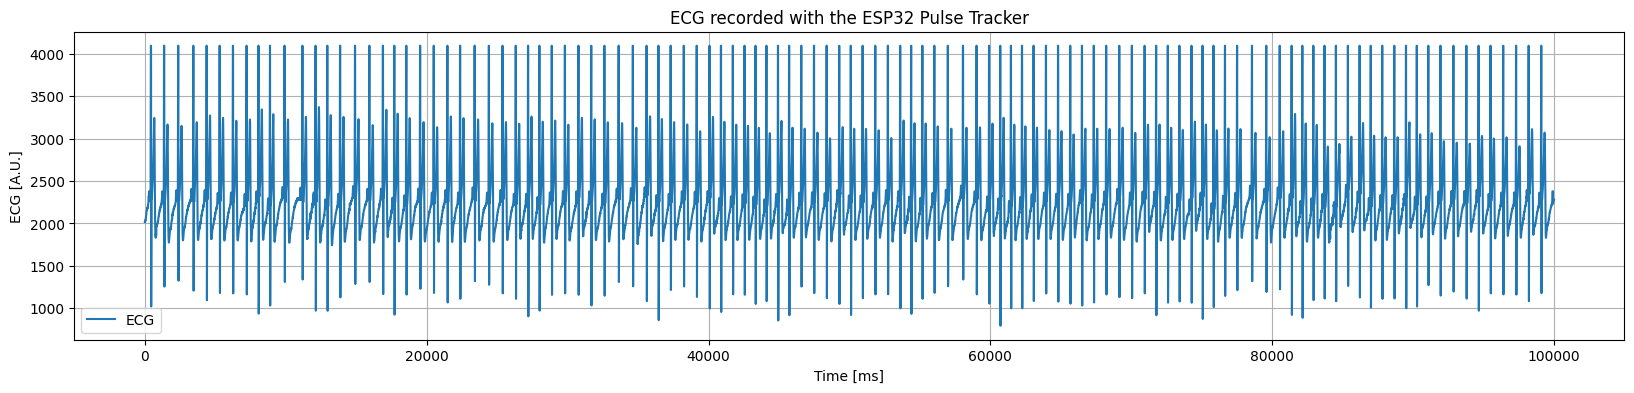

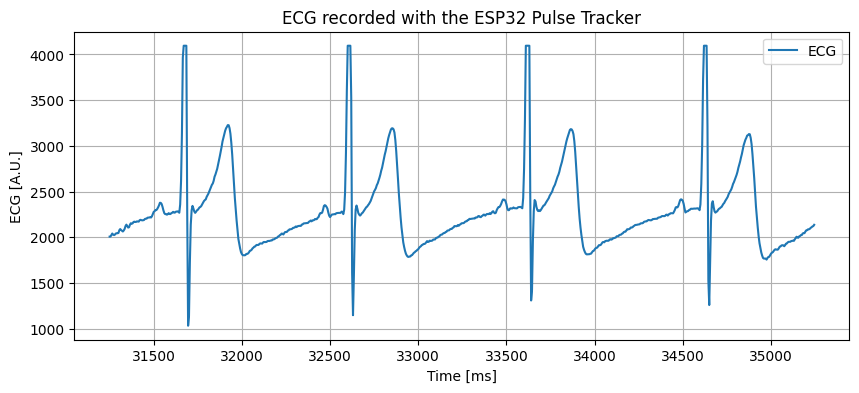

In [44]:
# Choosing the ECG data
ecg_data = ecg_data2[:]
time_data = [5 * i for i in range(len(ecg_data))]

# Figure 1 - Plotting the ECG data
fig1, ax1 = plt.subplots(figsize=(20,4))
ax1.plot(time_data, ecg_data, label = 'ECG')
ax1.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'ECG recorded with the ESP32 Pulse Tracker')
ax1.legend()
ax1.grid(which='both')

start_sample = 6250
end_sample = 7050

# Figure 2 - Plotting the ECG data - Part
fig2, ax2 = plt.subplots(figsize=(10,4))
ax2.plot(time_data[start_sample : end_sample], ecg_data[start_sample : end_sample], label = 'ECG')
ax2.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'ECG recorded with the ESP32 Pulse Tracker')
ax2.legend()
ax2.grid(which='both')

# Low Pass Filter

/tmp/ipython-input-859399529.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()
/tmp/ipython-input-859399529.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax7.legend()


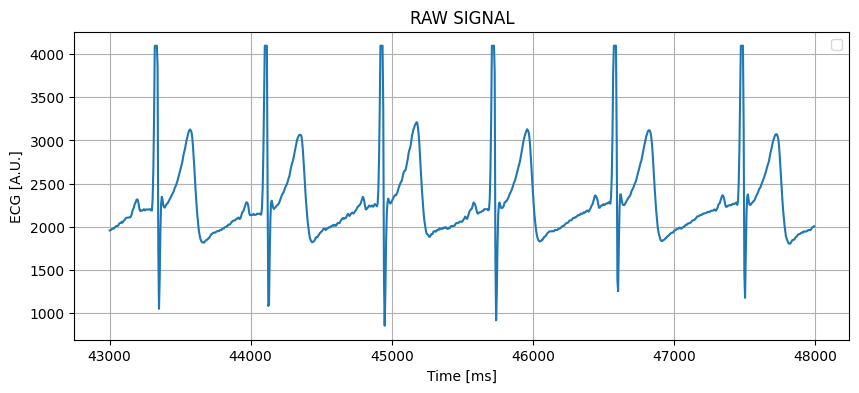

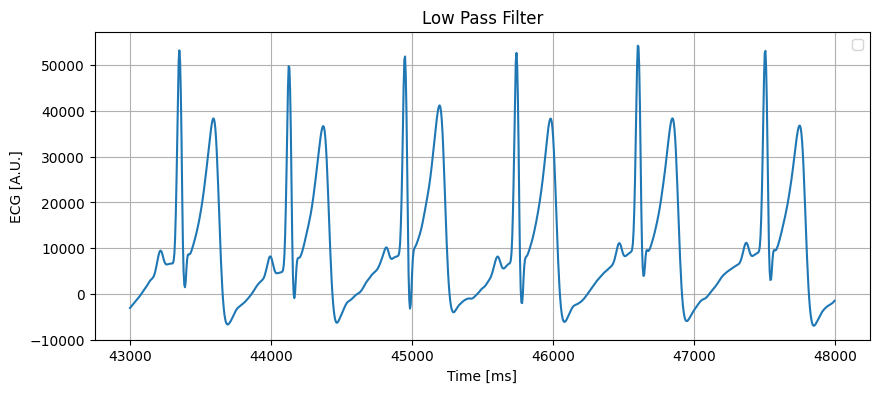

In [45]:
start_ind = 8600
end_ind = 9600
dT = 1.00 / 200.00

fig3, ax3 = plt.subplots(figsize=(10,4))
ax3.plot(time_data[start_ind:end_ind], ecg_data[start_ind:end_ind])
ax3.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'RAW SIGNAL')
ax3.legend()
ax3.grid(which='both')

# Manual implementation of the filter equation:
# y(nT) = 2y(nT - T) - y(nT - 2 T) + x(nT) - 2x(nT- 6T) + x(nT- 12T)

ecg_low_pass = []

# The equation involves terms up to n-12 for input (x) and n-2 for output (y)
# To handle the initial conditions correctly, we need to pad the input data
# A simple padding with the first data point is used here, sufficient for this filter's delay
padding_length_specific = 12 # Based on the maximum delay in the input terms (12T)
padded_ecg_data_specific = [ecg_data[0]] * padding_length_specific + ecg_data

# Initialize the first few output values (y) to handle the recurrence
# We need at least 2 initial y values since the equation uses y(n-1) and y(n-2)
# A common approach for simplicity is to assume initial output is 0 or the first input value
# Here, we'll pad the output array with initial values to match the logic
initial_y_padding = [0.0] * padding_length_specific # Pad with zeros or initial ecg_data[0] if appropriate
ecg_low_pass.extend(initial_y_padding)


for i in range(padding_length_specific, len(padded_ecg_data_specific)):
    # Get the current and past input values (x terms)
    x_n = padded_ecg_data_specific[i]
    x_n_minus_6 = padded_ecg_data_specific[i - 6]
    x_n_minus_12 = padded_ecg_data_specific[i - 12]

    # Get the past output values (y terms)
    # We need to access the filtered_arr_specific_filter for past y values
    # The index needs to be adjusted because filtered_arr_specific_filter starts with padding
    y_n_minus_1 = ecg_low_pass[i - 1]
    y_n_minus_2 = ecg_low_pass[i - 2]


    # Calculate the current output y(nT) based on the equation
    y_n = 2 * y_n_minus_1 - y_n_minus_2 + x_n - 2 * x_n_minus_6 + x_n_minus_12

    # Append the calculated output to the filtered array
    ecg_low_pass.append(y_n)


# Remove the initial padding from the filtered output for plotting
ecg_low_pass = ecg_low_pass[padding_length_specific:]


# Plot the manually filtered data
fig7, ax7 = plt.subplots(figsize=(10,4))
# Adjust the time_data indexing to match the display array length
ax7.plot(time_data[start_ind:end_ind], ecg_low_pass[start_ind:end_ind])
ax7.set(xlabel='Time [ms]', ylabel='ECG [A.U.]', title='Low Pass Filter')
ax7.legend()
ax7.grid(which='both')

# High Pass Filter

/tmp/ipython-input-1252187892.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax8.legend()


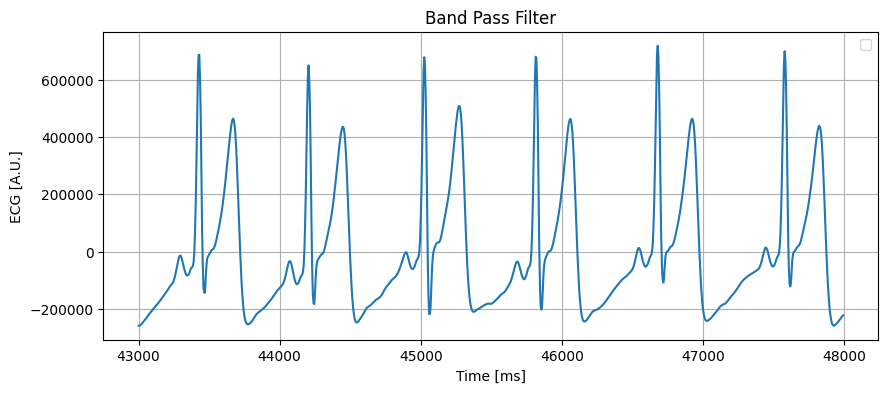

In [46]:
# Manual implementation of the high-pass filter equation:
# y(nT) = 32x(nT - 16 T) - [y(nT - T) + x(nT) - x(nT - 32 T)]

high_pass_ecg = []

# Rearrange the equation to solve for y(nT):
# y(nT) = 32x(nT - 16T) - y(nT - T) - x(nT) + x(nT - 32T)

# The equation involves terms up to n-32 for input (x) and n-1 for output (y)
# To handle the initial conditions correctly, we need to pad the input data
# A simple padding with the first data point is used here
padding_length_hp = 32 # Based on the maximum delay in the input terms (32T)
padded_ecg_low_pass = [ecg_low_pass[0]] * padding_length_hp + ecg_low_pass

# Initialize the first few output values (y) to handle the recurrence
# We need at least 1 initial y value since the equation uses y(n-1)
# Pad the output array with initial values
initial_y_padding_hp = [0.0] * padding_length_hp # Pad with zeros or initial ecg_low_pass[0]
high_pass_ecg.extend(initial_y_padding_hp)


for i in range(padding_length_hp, len(padded_ecg_low_pass)):
    # Get the current and past input values (x terms)
    x_n_hp = padded_ecg_low_pass[i]
    x_n_minus_16_hp = padded_ecg_low_pass[i - 16]
    x_n_minus_32_hp = padded_ecg_low_pass[i - 32]

    # Get the past output value (y term)
    # We need to access high_pass_arr_manual for past y values
    # The index needs to be adjusted because high_pass_arr_manual starts with padding
    y_n_minus_1_hp = high_pass_ecg[i - 1]

    # Calculate the current output y(nT) based on the equation
    y_n_hp = 32 * x_n_minus_16_hp - (y_n_minus_1_hp + x_n_hp - x_n_minus_32_hp)
    # Rearranged: y_n_hp = 32 * x_n_minus_16_hp - y_n_minus_1_hp - x_n_hp + x_n_minus_32_hp


    # Append the calculated output to the filtered array
    high_pass_ecg.append(y_n_hp)


# Remove the initial padding from the filtered output for plotting
high_pass_ecg = high_pass_ecg[padding_length_hp:]

# Removing the DC offset
avg_value = sum(high_pass_ecg) / float(len(high_pass_ecg))
for i in range(len(high_pass_ecg)): high_pass_ecg[i] -= avg_value

# Plot the manually filtered data
fig8, ax8 = plt.subplots(figsize=(10,4))
# Adjust the time_data indexing to match the display array length
# Use the same start_ind and end_ind as previous plots for consistency
ax8.plot(time_data[start_ind:end_ind], high_pass_ecg[start_ind:end_ind])
ax8.set(xlabel='Time [ms]', ylabel='ECG [A.U.]', title='Band Pass Filter')
ax8.legend()
ax8.grid(which='both')

# Derivative Filter

/tmp/ipython-input-31530354.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


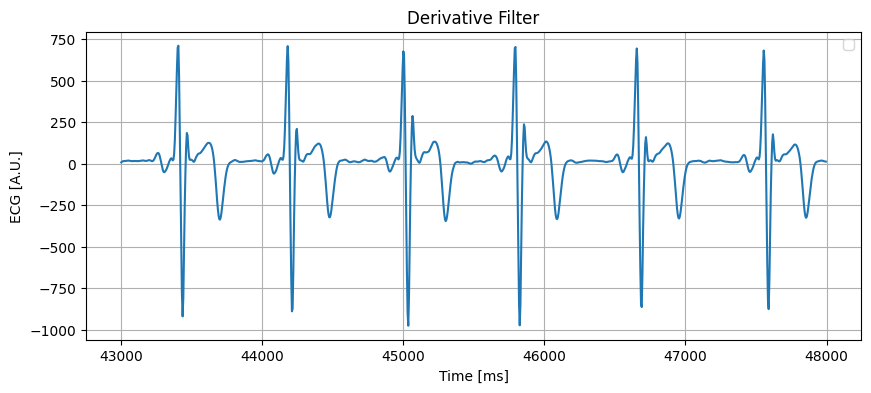

In [47]:
der_pass_arr = []

for i in range(4, len(high_pass_ecg)):
  der_pass_arr.append((dT / 8.00) * (-high_pass_ecg[i - 4] - 2 * high_pass_ecg[i - 3] + 2 * high_pass_ecg[i - 1] + high_pass_ecg[i]))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind:end_ind], der_pass_arr[start_ind:end_ind])
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'Derivative Filter')
ax.legend()
ax.grid(which='both')

# Squaring

/tmp/ipython-input-3173051786.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


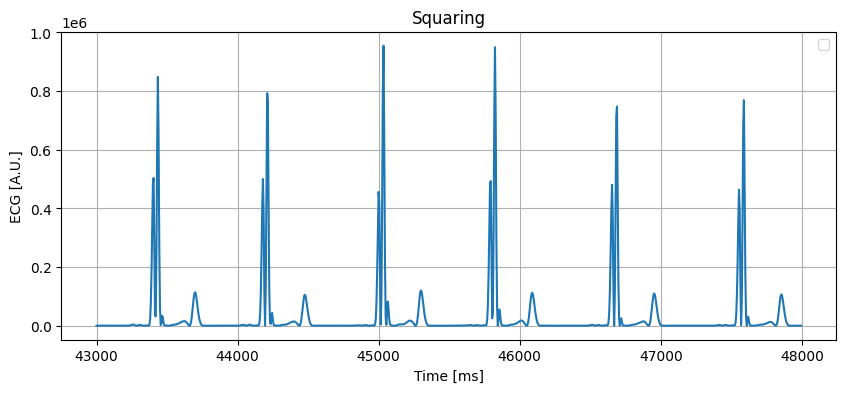

In [48]:
sq_arr = []

for i in range(len(der_pass_arr)):
  sq_arr.append(der_pass_arr[i] ** 2)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind:end_ind], sq_arr[start_ind:end_ind])
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'Squaring')
ax.legend()
ax.grid(which='both')

# Moving Window Integration

/tmp/ipython-input-2851491961.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


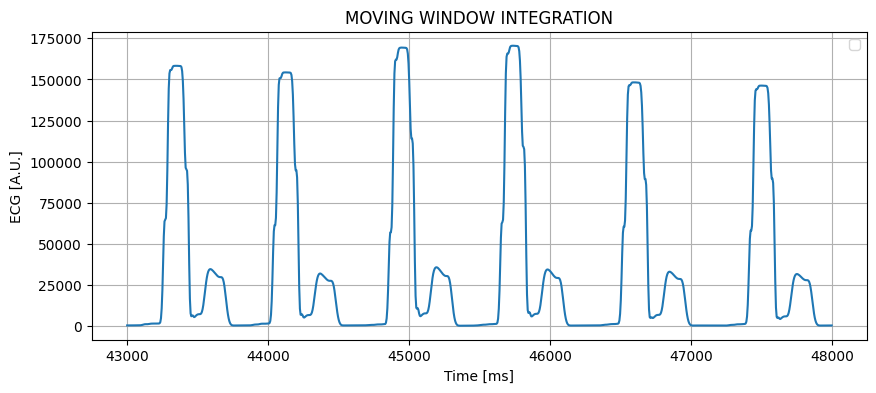

In [49]:
win_size = 30
ma_arr = []

for i in range(len(sq_arr) - win_size):
  ma_arr.append(sum(sq_arr[i : i + win_size]) / float(win_size))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind:end_ind], ma_arr[start_ind:end_ind])
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'MOVING WINDOW INTEGRATION')
ax.legend()
ax.grid(which='both')

# Peak Detection - MWI Signal

/tmp/ipython-input-3786877490.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


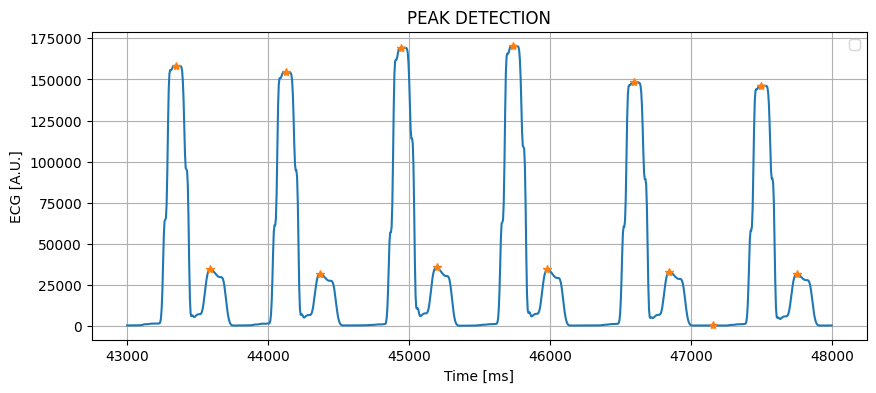

In [50]:
# Peak Detection
side_window_size = 20
peaks = []
peak_time = []

for i in range(side_window_size, len(ma_arr) - side_window_size):
  if ma_arr[i] > max(ma_arr[i - side_window_size : i]) and ma_arr[i] > max(ma_arr[i + 1 : i + side_window_size + 1]):
    peaks.append(ma_arr[i])
    peak_time.append(time_data[i])

peak_st, peak_en = -1, -1

for i in range(0, len(peak_time)):
  if peak_st == -1 and peak_time[i] >= time_data[start_ind]:
    peak_st = i
  if peak_en == -1 and peak_time[i] >= time_data[end_ind]:
    peak_en = i
    break

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind:end_ind], ma_arr[start_ind:end_ind])
ax.plot(peak_time[peak_st:peak_en], peaks[peak_st:peak_en], '*')
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'PEAK DETECTION')
ax.legend()
ax.grid(which='both')

# Peak Detection - Band Pass Filtered Signal

/tmp/ipython-input-423200282.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


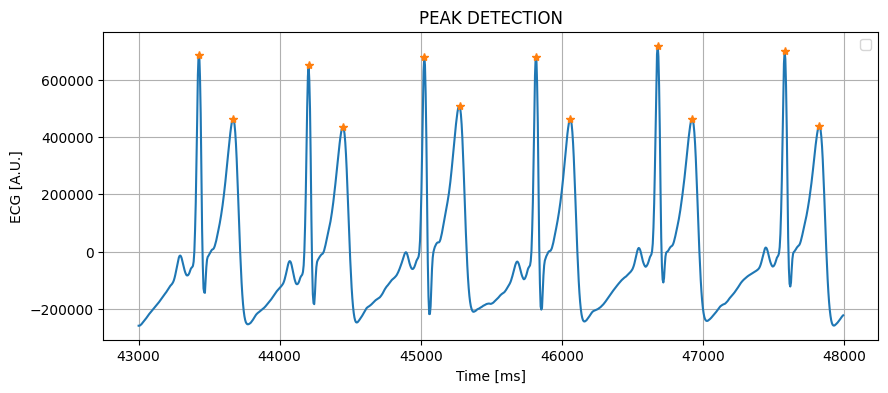

In [51]:
side_window_size = 40
bp_peaks = []
bp_peak_times = []

for i in range(side_window_size, len(high_pass_ecg) - side_window_size):
  if high_pass_ecg[i] > max(high_pass_ecg[i - side_window_size : i]) and high_pass_ecg[i] > max(high_pass_ecg[i + 1 : i + side_window_size + 1]):
    bp_peaks.append(high_pass_ecg[i])
    bp_peak_times.append(time_data[i])

bp_peak_st, bp_peak_en = -1, -1

for i in range(0, len(bp_peak_times)):
  if bp_peak_st == -1 and bp_peak_times[i] >= time_data[start_ind]:
    bp_peak_st = i
  if bp_peak_en == -1 and bp_peak_times[i] >= time_data[end_ind]:
    bp_peak_en = i
    break

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind:end_ind], high_pass_ecg[start_ind:end_ind])
ax.plot(bp_peak_times[bp_peak_st:bp_peak_en], bp_peaks[bp_peak_st:bp_peak_en], '*')
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'PEAK DETECTION')
ax.legend()
ax.grid(which='both')

# Pan Tompkins Integration

In [52]:
# Filtered ECG Signal
filt_ecg        = high_pass_ecg[:]
filt_peaks      = bp_peaks[:]
filt_peaks_time = bp_peak_times[:]

# Moving Window Integration ECG Signal
int_ecg         = ma_arr[:]
int_peaks       = peaks[:]
int_peaks_time  = peak_time[:]

# Timing Parameters
init_st = 5000
init_en = 10000
global_start = time_data[0]

# Integral ECG - Initial conditions
SPKI = 0.00
NPKI = 0.00
TH1I = 0.00
TH2I = 0.00

max_peak = -1

for i in range(len(int_peaks)):
  if int_peaks_time[i] >= global_start + init_st and int_peaks_time[i] <= global_start + init_en:
    max_peak = max(max_peak, int_peaks[i])
  if int_peaks_time[i] > global_start + init_en: break

if max_peak != -1:
  SPKI = 0.6 * max_peak
  NPKI = 0.2 * max_peak
else:
  max_sample = -1
  for i in range(len(int_ecg)):
    if time_data[i] >= global_start + init_st and time_data[i] <= global_start + init_en:
      max_sample = max(max_sample, int_ecg[i])
    if time_data[i] > global_start + init_en: break
  SPKI = 0.75 * max_sample
  NPKI = 0.25 * max_sample

TH1I = NPKI + 0.25 * (SPKI - NPKI)
TH2I = 0.5 * TH1I

print('Calculated initial conditions for the integral signal:')
print('SPKI: ' + str(SPKI))
print('NPKI: ' + str(NPKI))
print('TH1I: ' + str(TH1I))
print('TH2I: ' + str(TH2I))

# Filtered ECG - Initial conditions
SPKF = 0.00
NPKF = 0.00
TH1F = 0.00
TH2F = 0.00

max_peak = -1

for i in range(len(filt_peaks)):
  if filt_peaks_time[i] >= global_start + init_st and filt_peaks_time[i] <= global_start + init_en:
    max_peak = max(max_peak, filt_peaks[i])
  if filt_peaks_time[i] > global_start + init_en: break

if max_peak != -1:
  SPKF = 0.6 * max_peak
  NPKF = 0.2 * max_peak
else:
  max_sample = -1
  for i in range(len(filt_ecg)):
    if time_data[i] >= global_start + init_st and time_data[i] <= global_start + init_en:
      max_sample = max(max_sample, filt_ecg[i])
    if time_data[i] > global_start + init_en: break
  SPKF = 0.75 * max_sample
  NPKF = 0.25 * max_sample

TH1F = NPKF + 0.25 * (SPKF - NPKF)
TH2F = 0.5 * TH1F

print('Calculated initial conditions for the filtered signal:')
print('SPKF: ' + str(SPKF))
print('NPKF: ' + str(NPKF))
print('TH1F: ' + str(TH1F))
print('TH2F: ' + str(TH2F))

# QRS Complex Detection with searchback and RR average tracking
RR_ARR1 = []
RR_AVG1 = 0.00
RR_ARR2 = []
RR_AVG2 = 0.00
last_RR1 = -1
last_RR2 = -1

IR = []
FR = []

# RR Distance change limits
LOW_LIM     = 0.92
HIGH_LIM    = 1.16
MISSED_LIM  = 1.66
RR_MIN      = 200 # [ms]
max_delta   = 150 # [ms]
first_beat = True
i = 0

searchback_attempted = False

# Plotting variables
plot_spki = []
plot_npki = []
plot_th1i = []
plot_th2i = []
plot_spkf = []
plot_npkf = []
plot_th1f = []
plot_th2f = []
plot_time = []

# Go through all of the peaks in the integral signal
while i < len(int_peaks):
  # First we need to check whether the peak is from the time region (after initilization period)
  if int_peaks_time[i] < global_start + init_en:
    i += 1
    continue

  # Flad indicating how the peak is being classified
  r_classification = False
  f_peak_ind = -1
  i_peak_ind = -1
  first_search = True

  # Before chechking threshold, check whether this peak is maybe already outside the RR MISSED LIMIT
  if first_beat == False and int_peaks_time[i] > last_RR1 + RR_AVG2 * MISSED_LIM and RR_AVG2 != 0.00 and last_RR1 != -1 and searchback_attempted == False:
    # In this case we need to employ the searchback algorithm, which means we already have detected pulses
    # First set the searchback_attempted flag to True
    searchback_attempted = True
    # Reset the first_search flag
    first_search = False
    # Searchback algorithm should go from index + 1 to i when it comes to peaks to check whether any of them satisfy threshold2
    if len(IR) != 0:
      for j in range(IR[-1] + 1, i):
        # We still need to make sure that our peak is at leasy RR_MIN away from the last detected beat and no more than 166%AVG2 away from the last peak
        if int_peaks_time[j] < last_RR1 + RR_MIN: continue
        if int_peaks_time[j] > last_RR1 + RR_AVG2 * MISSED_LIM: break
        if int_peaks[j] >= TH2I:
          # If we are here, it means that the timing of the peak is within the expected bounds and that the peak is above threshold 2, we need to look for the peak in the filtered signal
          for k in range(0, len(filt_peaks_time)):
            # Check whether the peak is within the desired range of time and whether it satisfies TH2F
            if abs(filt_peaks_time[k] - int_peaks_time[j]) <= max_delta and filt_peaks[k] >= TH2F:
              # This is the case where we have found a new R candidate peak
              r_classification = True
              # Save the k value index
              f_peak_ind = k
              # Save the j value index
              i_peak_ind = j
              break
  else:
    # If we're here, it means the peak is detected after the initilization period
    if int_peaks[i] >= TH1I:
      # In this case the peak level is above the threshold

      # Checking whether the peak is outside the refractory period, if it's not the first detected beat
      if first_beat == True or int_peaks_time[i] >= last_RR2 + RR_MIN:
        # Change the first_beat flag
        first_beat = False

        # Final step before declaring the peak as a QRS complex, check whether there is a peak in the filtered signal within +-max_delta
        for j in range(0, len(filt_peaks_time)):
          # Check whether the peak time is within the given range and the peak value is above the TH1F threshold
          if abs(filt_peaks_time[j] - int_peaks_time[i]) <= max_delta and filt_peaks[j] >= TH1F:
            # This is the point where we can with certainty declare the peak a QRS complex
            r_classification = True
            # Save the j value index
            f_peak_ind = j
            # Save the i value index
            i_peak_ind = i
            break

  # At this point check the peak classification
  if r_classification == True:
    # This is the case where we have found a new R peak - QRS Complex
    if first_search == True:
      # This is the case where the peak was found in the first search
      # Updating the I parameters
      SPKI = 0.125 * int_peaks[i_peak_ind] + 0.875 * SPKI
      TH1I = NPKI + 0.25 * (SPKI - NPKI)
      TH2I = 0.5 * TH1I
      # Updating the F parameters
      SPKF = 0.125 * filt_peaks[f_peak_ind] + 0.875 * SPKF
      TH1F = NPKF + 0.25 * (SPKF - NPKF)
      TH2F = 0.5 * TH1F
    else:
      # This is the case where the R peak has been detected using searchback
      # Updating the I parameters
      SPKI = 0.25 * int_peaks[i_peak_ind] + 0.75 * SPKI
      TH1I = NPKI + 0.25 * (SPKI - NPKI)
      TH2I = 0.5 * TH1I
      # Updating the F parameters
      SPKF = 0.25 * filt_peaks[f_peak_ind] + 0.75 * SPKF
      TH1F = NPKF + 0.25 * (SPKF - NPKF)
      TH2F = 0.5 * TH1F

    # Updating the RR1
    if last_RR1 == -1:
      last_RR1 = int_peaks_time[i_peak_ind]
    else:
      RR_ARR1.append(int_peaks_time[i_peak_ind] - last_RR1)
      last_RR1 = int_peaks_time[i_peak_ind]
      if len(RR_ARR1) > 8: RR_ARR1.pop(0)
      RR_AVG1 = sum(RR_ARR1) / float(len(RR_ARR1))

    # Updating the RR2
    if last_RR1 != -1:
      if len(RR_ARR2) == 0 or (int_peaks_time[i_peak_ind] >= last_RR1 + RR_AVG2 * LOW_LIM and int_peaks_time[i_peak_ind] <= last_RR1 + RR_AVG2 * HIGH_LIM):
        RR_ARR2.append(int_peaks_time[i_peak_ind] - last_RR1)
        last_RR2 = last_RR1
        if len(RR_ARR2) > 8: RR_ARR2.pop(0)
        RR_AVG2 = sum(RR_ARR2) / float(len(RR_ARR2))

    # Save the index values for both ECG signals to their arrays for further printing out and analysis
    IR.append(i_peak_ind)
    FR.append(f_peak_ind)

  else:
    # This is the case where the peak has been detected as noise peak

    # Updating the I parameters
    NPKI = 0.125 * int_peaks[i] + 0.875 * NPKI
    TH1I = NPKI + 0.25 * (SPKI - NPKI)
    TH2I = 0.5 * TH1I

    # Updating the F parameters
    # Ton update the F parameters, we first need to find a peak that's the closest to our peak, within the max_delta range
    for j in range(len(filt_peaks_time)):
      if abs(filt_peaks_time[j] - int_peaks_time[i]) <= max_delta:
        # Save the index
        f_peak_ind = j
        break
    # If f_peak_ind is not -1, update the parameters
    if f_peak_ind != -1:
      NPKF = 0.125 * filt_peaks[f_peak_ind] + 0.875 * NPKF
      TH1F = NPKF + 0.25 * (SPKF - NPKF)
      TH2F = 0.5 * TH1F

  # Increment the counter if we didn't have to use the searchback algorithm, we want to return to the same peak if we did use the searchback
  if first_search == True:
    # Plotting data
    plot_spki.append(SPKI)
    plot_npki.append(NPKI)
    plot_th1i.append(TH1I)
    plot_th2i.append(TH2I)
    plot_spkf.append(SPKF)
    plot_npkf.append(NPKF)
    plot_th1f.append(TH1F)
    plot_th2f.append(TH2F)
    plot_time.append(int_peaks_time[i])
    i += 1
  else:
    # Searchback was attempted
    if r_classification == False:
      # Plotting data
      plot_spki.append(SPKI)
      plot_npki.append(NPKI)
      plot_th1i.append(TH1I)
      plot_th2i.append(TH2I)
      plot_spkf.append(SPKF)
      plot_npkf.append(NPKF)
      plot_th1f.append(TH1F)
      plot_th2f.append(TH2F)
      plot_time.append(int_peaks_time[i])
      i += 1

  # Reset the searchback attempted flag if first_search true
  if first_search == True and searchback_attempted == True: searchback_attempted = False

Calculated initial conditions for the integral signal:
SPKI: 102624.26670075
NPKI: 34208.08890025
TH1I: 51312.133350375
TH2I: 25656.0666751875
Calculated initial conditions for the filtered signal:
SPKF: 436115.41407
NPKF: 145371.80469
TH1F: 218057.707035
TH2F: 109028.8535175


# R Peak & Pan Tompkins Visualisation

/tmp/ipython-input-1478713480.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


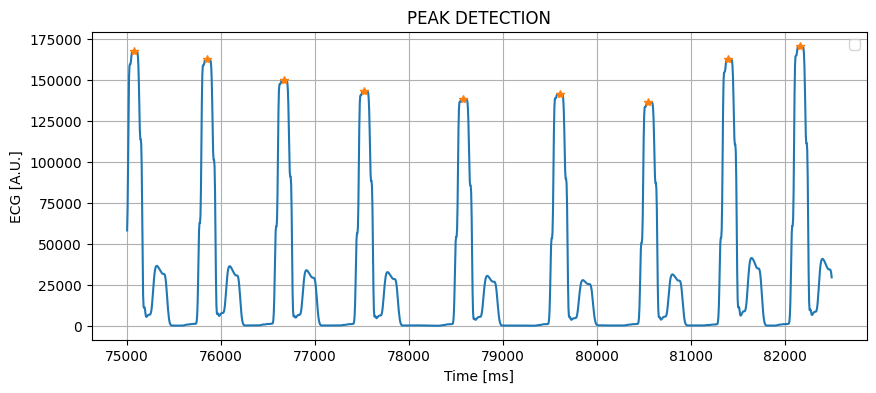

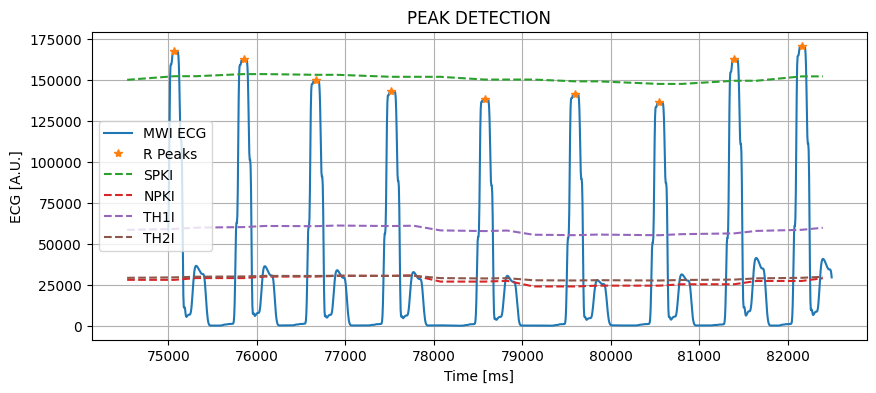

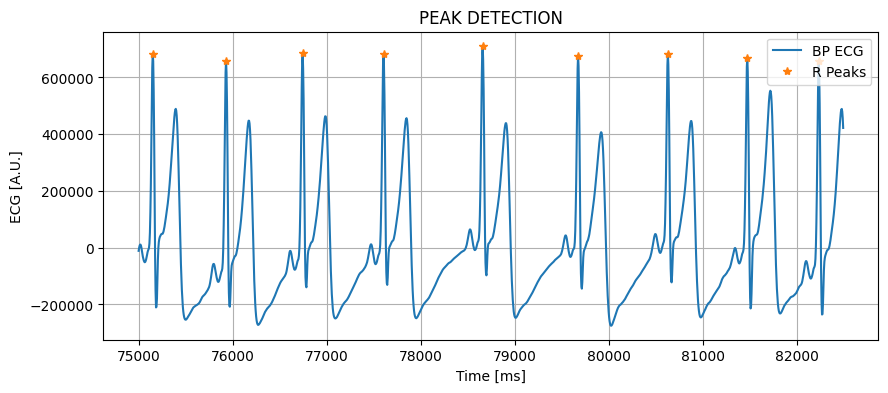

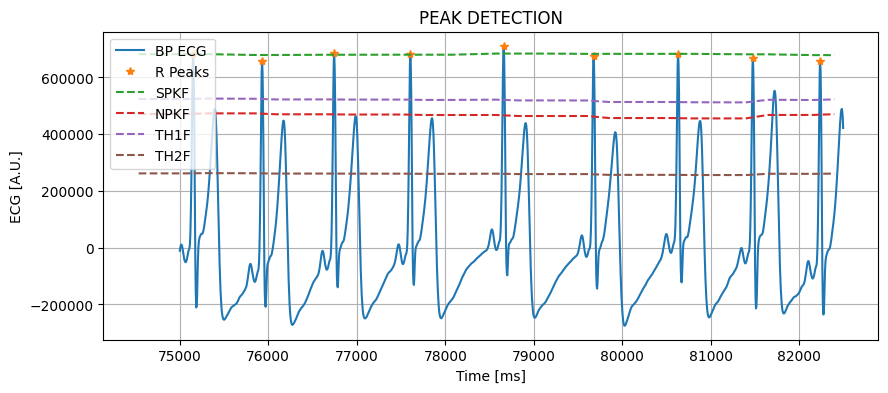

In [53]:
fig_peaks_time = []
fig_peaks = []
start_ind = 15000
end_ind = 16500

for peak_id in IR:
  if int_peaks_time[peak_id] >= time_data[start_ind] and int_peaks_time[peak_id] <= time_data[end_ind]:
    fig_peaks_time.append(int_peaks_time[peak_id])
    fig_peaks.append(int_peaks[peak_id])
  if int_peaks_time[peak_id] > time_data[end_ind]: break

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind : end_ind], int_ecg[start_ind : end_ind])
ax.plot(fig_peaks_time, fig_peaks, '*')
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'PEAK DETECTION')
ax.legend()
ax.grid(which='both')

plot_data_start = 0
plot_data_end = 0

for i in range(0, len(plot_time) - 1):
  if plot_time[i] <= time_data[start_ind] and plot_time[i + 1] > time_data[start_ind]:
    plot_data_start = i
    break

for i in range(0, len(plot_time) - 1):
  if plot_time[i] <= time_data[end_ind] and plot_time[i + 1] > time_data[end_ind]:
    plot_data_end = i + 1
    break

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind : end_ind], int_ecg[start_ind : end_ind], label = 'MWI ECG')
ax.plot(fig_peaks_time, fig_peaks, '*', label = 'R Peaks')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_spki[plot_data_start : plot_data_end], '--',label = 'SPKI')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_npki[plot_data_start : plot_data_end], '--',label = 'NPKI')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_th1i[plot_data_start : plot_data_end], '--',label = 'TH1I')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_th2i[plot_data_start : plot_data_end], '--',label = 'TH2I')
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'PEAK DETECTION')
ax.legend()
ax.grid(which='both')

fig_peaks_time = []
fig_peaks = []

for peak_id in FR:
  if filt_peaks_time[peak_id] >= time_data[start_ind] and filt_peaks_time[peak_id] <= time_data[end_ind]:
    fig_peaks_time.append(filt_peaks_time[peak_id])
    fig_peaks.append(filt_peaks[peak_id])
  if filt_peaks_time[peak_id] > time_data[end_ind]: break

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind : end_ind], filt_ecg[start_ind : end_ind], label = 'BP ECG')
ax.plot(fig_peaks_time, fig_peaks, '*', label = 'R Peaks')
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'PEAK DETECTION')
ax.legend()
ax.grid(which='both')

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time_data[start_ind : end_ind], filt_ecg[start_ind : end_ind], label = 'BP ECG')
ax.plot(fig_peaks_time, fig_peaks, '*', label = 'R Peaks')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_spkf[plot_data_start : plot_data_end], '--',label = 'SPKF')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_npkf[plot_data_start : plot_data_end], '--',label = 'NPKF')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_th1f[plot_data_start : plot_data_end], '--',label = 'TH1F')
ax.plot(plot_time[plot_data_start : plot_data_end], plot_th2f[plot_data_start : plot_data_end], '--',label = 'TH2F')
ax.set(xlabel = 'Time [ms]', ylabel = 'ECG [A.U.]', title = 'PEAK DETECTION')
ax.legend()
ax.grid(which='both')